<a href="https://colab.research.google.com/github/Pakhi27/Audio-Classification./blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [3]:
!pip install librosa

Exploratory Data Analysis

In [4]:

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
filename='/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [7]:
import IPython.display as ipd
import librosa
import librosa.display

In [8]:
!dir

drive  myenv  sample_data


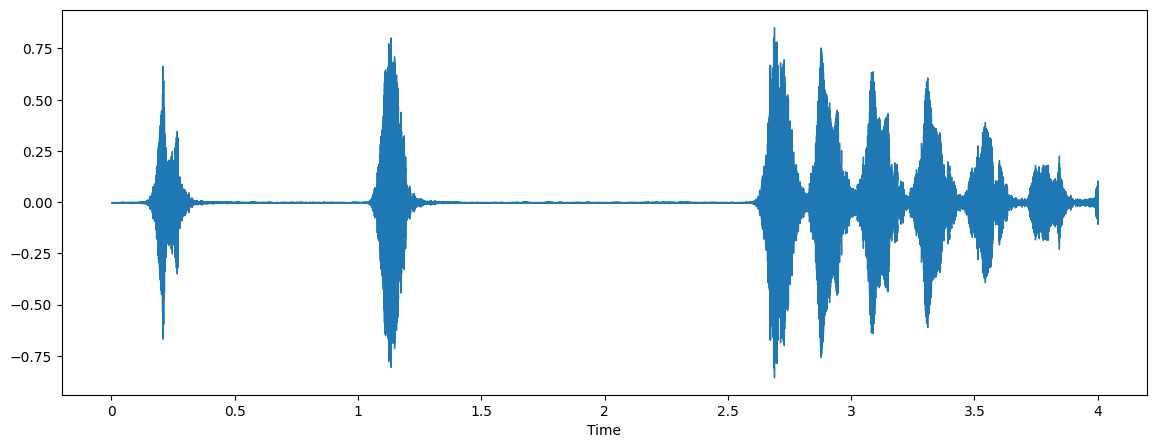

In [10]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [11]:
sample_rate

22050

Data Preprocessing

Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [12]:
# sample rate and audio data
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [13]:
wave_sample_rate

48000

In [14]:
wave_audio
# each and every signal can be represented by some floating or integer values

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [15]:

data
#  wrt librosa which isbetter than scipy-makes only one signal(mono 1),represent audio signals from -1 to +1,also gives sample rate of 22k khz

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [16]:

import pandas as pd
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

In [17]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

Text(0.5, 1.0, 'Sound Class Distribution')

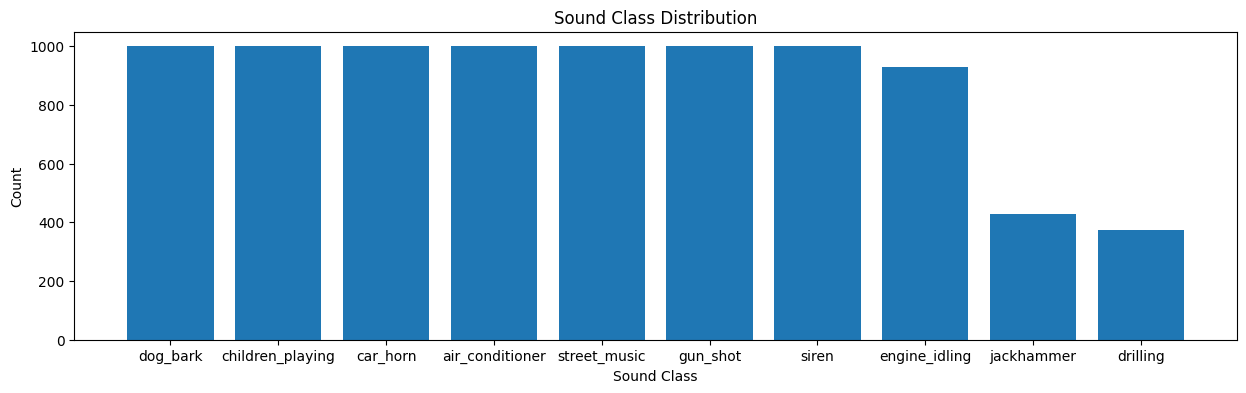

In [18]:
plt.figure(figsize=(15, 4))
plt.bar(metadata['class'].unique(),metadata['class'].value_counts())
plt.xlabel('Sound Class')
plt.ylabel('Count')
plt.title('Sound Class Distribution')

Text(0.5, 1.0, 'Sound Class Distribution')

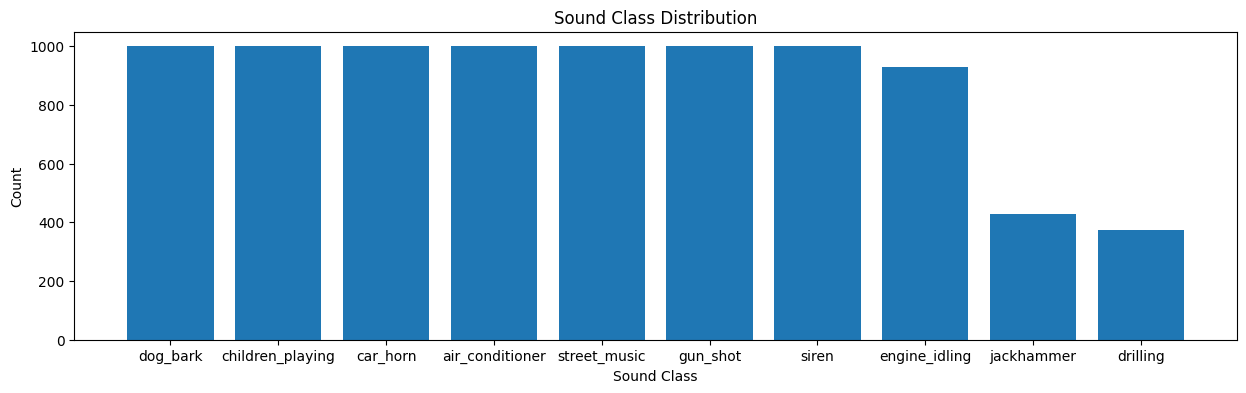

In [17]:
plt.figure(figsize=(15, 4))
plt.bar(metadata['class'].unique(),metadata['class'].value_counts())
plt.xlabel('Sound Class')
plt.ylabel('Count')
plt.title('Sound Class Distribution')

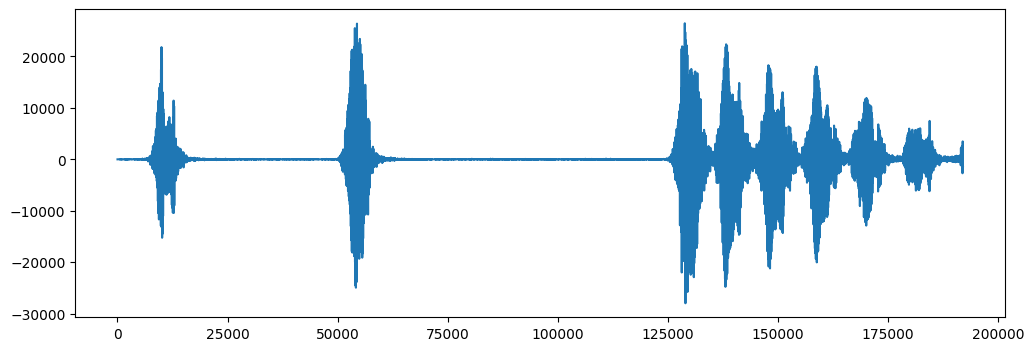

In [18]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [19]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [20]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999216e+00,  1.6759439e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355551e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179771e+01,  3.2849552e+01],
       ...,
       [ 4.3309441e-01, -3.5408905e+00, -4.8356504e+00, ...,
        -5.2699099e+00, -1.2849629e-01,  7.5349188e-01],
       [ 4.4520652e-01, -3.2774835e+00, -4.6472917e+00, ...,
        -3.4224067e+00,  3.9007015e+00,  5.5314261e-01],
       [ 3.5697106e-01, -2.9899063e+00, -4.4125957e+00, ...,
        -2.6713352e+00,  2.7894583e+00,  1.4206108e-01]], dtype=float32)

In [21]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [22]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [23]:
from tqdm import tqdm


In [24]:
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'audio','fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    print(file_name)  # Print the generated file path


220it [00:00, 2199.78it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/100032-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-117.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-121.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-126.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-137.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-143.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-161.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-36.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-0.wav
/conten

610it [00:00, 1567.96it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-2-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-2-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-2-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-3-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-17.wav
/content/drive/MyDr

992it [00:00, 1681.68it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/112075-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/112075-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/112075-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-38.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-48.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-57.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-80.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/113160-8-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-4.wav
/content/drive/MyDriv

1327it [00:00, 1614.67it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-1.wav
/content/drive/MyDrive/Ur

1712it [00:01, 1747.66it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-20.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-21.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-23.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-24.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-25.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-26.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-27.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-28.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-5.wav
/content/driv

2105it [00:01, 1822.36it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-26.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-34.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/145577-1-0-0.wav
/content/drive/MyDrive/Urba

2456it [00:01, 1615.67it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-54.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-56.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/151877-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/151877-5-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-11.wav
/content/drive/MyDri

2625it [00:01, 1636.06it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-17.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-20.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-21.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-23.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-24.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-25.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-26.wav
/content/dr

3006it [00:01, 1652.55it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-7-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-27.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-28.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-6.wav
/content/drive/MyDri

3482it [00:02, 1662.81it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-17.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-20.wav


3877it [00:02, 1655.38it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-24.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-31.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-91.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-94.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-49.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-53.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-67.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-22.wav
/cont

4217it [00:02, 1655.08it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-17.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-21.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-23.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-25.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-26.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-27.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-28.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-29.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-3.wav
/content/dr

4594it [00:02, 1828.82it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-11-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-11-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-12-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-13-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-14-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-16-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-17-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-6-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-6-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-6-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-2.wav
/content/drive/My

4973it [00:02, 1694.77it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-11-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-11-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-12-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-13-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-6-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-7-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-8-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-9-0.wav
/co

5336it [00:03, 1668.90it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold8/196068-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/196068-2-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/196069-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/196071-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/196072-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/196073-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/196074-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/196075-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/196076-2-0-0.wav
/content/drive/MyDrive/U

5730it [00:03, 1751.13it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-21.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-36.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-54.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-83.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-121.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-134.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-153.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-160.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-166.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-193.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-71.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/204765-1-0-0.wav
/content

6079it [00:03, 1674.18it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-31.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-32.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-33.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-34.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-35.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-36.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-37.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-38.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-39.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-40.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-41.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-42.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-43.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-44.wav
/content/drive/MyDrive/Urb

6438it [00:03, 1699.55it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-6-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-40.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-42.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-48.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-61.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-80.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/34241-1-0-0.wav
/content/drive/MyDrive/Urb

6835it [00:04, 1786.72it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/46391-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/46391-1-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46654-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/46655-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/46668-4-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/46668-4-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/46668-4-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audi

7288it [00:04, 1918.61it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-32.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-34.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-40.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-41.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-44.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-45.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-51.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-55.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-63.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-68.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-70.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-76.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/58202-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/58382-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58806-0-0-0.wav
/content/drive/MyDrive/Urba

7482it [00:04, 1721.21it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold7/67049-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/67049-3-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/67049-3-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/68389-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/68389-3-1-0.wav
/content/drive/MyDrive/UrbanSound8K/aud

7901it [00:04, 1774.47it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-23.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-30.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-31.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-32.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-52.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-54.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-63.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-73.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-74.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-92.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-98.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-99.wav
/content/driv

8443it [00:04, 2079.39it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-1-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-2.wav
/content/drive/MyDrive/UrbanSo

8732it [00:04, 1748.57it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/97756-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-20.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-27.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-1-0.wav
/content/drive/MyDrive/UrbanSound8K/

In [39]:
!pip install numpy scipy joblib audioread
!pip install resampy
!pip install librosa



In [44]:
import resampy
print(resampy.__version__)


0.4.3


In [ ]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.5 MB/s eta 0:00:00


In [30]:
!pip install --upgrade librosa


In [32]:
!pip install scipy numpy scikit-learn


In [ ]:
import os

file_name = "/content/drive/MyDrive/UrbanSound8K/fold6/94632-5-1-30.wav"
print(os.path.exists(file_name))  # Should return True if the file exists


False


In [ ]:
!ls /content/drive/MyDrive/UrbanSound8K/audio/fold10/


 102103-3-0-0.wav     159742-8-0-6.wav	  187110-2-0-12.wav	  51024-3-0-23.wav
 102103-3-1-0.wav     159742-8-0-7.wav	  187110-2-0-1.wav	  51024-3-0-2.wav
 102857-5-0-0.wav     159742-8-0-8.wav	  187110-2-0-27.wav	  51024-3-0-3.wav
 102857-5-0-10.wav    159742-8-0-9.wav	  187110-2-0-30.wav	  54086-1-0-0.wav
 102857-5-0-11.wav    162134-7-0-0.wav	  187110-2-0-34.wav	  54086-1-1-0.wav
 102857-5-0-12.wav    162134-7-0-1.wav	  187110-2-0-6.wav	  54086-1-2-0.wav
 102857-5-0-13.wav    162134-7-0-2.wav	  187110-2-0-8.wav	  59513-3-0-0.wav
 102857-5-0-14.wav    162134-7-10-0.wav   187863-4-0-0.wav	  59513-3-0-1.wav
 102857-5-0-15.wav    162134-7-10-1.wav   187863-4-0-1.wav	  59513-3-0-3.wav
 102857-5-0-16.wav    162134-7-10-2.wav   187863-4-0-2.wav	  59513-3-0-4.wav
 102857-5-0-17.wav    162134-7-10-3.wav   187863-4-0-3.wav	  66115-1-0-0.wav
 102857-5-0-18.wav    162134-7-1-0.wav	  187863-4-0-4.wav	  66115-1-0-1.wav
 102857-5-0-19.wav    162134-7-11-0.wav   187863-4-0-5.wav	  69661-3-0-14.wav
 

In [ ]:
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    print(file_name)  # Print the generated path


433it [00:00, 2100.65it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/100032-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-117.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-121.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-126.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-137.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-143.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-161.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-36.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-0.wav
/conten

846it [00:00, 1915.48it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-17.wav
/content/dr

1285it [00:00, 1993.50it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-6.wav
/content/d

1770it [00:00, 2159.83it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-25.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-26.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-31.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-37.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-45.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133797-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/133797-6-1-0.wav
/content/drive/M

1988it [00:00, 1929.56it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-8.wav
/content/drive/MyDri

2420it [00:01, 1897.06it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/153057-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-4.wav
/content/drive/MyDrive/UrbanS

2809it [00:01, 1794.00it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/158977-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/158978-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/158979-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/159176-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-19.wav
/content/drive/MyDrive

3168it [00:01, 1431.04it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-6-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-7-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-8-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-9-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-5-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-6-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-7-0.wav
/content/drive/MyDrive/U

3466it [00:02, 1237.43it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-13.wav
/content/drive/MyDrive/Urban

3596it [00:02, 1005.89it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-10-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-11-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-12-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-13-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-14-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-15-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-16-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-17-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-18-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-19-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-20-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-21-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-22-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-23-0.wav
/content/dr

3902it [00:02, 1215.63it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-21.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-22.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-23.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-24.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-25.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-26.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-27.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-28.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-29.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-30.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-31.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-32.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-33.wav
/content/drive/MyDrive/Urb

4138it [00:02, 1456.04it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-2-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-2-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-5.wav
/content/drive/MyDrive

4369it [00:02, 1454.50it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-30.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-31.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-32.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-33.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-12.wav
/content/drive/MyD

4522it [00:03, 981.34it/s] 

/content/drive/MyDrive/UrbanSound8K/audio/fold7/183992-3-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/184355-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-24.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-28.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-33.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/18453-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-3.wav
/content/drive/MyD

4865it [00:03, 1227.41it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/18933-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-5.wav
/content/drive/MyDrive/Ur

5236it [00:03, 994.96it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-63.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-65.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/19496-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/19496-3-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/19496-3-1-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/194962-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/194962-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/194962-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/19503-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/19503-3-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/19503-3-2-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/195063-4-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/195063-4-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-1.wav
/content/drive/MyDrive/Urba

5678it [00:03, 1343.24it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-8-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-17.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-19.wav
/content/drive/

6049it [00:04, 1497.90it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/24076-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/24076-1-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-10.wav
/content/drive/MyDrive/UrbanSound8

6291it [00:04, 1691.49it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold8/31325-3-3-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/31325-3-4-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/31840-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/31840-3-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-43.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-51.wav
/content/drive/MyDrive/UrbanSound8K/au

6798it [00:04, 2011.26it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-21.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-35.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-67.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-72.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-78.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/44735-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/44735-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/44736-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold1/44736-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/44831-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/44831-3-1-0.wav
/content/drive/MyDrive/UrbanSound8K

7340it [00:04, 1932.96it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold2/58202-1-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold5/58382-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58806-0-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-25.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-2.wav
/content/drive/MyDrive/UrbanSoun

7539it [00:04, 1811.33it/s]


/content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/69883-3-0-20.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/69883-3-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold2/69883-3-0-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-17.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-20.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-22.wav
/content/drive/MyDrive/UrbanSound8K/a

7914it [00:05, 1788.10it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-10.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-8.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-9.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold8/7

8320it [00:05, 1789.71it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-7.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-1-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-0.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-1.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-5.wav
/content/drive/MyDrive/UrbanS

8732it [00:05, 1556.54it/s]

/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-11.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-12.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-13.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-14.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-15.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-16.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-17.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-18.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-19.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-2.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-3.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-4.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-5.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-6.wav
/content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-7.wav
/content/drive/M

In [ ]:
print(len(file_name))  # Compare this length with the expected length of the path


58


In [29]:
from pathlib import Path
from tqdm import tqdm
import numpy as np



# Convert audio_dataset_path to a Path object
audio_dataset_path = Path(audio_dataset_path)

extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    try:
        # Ensure fold is converted to a string and combine paths correctly
        fold_path = Path('fold' + str(row["fold"]))
        audio_path = audio_dataset_path / fold_path / row["slice_file_name"]

        # Convert Path object to string if needed
        file_name = str(audio_path)
        final_class_labels = row["class"]

        # Print path for debugging
        print(f"Processing file: {file_name}")

        data = features_extractor(file_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")



2it [00:00, 11.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100032-3-0-0.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-117.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-121.wav


4it [00:00,  7.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-126.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-137.wav


6it [00:00,  7.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-143.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-161.wav


8it [00:01,  6.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-3.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100263-2-0-36.wav


9it [00:01,  5.10it/s]<ipython-input-22-deab5e048929>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-0-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-0-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-0-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-1-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-1-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-1-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-2-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-2-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-2-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-3-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-3-0.wa

15it [00:01, 11.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-1.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-2.wav


17it [00:02,  6.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/100652-3-0-3.wav


18it [00:02,  5.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-0-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-0-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-0-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-1.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-1.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-1.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-2.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/100795-3-1-2.wa

23it [00:03,  7.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-1.wav


24it [00:03,  6.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-10.wav


25it [00:03,  4.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-11.wav


26it [00:04,  3.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-12.wav


27it [00:04,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-13.wav


28it [00:05,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-14.wav


29it [00:05,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-15.wav


30it [00:06,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-16.wav


31it [00:07,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-17.wav


32it [00:07,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-18.wav


33it [00:07,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-19.wav


34it [00:08,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-2.wav


35it [00:08,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-20.wav


36it [00:08,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-21.wav


37it [00:09,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-22.wav


38it [00:09,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-23.wav


39it [00:10,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-24.wav


40it [00:10,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-25.wav


41it [00:10,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-26.wav


42it [00:11,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-27.wav


43it [00:11,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-28.wav


44it [00:12,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-29.wav


45it [00:12,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-3.wav


46it [00:13,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-30.wav


47it [00:13,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-4.wav


48it [00:14,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-5.wav


49it [00:14,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-6.wav


50it [00:14,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-7.wav


51it [00:15,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-8.wav


52it [00:15,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/100852-0-0-9.wav


53it [00:15,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/101281-3-0-0.wav


54it [00:16,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/101281-3-0-14.wav


55it [00:16,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/101281-3-0-5.wav


65it [00:17, 11.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-10.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-10.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-10.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-12.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-12.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-12.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-20.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-20.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-20.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/101382-2-0-21.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold10/10138

68it [00:18,  5.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-11.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-12.wav


70it [00:19,  4.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-13.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-14.wav


72it [00:19,  3.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-16.wav
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-17.wav


74it [00:20,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-18.wav


75it [00:21,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-19.wav


76it [00:21,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-21.wav


77it [00:22,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-22.wav


78it [00:22,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-23.wav


79it [00:23,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-24.wav


80it [00:23,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-26.wav


81it [00:23,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-28.wav


82it [00:24,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-29.wav


83it [00:24,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-3.wav


84it [00:25,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-32.wav


85it [00:25,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-33.wav


86it [00:26,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-36.wav


87it [00:26,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-37.wav


88it [00:27,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-38.wav


89it [00:27,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-39.wav


90it [00:27,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-4.wav


91it [00:28,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-40.wav


92it [00:28,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-6.wav


93it [00:29,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/101729-0-0-9.wav


94it [00:29,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/101848-9-0-0.wav


95it [00:29,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/101848-9-0-1.wav


96it [00:30,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/101848-9-0-2.wav


97it [00:30,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/101848-9-0-3.wav


98it [00:31,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/101848-9-0-8.wav


99it [00:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/101848-9-0-9.wav


100it [00:31,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/102102-3-0-0.wav


101it [00:32,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102103-3-0-0.wav


102it [00:32,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102103-3-1-0.wav


103it [00:32,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102104-3-0-0.wav


104it [00:33,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/102105-3-0-0.wav


105it [00:33,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/102106-3-0-0.wav


106it [00:33,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/102305-6-0-0.wav


107it [00:34,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/102547-3-0-2.wav


108it [00:34,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/102547-3-0-7.wav


109it [00:35,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/102547-3-0-8.wav


110it [00:35,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/102842-3-0-1.wav


111it [00:35,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/102842-3-1-0.wav


112it [00:36,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/102842-3-1-5.wav


113it [00:36,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/102842-3-1-6.wav


114it [00:36,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-0.wav


115it [00:37,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-1.wav


116it [00:37,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-2.wav


117it [00:38,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-3.wav


118it [00:38,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-4.wav


119it [00:38,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-5.wav


120it [00:39,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-0-6.wav


121it [00:39,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/102853-8-1-0.wav


122it [00:40,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-0.wav


123it [00:40,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-1.wav


124it [00:41,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-10.wav


125it [00:41,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-11.wav


126it [00:41,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-12.wav


127it [00:42,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-13.wav


128it [00:42,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-14.wav


129it [00:42,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-15.wav


130it [00:43,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-16.wav


131it [00:43,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-17.wav


132it [00:43,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-18.wav


133it [00:44,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-19.wav


134it [00:44,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-2.wav


135it [00:44,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-20.wav


136it [00:45,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-21.wav


137it [00:45,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-22.wav


138it [00:46,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-23.wav


139it [00:46,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-24.wav


140it [00:47,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-25.wav


141it [00:47,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-26.wav


142it [00:47,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-27.wav


143it [00:48,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-28.wav


144it [00:48,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-29.wav


145it [00:49,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-3.wav


146it [00:49,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-30.wav


147it [00:49,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-4.wav


148it [00:50,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-5.wav


149it [00:50,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-6.wav


150it [00:51,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-7.wav


151it [00:51,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-8.wav


152it [00:51,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/102857-5-0-9.wav


153it [00:52,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102858-5-0-0.wav


154it [00:52,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102858-5-0-1.wav


155it [00:53,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-0.wav


156it [00:53,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-1.wav


157it [00:53,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-10.wav


158it [00:54,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-11.wav


159it [00:54,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-12.wav


160it [00:54,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-13.wav


161it [00:55,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-14.wav


162it [00:55,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-15.wav


163it [00:55,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-2.wav


164it [00:56,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-3.wav


165it [00:56,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-4.wav


166it [00:56,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-5.wav


167it [00:57,  3.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-6.wav


168it [00:57,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-7.wav


169it [00:57,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-8.wav


170it [00:58,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/102871-8-0-9.wav


171it [00:58,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-0-0.wav


172it [00:59,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-0-1.wav


173it [00:59,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-0-2.wav


174it [00:59,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-0.wav


175it [01:00,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-1.wav


176it [01:00,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-2.wav


177it [01:01,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-3.wav


178it [01:01,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-4.wav


179it [01:01,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-5.wav


180it [01:02,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-1-6.wav


181it [01:02,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-2-0.wav


182it [01:03,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-3-0.wav


183it [01:03,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-3-1.wav


184it [01:03,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-3-2.wav


185it [01:04,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-3-3.wav


186it [01:04,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-0.wav


187it [01:05,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-1.wav


188it [01:05,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-2.wav


189it [01:06,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-3.wav


190it [01:07,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-4.wav


191it [01:07,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-5.wav


192it [01:08,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-4-6.wav


193it [01:08,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/103076-3-0-0.wav


194it [01:08,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/103076-3-1-0.wav


195it [01:09,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/103076-3-2-0.wav


196it [01:09,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-0-0.wav


197it [01:09,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-0-3.wav


198it [01:10,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-0-4.wav


199it [01:10,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-0-5.wav


200it [01:10,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-0-6.wav


201it [01:11,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-1-0.wav


202it [01:11,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-0.wav


203it [01:11,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-1.wav


204it [01:12,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-10.wav


205it [01:12,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-11.wav


206it [01:13,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-2.wav


207it [01:13,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-3.wav


208it [01:14,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-4.wav


209it [01:14,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-5.wav


210it [01:15,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-6.wav


211it [01:15,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-7.wav


212it [01:16,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-8.wav


213it [01:16,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-2-9.wav


214it [01:16,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-4-0.wav


215it [01:17,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-6-0.wav


216it [01:17,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103199-4-7-2.wav


217it [01:17,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-0.wav


218it [01:18,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-1.wav


219it [01:18,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-10.wav


220it [01:18,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-11.wav


221it [01:19,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-12.wav


222it [01:19,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-13.wav


223it [01:20,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-14.wav


224it [01:20,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-15.wav


225it [01:20,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-16.wav


226it [01:21,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-17.wav


227it [01:21,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-18.wav


228it [01:22,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-19.wav


229it [01:22,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-2.wav


230it [01:22,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-3.wav


231it [01:23,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-4.wav


232it [01:23,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-5.wav


233it [01:24,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-6.wav


234it [01:24,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-7.wav


235it [01:24,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-8.wav


236it [01:25,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/103249-5-0-9.wav


237it [01:25,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-0.wav


238it [01:25,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-1.wav


239it [01:26,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-10.wav


240it [01:26,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-11.wav


241it [01:27,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-12.wav


242it [01:27,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-13.wav


243it [01:28,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-14.wav


244it [01:28,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-15.wav


245it [01:29,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-16.wav


246it [01:29,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-17.wav


247it [01:29,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-18.wav


248it [01:30,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-19.wav


249it [01:30,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-2.wav


250it [01:31,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-3.wav


251it [01:31,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-4.wav


252it [01:32,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-5.wav


253it [01:32,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-6.wav


254it [01:32,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-7.wav


255it [01:33,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-8.wav


256it [01:33,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-9.wav


257it [01:34,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103357-4-0-0.wav


258it [01:34,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/103357-4-0-1.wav


259it [01:35,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/103438-5-0-0.wav


260it [01:35,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/103438-5-0-1.wav


261it [01:35,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/103438-5-0-2.wav


262it [01:36,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-15.wav


263it [01:36,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-19.wav


264it [01:36,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-26.wav


265it [01:37,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-28.wav


266it [01:37,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-3.wav


267it [01:37,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-30.wav


268it [01:38,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-34.wav


269it [01:38,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/104327-2-0-4.wav


270it [01:39,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-1.wav


271it [01:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-15.wav


272it [01:39,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-20.wav


273it [01:40,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-29.wav


274it [01:40,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-3.wav


275it [01:41,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-5.wav


276it [01:41,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-0-7.wav


277it [01:41,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104421-2-1-3.wav


278it [01:42,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-15.wav


279it [01:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-21.wav


280it [01:43,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-27.wav


281it [01:43,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-29.wav


282it [01:44,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-3.wav


283it [01:44,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-35.wav


284it [01:44,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-40.wav


285it [01:45,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-41.wav


286it [01:46,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-45.wav


287it [01:46,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-48.wav


288it [01:47,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-51.wav


289it [01:48,  1.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-52.wav


290it [01:48,  1.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-53.wav


291it [01:49,  1.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-55.wav


292it [01:49,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-57.wav


293it [01:50,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-0-66.wav


294it [01:50,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-1-20.wav


295it [01:51,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/104625-4-1-8.wav


296it [01:52,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-0.wav


297it [01:52,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-1.wav


298it [01:53,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-10.wav


299it [01:53,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-11.wav


300it [01:54,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-2.wav


301it [01:54,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-3.wav


302it [01:55,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-4.wav


303it [01:55,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-5.wav


304it [01:55,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-6.wav


305it [01:56,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-7.wav


306it [01:56,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-8.wav


307it [01:57,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/104817-4-0-9.wav


308it [01:57,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-0-5.wav


309it [01:58,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-10-1.wav


310it [01:58,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-10-10.wav


311it [01:59,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-10-13.wav


312it [01:59,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-10-15.wav


313it [01:59,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-10-8.wav


314it [02:00,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-10-9.wav


315it [02:00,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-11-0.wav


316it [02:01,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-11-2.wav


317it [02:01,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-12-2.wav


318it [02:02,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-14-1.wav


319it [02:02,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-14-5.wav


320it [02:02,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-14-6.wav


321it [02:03,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-15-1.wav


322it [02:03,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-15-3.wav


323it [02:03,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-15-5.wav


324it [02:04,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-15-9.wav


325it [02:04,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-16-0.wav


326it [02:05,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-16-10.wav


327it [02:05,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-16-11.wav


328it [02:06,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-16-5.wav


329it [02:06,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-16-6.wav


330it [02:07,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-16-7.wav


331it [02:07,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-0.wav


332it [02:08,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-1.wav


333it [02:08,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-12.wav


334it [02:08,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-14.wav


335it [02:09,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-4.wav


336it [02:09,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-7.wav


337it [02:10,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-17-8.wav


338it [02:10,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-18-12.wav


339it [02:10,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-18-13.wav


340it [02:11,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-18-3.wav


341it [02:11,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-18-9.wav


342it [02:12,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-0.wav


343it [02:12,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-3.wav


344it [02:13,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-6.wav


345it [02:13,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-7.wav


346it [02:14,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-8.wav


347it [02:14,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-19-9.wav


348it [02:14,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-2-4.wav


349it [02:15,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-2-5.wav


350it [02:15,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-2-6.wav


351it [02:16,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-3-1.wav


352it [02:16,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-0.wav


353it [02:16,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-1.wav


354it [02:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-4.wav


355it [02:17,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-7.wav


356it [02:18,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-7-9.wav


357it [02:18,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-13.wav


358it [02:19,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-14.wav


359it [02:19,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-15.wav


360it [02:19,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-17.wav


361it [02:20,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-4.wav


362it [02:20,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-6.wav


363it [02:20,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-8-7.wav


364it [02:21,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-9-0.wav


365it [02:21,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-9-13.wav


366it [02:22,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/104998-7-9-9.wav


367it [02:22,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-0.wav


368it [02:23,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-1.wav


369it [02:23,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-2.wav


370it [02:23,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-3.wav


371it [02:24,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-4.wav


372it [02:24,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-5.wav


373it [02:25,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-0-6.wav


374it [02:25,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-0.wav


375it [02:25,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-1.wav


376it [02:26,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-10.wav


377it [02:26,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-11.wav


378it [02:26,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-12.wav


379it [02:27,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-13.wav


380it [02:27,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-2.wav


381it [02:27,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-3.wav


382it [02:28,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-4.wav


383it [02:28,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-5.wav


384it [02:29,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-6.wav


385it [02:29,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-7.wav


386it [02:29,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-8.wav


387it [02:30,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-1-9.wav


388it [02:30,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-0.wav


389it [02:30,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-1.wav


390it [02:31,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-10.wav


391it [02:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-11.wav


392it [02:32,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-12.wav


393it [02:32,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-13.wav


394it [02:32,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-14.wav


395it [02:33,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-15.wav


396it [02:33,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-16.wav


397it [02:34,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-2.wav


398it [02:34,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-3.wav


399it [02:35,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-4.wav


400it [02:35,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-5.wav


401it [02:35,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-6.wav


402it [02:36,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-7.wav


403it [02:36,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-8.wav


404it [02:37,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-2-9.wav


405it [02:37,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-0.wav


406it [02:37,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-1.wav


407it [02:37,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-2.wav


408it [02:38,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-3.wav


409it [02:38,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-4.wav


410it [02:38,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-5.wav


411it [02:39,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-6.wav


412it [02:39,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-3-7.wav


413it [02:40,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-4-0.wav


414it [02:40,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-4-1.wav


415it [02:41,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-4-2.wav


416it [02:41,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105029-7-4-3.wav


417it [02:41,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105088-3-0-10.wav


418it [02:42,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105088-3-0-11.wav


419it [02:42,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105088-3-0-19.wav


420it [02:43,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/105088-3-0-8.wav


421it [02:43,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-0-0.wav


422it [02:43,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-0-1.wav


423it [02:44,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-0-2.wav


424it [02:44,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-0-3.wav


425it [02:45,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-0-4.wav


426it [02:45,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-0-5.wav


427it [02:45,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-1-0.wav


428it [02:46,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-1-1.wav


429it [02:46,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-1-2.wav


430it [02:47,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-1-3.wav


431it [02:47,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-1-4.wav


432it [02:48,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-0.wav


433it [02:48,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-1.wav


434it [02:49,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-2.wav


435it [02:49,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-3.wav


436it [02:49,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-4.wav


437it [02:50,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-5.wav


438it [02:50,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-6.wav


439it [02:50,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/105289-8-2-7.wav


440it [02:51,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/105319-3-0-22.wav


441it [02:51,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/105319-3-0-29.wav


442it [02:52,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/105319-3-0-39.wav


443it [02:52,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-1.wav


444it [02:52,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-15.wav


445it [02:53,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-19.wav


446it [02:53,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-21.wav


447it [02:54,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-24.wav


448it [02:54,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-4.wav


449it [02:54,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-6.wav


450it [02:55,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-8.wav


451it [02:55,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/105425-9-0-1.wav


452it [02:56,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/105425-9-0-10.wav


453it [02:56,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/105425-9-0-12.wav


454it [02:57,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/105425-9-0-13.wav


455it [02:57,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/105425-9-0-14.wav


456it [02:58,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/105425-9-0-23.wav


457it [02:58,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-0.wav


458it [02:58,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-1.wav


459it [02:59,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-2.wav


460it [02:59,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-3.wav


461it [02:59,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/106014-5-0-4.wav


462it [03:00,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-0.wav


463it [03:00,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-1.wav


464it [03:01,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-10.wav


465it [03:01,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-11.wav


466it [03:02,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-12.wav


467it [03:02,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-13.wav


468it [03:02,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-14.wav


469it [03:03,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-15.wav


470it [03:03,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-16.wav


471it [03:04,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-17.wav


472it [03:04,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-18.wav


473it [03:04,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-19.wav


474it [03:05,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-2.wav


475it [03:05,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-20.wav


476it [03:06,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-3.wav


477it [03:06,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-4.wav


478it [03:06,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-5.wav


479it [03:07,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-6.wav


480it [03:07,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-7.wav


481it [03:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-8.wav


482it [03:08,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/106015-5-0-9.wav


483it [03:08,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/106486-5-0-0.wav


484it [03:09,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/106486-5-0-1.wav


485it [03:09,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/106486-5-0-2.wav


486it [03:09,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/106487-5-0-0.wav


487it [03:10,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/106487-5-0-1.wav


488it [03:10,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/106487-5-0-2.wav


489it [03:11,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/106905-5-0-0.wav


490it [03:11,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/106905-5-0-1.wav


491it [03:11,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/106905-5-0-2.wav


492it [03:12,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/106905-8-0-0.wav


493it [03:12,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/106905-8-0-1.wav


494it [03:12,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/106905-8-0-2.wav


495it [03:13,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/106905-8-0-3.wav


496it [03:13,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/106955-6-0-0.wav


497it [03:14,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/107090-1-0-0.wav


498it [03:14,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/107090-1-1-0.wav


499it [03:14,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/107190-3-0-0.wav


500it [03:15,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-0.wav


501it [03:15,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-1.wav


502it [03:16,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-2.wav


503it [03:16,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-3.wav


504it [03:16,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-4.wav


505it [03:17,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-5.wav


506it [03:17,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-6.wav


507it [03:18,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/107228-5-0-7.wav


508it [03:18,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-0.wav


509it [03:18,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-1.wav


510it [03:19,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-2.wav


511it [03:19,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-3.wav


512it [03:20,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-4.wav


513it [03:20,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-5.wav


514it [03:20,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-6.wav


515it [03:21,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-7.wav


516it [03:21,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-0-8.wav


517it [03:21,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-0.wav


518it [03:22,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-1.wav


519it [03:22,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-10.wav


520it [03:22,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-11.wav


521it [03:23,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-12.wav


522it [03:23,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-13.wav


523it [03:23,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-14.wav


524it [03:24,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-15.wav


525it [03:24,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-16.wav


526it [03:25,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-17.wav


527it [03:25,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-18.wav


528it [03:25,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-2.wav


529it [03:26,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-3.wav


530it [03:26,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-4.wav


531it [03:27,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-5.wav


532it [03:27,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-6.wav


533it [03:28,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-7.wav


534it [03:28,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-8.wav


535it [03:29,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/107357-8-1-9.wav


536it [03:29,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/107653-9-0-12.wav


537it [03:29,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/107653-9-0-14.wav


538it [03:30,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/107653-9-0-18.wav


539it [03:30,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/107653-9-0-3.wav


540it [03:31,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/107653-9-0-5.wav


541it [03:31,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/107653-9-0-7.wav


542it [03:31,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-0-0.wav


543it [03:32,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-0-1.wav


544it [03:32,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-0-2.wav


545it [03:33,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-1-0.wav


546it [03:33,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-2-0.wav


547it [03:33,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-2-1.wav


548it [03:34,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-2-2.wav


549it [03:34,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-2-3.wav


550it [03:35,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-2-4.wav


551it [03:36,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/107842-4-3-0.wav


552it [03:36,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-11.wav


553it [03:36,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-2.wav


554it [03:37,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-4.wav


555it [03:37,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-5.wav


556it [03:37,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-6.wav


557it [03:38,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-7.wav


558it [03:38,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-9.wav


559it [03:38,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/108187-3-2-0.wav


560it [03:39,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/108187-3-3-0.wav


561it [03:39,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/108187-3-4-0.wav


562it [03:39,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/108187-3-6-0.wav


563it [03:40,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/108357-9-0-15.wav


564it [03:40,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/108357-9-0-2.wav


565it [03:41,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/108357-9-0-27.wav


566it [03:41,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/108357-9-0-30.wav


567it [03:41,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/108357-9-0-44.wav


568it [03:42,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/108357-9-0-49.wav


569it [03:42,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-11.wav


570it [03:43,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-12.wav


571it [03:43,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-21.wav


572it [03:43,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-23.wav


573it [03:44,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-29.wav


574it [03:44,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-30.wav


575it [03:45,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-7.wav


576it [03:45,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/108362-2-0-9.wav


577it [03:45,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/108638-9-0-0.wav


578it [03:46,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/108638-9-0-1.wav


579it [03:46,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/108638-9-0-2.wav


580it [03:47,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/108638-9-0-4.wav


581it [03:47,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/108638-9-0-5.wav


582it [03:47,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/108638-9-0-6.wav


583it [03:48,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/109233-3-0-3.wav


584it [03:48,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/109233-3-0-4.wav


585it [03:48,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/109233-3-0-5.wav


586it [03:49,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/109233-3-0-6.wav


587it [03:49,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/109263-9-0-34.wav


588it [03:49,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/109263-9-0-39.wav


589it [03:50,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/109263-9-0-54.wav


590it [03:50,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/109263-9-0-61.wav


591it [03:50,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/109263-9-0-78.wav


592it [03:51,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-134.wav


593it [03:51,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-14.wav


594it [03:51,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-153.wav


595it [03:52,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-29.wav


596it [03:52,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-32.wav


597it [03:53,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-48.wav


598it [03:53,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/109703-2-0-50.wav


599it [03:54,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/109711-3-1-0.wav


600it [03:54,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/109711-3-2-4.wav


601it [03:55,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/109711-3-2-6.wav


602it [03:55,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/110134-3-0-0.wav


603it [03:55,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/110371-3-0-1.wav


604it [03:56,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/110371-3-1-0.wav


605it [03:56,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/110371-3-1-1.wav


606it [03:57,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/110389-3-0-0.wav


607it [03:57,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/110621-7-0-0.wav


608it [03:58,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/110621-7-0-1.wav


609it [03:58,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/110621-7-0-2.wav


610it [03:59,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/110621-7-0-3.wav


611it [03:59,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/110622-6-0-0.wav


612it [03:59,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/110688-3-0-11.wav


613it [04:00,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/110688-3-0-17.wav


614it [04:00,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/110688-3-0-2.wav


615it [04:01,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/110688-3-0-32.wav


616it [04:01,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/110868-9-0-11.wav


617it [04:01,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/110868-9-0-13.wav


618it [04:02,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/110868-9-0-14.wav


619it [04:02,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/110868-9-0-15.wav


620it [04:03,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/110868-9-0-6.wav


621it [04:03,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/110868-9-0-8.wav


622it [04:03,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/110918-3-0-1.wav


623it [04:04,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/110918-3-0-26.wav


624it [04:04,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/110918-3-0-40.wav


625it [04:04,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/110918-3-0-9.wav


626it [04:05,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111048-6-0-0.wav


627it [04:05,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-0.wav


628it [04:05,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-1.wav


629it [04:06,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-2.wav


630it [04:06,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-3.wav


631it [04:07,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-4.wav


632it [04:07,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-5.wav


633it [04:08,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-6.wav


634it [04:08,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-0-7.wav


635it [04:09,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-0.wav


636it [04:09,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-1.wav


637it [04:09,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-10.wav


638it [04:10,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-11.wav


639it [04:10,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-12.wav


640it [04:11,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-13.wav


641it [04:11,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-14.wav


642it [04:11,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-2.wav


643it [04:12,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-3.wav


644it [04:12,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-4.wav


645it [04:12,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-5.wav


646it [04:13,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-6.wav


647it [04:13,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-7.wav


648it [04:13,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-8.wav


649it [04:14,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/111386-5-1-9.wav


650it [04:14,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-0.wav


651it [04:14,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-1.wav


652it [04:15,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-10.wav


653it [04:15,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-11.wav


654it [04:16,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-12.wav


655it [04:16,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-13.wav


656it [04:17,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-14.wav


657it [04:17,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-15.wav


658it [04:17,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-16.wav


659it [04:18,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-17.wav


660it [04:18,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-18.wav


661it [04:19,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-19.wav


662it [04:19,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-2.wav


663it [04:19,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-20.wav


664it [04:20,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-21.wav


665it [04:20,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-22.wav


666it [04:21,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-3.wav


667it [04:21,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-4.wav


668it [04:21,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-5.wav


669it [04:22,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-6.wav


670it [04:23,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-7.wav


671it [04:23,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-8.wav


672it [04:23,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/111671-8-0-9.wav


673it [04:24,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/112075-5-0-0.wav


674it [04:24,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/112075-5-0-1.wav


675it [04:25,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/112075-5-0-2.wav


676it [04:25,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-38.wav


677it [04:25,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-48.wav


678it [04:26,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-57.wav


679it [04:26,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/112195-3-0-80.wav


680it [04:27,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/113160-8-0-0.wav


681it [04:27,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-0.wav


682it [04:27,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-1.wav


683it [04:28,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-2.wav


684it [04:29,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-3.wav


685it [04:29,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-4.wav


686it [04:30,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-5.wav


687it [04:31,  1.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-6.wav


688it [04:31,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113201-5-0-7.wav


689it [04:32,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-0.wav


690it [04:32,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-1.wav


691it [04:33,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-10.wav


692it [04:33,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-11.wav


693it [04:34,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-12.wav


694it [04:34,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-13.wav


695it [04:35,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-14.wav


696it [04:35,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-15.wav


697it [04:36,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-16.wav


698it [04:36,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-17.wav


699it [04:37,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-18.wav


700it [04:37,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-19.wav


701it [04:38,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-2.wav


702it [04:38,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-20.wav


703it [04:39,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-21.wav


704it [04:40,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-22.wav


705it [04:40,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-23.wav


706it [04:41,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-24.wav


707it [04:41,  1.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-25.wav


708it [04:42,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-26.wav


709it [04:42,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-27.wav


710it [04:43,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-28.wav


711it [04:44,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-3.wav


712it [04:44,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-4.wav


713it [04:45,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-5.wav


714it [04:45,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-6.wav


715it [04:46,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-7.wav


716it [04:46,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-8.wav


717it [04:47,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113202-5-0-9.wav


718it [04:47,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-0.wav


719it [04:48,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-1.wav


720it [04:48,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-2.wav


721it [04:49,  1.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-3.wav


722it [04:50,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-4.wav


723it [04:50,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-5.wav


724it [04:51,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-6.wav


725it [04:51,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-7.wav


726it [04:52,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-0-8.wav


727it [04:52,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-1-0.wav


728it [04:53,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-1-1.wav


729it [04:53,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-1-2.wav


730it [04:54,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-2-0.wav


731it [04:55,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-3-0.wav


732it [04:55,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-3-1.wav


733it [04:56,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-4-0.wav


734it [04:56,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-5-0.wav


735it [04:57,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-6-0.wav


736it [04:57,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-7-0.wav


737it [04:58,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113203-5-8-0.wav


738it [04:58,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-0-0.wav


739it [04:59,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-0.wav


740it [04:59,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-1.wav


741it [05:00,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-2.wav


742it [05:01,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-3.wav


743it [05:01,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-4.wav


744it [05:02,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-5.wav


745it [05:02,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-6.wav


746it [05:02,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-7.wav


747it [05:03,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-8.wav


748it [05:03,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/113205-5-1-9.wav


749it [05:04,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113216-5-0-0.wav


750it [05:05,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113216-5-0-1.wav


751it [05:05,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113216-5-0-2.wav


752it [05:05,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113216-5-0-3.wav


753it [05:06,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/113216-5-0-4.wav


754it [05:07,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/113601-9-0-22.wav


755it [05:07,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/113601-9-0-3.wav


756it [05:07,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/113601-9-0-33.wav


757it [05:08,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/113601-9-0-34.wav


758it [05:08,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/113601-9-0-35.wav


759it [05:09,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/113601-9-0-42.wav


760it [05:09,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113785-3-0-0.wav


761it [05:10,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/113785-3-1-0.wav


762it [05:10,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/114280-3-0-0.wav


763it [05:10,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/114280-3-0-1.wav


764it [05:11,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/114587-3-0-2.wav


765it [05:11,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/114587-3-0-4.wav


766it [05:12,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/114587-3-0-5.wav


767it [05:12,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/114587-3-0-7.wav


768it [05:12,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/115239-9-0-0.wav


769it [05:13,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/115239-9-0-1.wav


770it [05:13,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/115239-9-0-2.wav


771it [05:14,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/115239-9-0-3.wav


772it [05:14,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/115239-9-0-4.wav


773it [05:15,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/115239-9-0-5.wav


774it [05:15,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/115240-9-0-1.wav


775it [05:15,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/115240-9-0-16.wav


776it [05:16,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/115240-9-0-28.wav


777it [05:16,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/115240-9-0-34.wav


778it [05:17,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/115240-9-0-36.wav


779it [05:17,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/115240-9-0-4.wav


780it [05:17,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-1.wav


781it [05:18,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-14.wav


782it [05:18,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-2.wav


783it [05:18,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-20.wav


784it [05:19,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-6.wav


785it [05:19,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-8.wav


786it [05:20,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115241-9-0-9.wav


787it [05:20,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115242-9-0-14.wav


788it [05:20,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115242-9-0-44.wav


789it [05:21,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115242-9-0-55.wav


790it [05:21,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115242-9-0-68.wav


791it [05:22,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115242-9-0-70.wav


792it [05:22,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115242-9-0-83.wav


793it [05:22,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/115243-9-0-0.wav


794it [05:23,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/115243-9-0-16.wav


795it [05:23,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/115243-9-0-4.wav


796it [05:23,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/115243-9-0-46.wav


797it [05:24,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/115243-9-0-81.wav


798it [05:24,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/115243-9-0-94.wav


799it [05:25,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115411-3-0-0.wav


800it [05:25,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115411-3-2-0.wav


801it [05:26,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/115411-3-3-0.wav


802it [05:26,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115415-9-0-0.wav


803it [05:26,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115415-9-0-1.wav


804it [05:27,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115415-9-0-4.wav


805it [05:27,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115415-9-0-5.wav


806it [05:28,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115415-9-0-6.wav


807it [05:28,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115415-9-0-7.wav


808it [05:28,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115418-9-0-11.wav


809it [05:29,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115418-9-0-12.wav


810it [05:29,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115418-9-0-15.wav


811it [05:30,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115418-9-0-20.wav


812it [05:30,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115418-9-0-29.wav


813it [05:31,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/115418-9-0-6.wav


814it [05:31,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/115535-3-0-0.wav


815it [05:31,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/115536-3-0-0.wav


816it [05:32,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/115537-3-0-0.wav


817it [05:32,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/116163-3-0-0.wav


818it [05:32,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/116163-3-1-0.wav


819it [05:33,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/116163-3-2-0.wav


820it [05:33,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/116400-3-0-2.wav


821it [05:33,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/116400-3-1-0.wav


822it [05:34,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/116400-3-1-1.wav


823it [05:34,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/116400-3-1-2.wav


824it [05:34,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/116423-2-0-0.wav


825it [05:35,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/116423-2-0-1.wav


826it [05:35,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/116423-2-0-2.wav


827it [05:36,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/116423-2-0-3.wav


828it [05:36,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/116423-2-0-4.wav


829it [05:37,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/116483-3-0-1.wav


830it [05:37,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/116483-3-0-2.wav


831it [05:37,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/116483-3-1-0.wav


832it [05:38,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/116483-3-1-2.wav


833it [05:38,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/116484-3-0-12.wav


834it [05:39,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/116484-3-0-16.wav


835it [05:39,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/116484-3-0-6.wav


836it [05:40,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/116484-3-0-8.wav


837it [05:40,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/116485-3-0-4.wav


838it [05:41,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/116485-3-0-6.wav


839it [05:41,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/116485-3-2-0.wav


840it [05:41,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/116485-3-2-4.wav


841it [05:42,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117048-3-0-17.wav


842it [05:42,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117048-3-0-23.wav


843it [05:42,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117048-3-0-25.wav


844it [05:43,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117048-3-0-35.wav


845it [05:43,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117072-3-0-11.wav


846it [05:44,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117072-3-0-14.wav


847it [05:44,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117072-3-0-19.wav


848it [05:44,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/117072-3-0-8.wav


849it [05:45,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-0.wav


850it [05:45,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-1.wav


851it [05:45,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-10.wav


852it [05:46,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-11.wav


853it [05:46,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-12.wav


854it [05:46,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-2.wav


855it [05:47,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-3.wav


856it [05:47,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-4.wav


857it [05:47,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-5.wav


858it [05:48,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-6.wav


859it [05:48,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-7.wav


860it [05:49,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-8.wav


861it [05:49,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/117181-8-0-9.wav


862it [05:49,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/11722-3-0-0.wav


863it [05:50,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/11722-3-1-0.wav


864it [05:50,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/117271-3-0-0.wav


865it [05:50,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/117271-3-0-1.wav


866it [05:51,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/117271-3-0-2.wav


867it [05:51,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/117271-3-0-3.wav


868it [05:51,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/117536-1-0-0.wav


869it [05:52,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/117889-9-0-12.wav


870it [05:52,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/117889-9-0-20.wav


871it [05:52,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/117889-9-0-30.wav


872it [05:53,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/117889-9-0-36.wav


873it [05:53,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/117889-9-0-39.wav


874it [05:54,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/117889-9-0-40.wav


875it [05:54,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/118070-1-0-0.wav


876it [05:54,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/118072-3-0-0.wav


877it [05:55,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-0.wav


878it [05:55,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-3.wav


879it [05:56,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-4.wav


880it [05:56,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118101-3-0-6.wav


881it [05:56,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-0.wav


882it [05:57,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-1.wav


883it [05:57,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-10.wav


884it [05:57,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-11.wav


885it [05:58,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-12.wav


886it [05:58,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-13.wav


887it [05:59,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-2.wav


888it [05:59,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-3.wav


889it [05:59,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-4.wav


890it [06:00,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-5.wav


891it [06:00,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-6.wav


892it [06:00,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-7.wav


893it [06:01,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-8.wav


894it [06:01,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118278-4-0-9.wav


895it [06:02,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-0.wav


896it [06:02,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-1.wav


897it [06:02,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-10.wav


898it [06:03,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-11.wav


899it [06:03,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-12.wav


900it [06:04,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-13.wav


901it [06:04,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-14.wav


902it [06:04,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-2.wav


903it [06:05,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-3.wav


904it [06:05,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-4.wav


905it [06:06,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-5.wav


906it [06:06,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-6.wav


907it [06:06,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-7.wav


908it [06:07,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-8.wav


909it [06:07,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118279-8-0-9.wav


910it [06:08,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-0-0.wav


911it [06:08,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-1-0.wav


912it [06:08,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-2-0.wav


913it [06:09,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-3-0.wav


914it [06:09,  3.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-4-0.wav


915it [06:09,  3.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-5-0.wav


916it [06:09,  3.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-6-0.wav


917it [06:10,  3.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-7-0.wav


918it [06:10,  3.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/118440-4-8-0.wav


919it [06:10,  3.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/118496-1-0-0.wav


920it [06:11,  3.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/118496-1-1-0.wav


921it [06:11,  3.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-0-0.wav


922it [06:11,  3.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-0-1.wav


923it [06:12,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-0-2.wav


924it [06:12,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-1-0.wav


925it [06:12,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-1-1.wav


926it [06:13,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-1-2.wav


927it [06:13,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-2-0.wav


928it [06:14,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-2-1.wav


929it [06:14,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-2-2.wav


930it [06:14,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/118558-5-2-3.wav


931it [06:15,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/118587-3-0-2.wav


932it [06:15,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/118587-3-0-21.wav


933it [06:16,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/118587-3-0-6.wav


934it [06:16,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/118723-4-0-0.wav


935it [06:16,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/118961-3-0-0.wav


936it [06:17,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/118962-3-0-0.wav


937it [06:17,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/118963-3-0-0.wav


938it [06:17,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/118964-3-0-0.wav


939it [06:18,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/119067-0-0-0.wav


940it [06:18,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/119067-0-0-1.wav


941it [06:18,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/119067-0-0-2.wav


942it [06:19,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119420-3-0-0.wav


943it [06:20,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119420-3-1-0.wav


944it [06:20,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-0.wav


945it [06:20,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-1.wav


946it [06:21,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-2.wav


947it [06:21,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-3.wav


948it [06:22,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-4.wav


949it [06:22,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-5.wav


950it [06:23,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119449-5-0-6.wav


951it [06:23,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-0.wav


952it [06:24,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-1.wav


953it [06:24,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-2.wav


954it [06:24,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-3.wav


955it [06:25,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-4.wav


956it [06:25,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-5.wav


957it [06:26,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-6.wav


958it [06:26,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/119455-5-0-7.wav


959it [06:26,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-0.wav


960it [06:27,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-1.wav


961it [06:27,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-2.wav


962it [06:28,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-3.wav


963it [06:28,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-4.wav


964it [06:28,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-5.wav


965it [06:29,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/119809-7-0-6.wav


966it [06:29,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-0.wav


967it [06:29,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-1.wav


968it [06:30,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-2.wav


969it [06:30,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-3.wav


970it [06:30,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-4.wav


971it [06:31,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-5.wav


972it [06:31,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-6.wav


973it [06:32,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-7.wav


974it [06:32,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-8.wav


975it [06:33,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/121285-0-0-9.wav


976it [06:33,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-0.wav


977it [06:34,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-1.wav


978it [06:35,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-10.wav


979it [06:35,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-11.wav


980it [06:35,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-12.wav


981it [06:36,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-13.wav


982it [06:36,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-14.wav


983it [06:37,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-15.wav


984it [06:37,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-2.wav


985it [06:37,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-3.wav


986it [06:38,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-4.wav


987it [06:38,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-5.wav


988it [06:39,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-6.wav


989it [06:39,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-7.wav


990it [06:39,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-8.wav


991it [06:40,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121286-0-0-9.wav


992it [06:40,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/121299-1-0-0.wav


993it [06:40,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/121528-8-1-0.wav


994it [06:41,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/121528-8-1-1.wav


995it [06:41,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/121888-3-0-0.wav


996it [06:41,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/122199-3-1-1.wav


997it [06:42,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/122199-3-1-2.wav


998it [06:42,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/122199-3-1-3.wav


999it [06:42,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/122199-3-1-6.wav


1000it [06:43,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/122690-6-0-0.wav


1001it [06:43,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/122738-9-0-11.wav


1002it [06:43,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/122738-9-0-12.wav


1003it [06:44,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/122738-9-0-2.wav


1004it [06:44,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/122738-9-0-3.wav


1005it [06:45,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/122738-9-0-5.wav


1006it [06:45,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/122738-9-0-9.wav


1007it [06:45,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-13.wav


1008it [06:46,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-19.wav


1009it [06:46,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-22.wav


1010it [06:47,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-5.wav


1011it [06:47,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-54.wav


1012it [06:47,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-74.wav


1013it [06:48,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-83.wav


1014it [06:48,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/123399-2-0-91.wav


1015it [06:49,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-0.wav


1016it [06:49,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-1.wav


1017it [06:49,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-2.wav


1018it [06:50,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-3.wav


1019it [06:50,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-4.wav


1020it [06:51,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-5.wav


1021it [06:51,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-6.wav


1022it [06:51,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-7.wav


1023it [06:52,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/123685-5-0-8.wav


1024it [06:52,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-0.wav


1025it [06:53,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-1.wav


1026it [06:53,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-10.wav


1027it [06:53,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-11.wav


1028it [06:54,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-12.wav


1029it [06:54,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-13.wav


1030it [06:54,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-14.wav


1031it [06:55,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-15.wav


1032it [06:55,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-16.wav


1033it [06:55,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-17.wav


1034it [06:56,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-18.wav


1035it [06:56,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-2.wav


1036it [06:57,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-3.wav


1037it [06:57,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-4.wav


1038it [06:57,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-5.wav


1039it [06:58,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-6.wav


1040it [06:58,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-7.wav


1041it [06:59,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-8.wav


1042it [06:59,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-0-9.wav


1043it [07:00,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-1-0.wav


1044it [07:00,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-1-1.wav


1045it [07:00,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-1-2.wav


1046it [07:01,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-1-3.wav


1047it [07:01,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-1-4.wav


1048it [07:02,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-1-5.wav


1049it [07:02,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-2-0.wav


1050it [07:03,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-2-1.wav


1051it [07:03,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-2-2.wav


1052it [07:04,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-2-3.wav


1053it [07:04,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/123688-8-2-4.wav


1054it [07:04,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-0.wav


1055it [07:05,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-1.wav


1056it [07:05,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-10.wav


1057it [07:06,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-11.wav


1058it [07:06,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-12.wav


1059it [07:06,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-13.wav


1060it [07:07,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-14.wav


1061it [07:07,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-15.wav


1062it [07:07,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-16.wav


1063it [07:08,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-17.wav


1064it [07:08,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-18.wav


1065it [07:09,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-2.wav


1066it [07:09,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-3.wav


1067it [07:10,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-4.wav


1068it [07:10,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-5.wav


1069it [07:10,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-6.wav


1070it [07:11,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-7.wav


1071it [07:11,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-8.wav


1072it [07:11,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/124389-8-1-9.wav


1073it [07:12,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/124489-9-0-12.wav


1074it [07:12,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/124489-9-0-14.wav


1075it [07:13,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/124489-9-0-16.wav


1076it [07:13,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/124489-9-0-17.wav


1077it [07:14,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/124489-9-0-18.wav


1078it [07:14,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/124489-9-0-6.wav


1079it [07:14,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125520-1-0-0.wav


1080it [07:15,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125520-1-1-0.wav


1081it [07:15,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125520-1-2-0.wav


1082it [07:15,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125520-1-3-0.wav


1083it [07:16,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125520-1-4-0.wav


1084it [07:16,  3.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/125523-3-0-1.wav


1085it [07:16,  3.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/125523-3-0-11.wav


1086it [07:17,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/125523-3-0-3.wav


1087it [07:17,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/125554-3-0-0.wav


1088it [07:17,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/125574-3-0-0.wav


1089it [07:18,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-0.wav


1090it [07:18,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-1.wav


1091it [07:19,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-2.wav


1092it [07:19,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-3.wav


1093it [07:19,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-4.wav


1094it [07:20,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-5.wav


1095it [07:20,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-6.wav


1096it [07:21,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-7.wav


1097it [07:21,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-8.wav


1098it [07:22,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-0-9.wav


1099it [07:22,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-0.wav


1100it [07:22,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-1.wav


1101it [07:23,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-2.wav


1102it [07:23,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-3.wav


1103it [07:23,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-4.wav


1104it [07:24,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-5.wav


1105it [07:24,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-6.wav


1106it [07:24,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-7.wav


1107it [07:25,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-1-8.wav


1108it [07:25,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-0.wav


1109it [07:26,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-1.wav


1110it [07:26,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-2.wav


1111it [07:27,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-3.wav


1112it [07:27,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-4.wav


1113it [07:28,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-5.wav


1114it [07:28,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-6.wav


1115it [07:28,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-7.wav


1116it [07:29,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-2-8.wav


1117it [07:29,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-0.wav


1118it [07:30,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-1.wav


1119it [07:30,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-2.wav


1120it [07:30,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-3.wav


1121it [07:31,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-4.wav


1122it [07:31,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-5.wav


1123it [07:31,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-6.wav


1124it [07:32,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-3-7.wav


1125it [07:32,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-0.wav


1126it [07:32,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-1.wav


1127it [07:33,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-2.wav


1128it [07:33,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-3.wav


1129it [07:33,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-4.wav


1130it [07:34,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-5.wav


1131it [07:34,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-6.wav


1132it [07:35,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-7.wav


1133it [07:35,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/125678-7-4-8.wav


1134it [07:35,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/125791-3-0-12.wav


1135it [07:36,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/125791-3-0-13.wav


1136it [07:36,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/125791-3-0-15.wav


1137it [07:36,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/125791-3-0-9.wav


1138it [07:37,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-0.wav


1139it [07:37,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-1.wav


1140it [07:37,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-11.wav


1141it [07:38,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-4.wav


1142it [07:38,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-5.wav


1143it [07:38,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-6.wav


1144it [07:39,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/126153-9-0-8.wav


1145it [07:39,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/12647-3-0-0.wav


1146it [07:40,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/12647-3-1-0.wav


1147it [07:40,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/12647-3-2-0.wav


1148it [07:40,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/12647-3-3-0.wav


1149it [07:41,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/126521-3-0-12.wav


1150it [07:41,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/126521-3-0-17.wav


1151it [07:41,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/126521-3-0-18.wav


1152it [07:42,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/126521-3-0-2.wav


1153it [07:42,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-0.wav


1154it [07:43,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-1.wav


1155it [07:43,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-10.wav


1156it [07:43,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-11.wav


1157it [07:44,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-12.wav


1158it [07:44,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-2.wav


1159it [07:44,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-3.wav


1160it [07:45,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-4.wav


1161it [07:45,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-5.wav


1162it [07:46,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-6.wav


1163it [07:46,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-7.wav


1164it [07:46,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-8.wav


1165it [07:47,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/127443-4-0-9.wav


1166it [07:47,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/127538-4-0-0.wav


1167it [07:47,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/127538-4-1-0.wav


1168it [07:48,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/127538-4-2-0.wav


1169it [07:48,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/127872-0-0-0.wav


1170it [07:49,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/127873-0-0-0.wav


1171it [07:49,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/128030-3-0-0.wav


1172it [07:49,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/128030-3-1-0.wav


1173it [07:50,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/128030-3-2-0.wav


1174it [07:50,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/12812-5-0-0.wav


1175it [07:50,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/12812-5-0-1.wav


1176it [07:51,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/12812-5-0-2.wav


1177it [07:51,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/128152-9-0-10.wav


1178it [07:51,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/128152-9-0-126.wav


1179it [07:52,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/128152-9-0-167.wav


1180it [07:52,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/128152-9-0-48.wav


1181it [07:53,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/128152-9-0-49.wav


1182it [07:53,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/128152-9-0-67.wav


1183it [07:53,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-0.wav


1184it [07:54,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-1.wav


1185it [07:55,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-10.wav


1186it [07:55,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-11.wav


1187it [07:56,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-12.wav


1188it [07:56,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-13.wav


1189it [07:57,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-14.wav


1190it [07:57,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-15.wav


1191it [07:57,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-2.wav


1192it [07:58,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-3.wav


1193it [07:59,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-4.wav


1194it [07:59,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-5.wav


1195it [08:00,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-6.wav


1196it [08:00,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-7.wav


1197it [08:01,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-8.wav


1198it [08:01,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128160-5-0-9.wav


1199it [08:01,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128240-3-0-1.wav


1200it [08:02,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128240-3-0-20.wav


1201it [08:02,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128240-3-0-39.wav


1202it [08:03,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128240-3-0-42.wav


1203it [08:04,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-0.wav


1204it [08:04,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-1.wav


1205it [08:04,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-2.wav


1206it [08:05,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-3.wav


1207it [08:05,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-4.wav


1208it [08:06,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-5.wav


1209it [08:06,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-6.wav


1210it [08:06,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-7.wav


1211it [08:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128465-1-0-8.wav


1212it [08:07,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128470-3-0-0.wav


1213it [08:07,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128470-3-0-1.wav


1214it [08:08,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128470-3-0-5.wav


1215it [08:08,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/128470-3-0-8.wav


1216it [08:09,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-0-0.wav


1217it [08:09,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-0-1.wav


1218it [08:10,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-0-2.wav


1219it [08:10,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-0-3.wav


1220it [08:11,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-0-4.wav


1221it [08:11,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-1-0.wav


1222it [08:12,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-1-1.wav


1223it [08:12,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-1-2.wav


1224it [08:13,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/128607-4-1-3.wav


1225it [08:13,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128891-3-0-2.wav


1226it [08:13,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128891-3-0-4.wav


1227it [08:14,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/128891-3-0-5.wav


1228it [08:14,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-101.wav


1229it [08:14,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-115.wav


1230it [08:15,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-118.wav


1231it [08:15,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-129.wav


1232it [08:15,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-199.wav


1233it [08:16,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-48.wav


1234it [08:16,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/129356-2-0-98.wav


1235it [08:16,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-3.wav


1236it [08:17,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-34.wav


1237it [08:17,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-36.wav


1238it [08:17,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-37.wav


1239it [08:18,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-4.wav


1240it [08:18,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-45.wav


1241it [08:18,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-46.wav


1242it [08:19,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/129750-2-0-48.wav


1243it [08:19,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/130030-3-0-0.wav


1244it [08:20,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-0-0.wav


1245it [08:20,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-1-1.wav


1246it [08:21,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-1-2.wav


1247it [08:21,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-1-3.wav


1248it [08:22,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-1-4.wav


1249it [08:22,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-2-1.wav


1250it [08:23,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-2-2.wav


1251it [08:23,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-3-0.wav


1252it [08:23,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-3-1.wav


1253it [08:24,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-3-2.wav


1254it [08:24,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-4-0.wav


1255it [08:24,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-5-0.wav


1256it [08:25,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-5-1.wav


1257it [08:25,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-5-2.wav


1258it [08:26,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-5-3.wav


1259it [08:26,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-5-4.wav


1260it [08:26,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/130961-4-5-5.wav


1261it [08:27,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/131199-3-0-0.wav


1262it [08:27,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/131428-9-0-3.wav


1263it [08:27,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/131428-9-0-5.wav


1264it [08:28,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/131428-9-1-0.wav


1265it [08:28,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/131428-9-1-19.wav


1266it [08:28,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/131428-9-1-8.wav


1267it [08:29,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/131428-9-1-9.wav


1268it [08:29,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/131571-6-0-0.wav


1269it [08:30,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-0.wav


1270it [08:30,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-1.wav


1271it [08:30,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-2.wav


1272it [08:31,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-3.wav


1273it [08:31,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-4.wav


1274it [08:32,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-5.wav


1275it [08:32,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-6.wav


1276it [08:32,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-7.wav


1277it [08:33,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/131918-7-0-8.wav


1278it [08:33,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-0.wav


1279it [08:33,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-1.wav


1280it [08:34,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-2.wav


1281it [08:34,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-3.wav


1282it [08:35,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-4.wav


1283it [08:35,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-5.wav


1284it [08:35,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-6.wav


1285it [08:36,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-7.wav


1286it [08:36,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132016-7-0-8.wav


1287it [08:36,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/132016-9-0-0.wav


1288it [08:37,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/132016-9-0-11.wav


1289it [08:37,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/132016-9-0-14.wav


1290it [08:37,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/132016-9-0-16.wav


1291it [08:38,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/132016-9-0-20.wav


1292it [08:38,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/132016-9-0-6.wav


1293it [08:38,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-0.wav


1294it [08:39,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-1.wav


1295it [08:39,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-10.wav


1296it [08:40,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-11.wav


1297it [08:40,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-12.wav


1298it [08:40,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-2.wav


1299it [08:41,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-3.wav


1300it [08:41,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-4.wav


1301it [08:42,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-5.wav


1302it [08:42,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-6.wav


1303it [08:42,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-7.wav


1304it [08:43,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-8.wav


1305it [08:43,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-0-9.wav


1306it [08:43,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132021-7-1-0.wav


1307it [08:44,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-0-0.wav


1308it [08:44,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-1-0.wav


1309it [08:44,  3.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-2-0.wav


1310it [08:45,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-3-0.wav


1311it [08:45,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-4-0.wav


1312it [08:45,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-5-0.wav


1313it [08:46,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/132073-1-6-0.wav


1314it [08:46,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132108-9-0-12.wav


1315it [08:47,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132108-9-0-21.wav


1316it [08:47,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132108-9-1-1.wav


1317it [08:47,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132108-9-1-24.wav


1318it [08:48,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132108-9-1-26.wav


1319it [08:48,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/132108-9-1-27.wav


1320it [08:49,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132162-9-1-3.wav


1321it [08:49,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132162-9-1-58.wav


1322it [08:50,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132162-9-1-63.wav


1323it [08:50,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132162-9-1-67.wav


1324it [08:50,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132162-9-1-68.wav


1325it [08:51,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/132162-9-1-73.wav


1326it [08:51,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-1.wav


1327it [08:52,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-10.wav


1328it [08:52,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-11.wav


1329it [08:53,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-12.wav


1330it [08:53,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-13.wav


1331it [08:53,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-14.wav


1332it [08:54,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-16.wav


1333it [08:54,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-17.wav


1334it [08:54,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-18.wav


1335it [08:55,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-19.wav


1336it [08:55,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-20.wav


1337it [08:55,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-22.wav


1338it [08:56,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-23.wav


1339it [08:56,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-24.wav


1340it [08:57,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-25.wav


1341it [08:57,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-26.wav


1342it [08:57,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-27.wav


1343it [08:58,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-28.wav


1344it [08:58,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-3.wav


1345it [08:59,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-5.wav


1346it [08:59,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-6.wav


1347it [08:59,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-7.wav


1348it [09:00,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-8.wav


1349it [09:00,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/13230-0-0-9.wav


1350it [09:01,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-113.wav


1351it [09:01,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-41.wav


1352it [09:02,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-58.wav


1353it [09:02,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-70.wav


1354it [09:02,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-77.wav


1355it [09:03,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-88.wav


1356it [09:03,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-90.wav


1357it [09:04,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/132855-2-0-99.wav


1358it [09:04,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-14.wav


1359it [09:05,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-20.wav


1360it [09:05,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-28.wav


1361it [09:06,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-37.wav


1362it [09:06,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-38.wav


1363it [09:07,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-64.wav


1364it [09:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-70.wav


1365it [09:07,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133090-2-0-76.wav


1366it [09:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-0.wav


1367it [09:08,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-1.wav


1368it [09:09,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-2.wav


1369it [09:09,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-3.wav


1370it [09:10,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-4.wav


1371it [09:10,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/133473-8-0-5.wav


1372it [09:10,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-18.wav


1373it [09:11,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-19.wav


1374it [09:11,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-22.wav


1375it [09:12,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-25.wav


1376it [09:12,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-26.wav


1377it [09:13,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-31.wav


1378it [09:13,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-37.wav


1379it [09:14,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133494-2-0-45.wav


1380it [09:14,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133797-6-0-0.wav


1381it [09:15,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133797-6-1-0.wav


1382it [09:15,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/133797-6-2-0.wav


1383it [09:15,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-0.wav


1384it [09:16,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-1.wav


1385it [09:16,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-12.wav


1386it [09:17,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-13.wav


1387it [09:17,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-14.wav


1388it [09:17,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-15.wav


1389it [09:18,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-16.wav


1390it [09:18,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-18.wav


1391it [09:18,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-19.wav


1392it [09:19,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-2.wav


1393it [09:19,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-20.wav


1394it [09:19,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-21.wav


1395it [09:20,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-22.wav


1396it [09:20,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-23.wav


1397it [09:21,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-24.wav


1398it [09:21,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-25.wav


1399it [09:22,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-26.wav


1400it [09:22,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-27.wav


1401it [09:22,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-28.wav


1402it [09:23,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-4.wav


1403it [09:23,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-5.wav


1404it [09:24,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-6.wav


1405it [09:24,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-7.wav


1406it [09:25,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-8.wav


1407it [09:25,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/134717-0-0-9.wav


1408it [09:26,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-0.wav


1409it [09:26,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-1.wav


1410it [09:26,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-10.wav


1411it [09:27,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-11.wav


1412it [09:27,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-2.wav


1413it [09:27,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-3.wav


1414it [09:28,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-4.wav


1415it [09:28,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-5.wav


1416it [09:28,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-6.wav


1417it [09:29,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-7.wav


1418it [09:29,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-8.wav


1419it [09:30,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135160-8-0-9.wav


1420it [09:30,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-0-0.wav


1421it [09:30,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-1-0.wav


1422it [09:31,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-10-0.wav


1423it [09:31,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-11-0.wav


1424it [09:31,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-12-0.wav


1425it [09:32,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-13-0.wav


1426it [09:32,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-2-0.wav


1427it [09:32,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-3-0.wav


1428it [09:33,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-4-0.wav


1429it [09:33,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-5-0.wav


1430it [09:34,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-6-0.wav


1431it [09:34,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-7-0.wav


1432it [09:34,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-8-0.wav


1433it [09:34,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/135526-6-9-0.wav


1434it [09:35,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-0-0.wav


1435it [09:35,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-1-0.wav


1436it [09:36,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-10-0.wav


1437it [09:36,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-11-0.wav


1438it [09:36,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-12-0.wav


1439it [09:37,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-13-0.wav


1440it [09:37,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-0.wav


1441it [09:37,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-1.wav


1442it [09:38,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-10.wav


1443it [09:38,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-2.wav


1444it [09:39,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-3.wav


1445it [09:39,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-4.wav


1446it [09:39,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-5.wav


1447it [09:40,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-6.wav


1448it [09:40,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-7.wav


1449it [09:41,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-8.wav


1450it [09:41,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-14-9.wav


1451it [09:41,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-2-0.wav


1452it [09:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-3-0.wav


1453it [09:42,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-4-0.wav


1454it [09:42,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-5-0.wav


1455it [09:43,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-6-0.wav


1456it [09:43,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-7-0.wav


1457it [09:44,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-8-0.wav


1458it [09:44,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135527-6-9-0.wav


1459it [09:45,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-0-0.wav


1460it [09:45,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-1-0.wav


1461it [09:45,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-10-0.wav


1462it [09:46,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-11-0.wav


1463it [09:46,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-12-0.wav


1464it [09:46,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-2-0.wav


1465it [09:47,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-3-0.wav


1466it [09:47,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-4-0.wav


1467it [09:47,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-4-1.wav


1468it [09:48,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-4-2.wav


1469it [09:48,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-5-0.wav


1470it [09:48,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-6-0.wav


1471it [09:49,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-7-0.wav


1472it [09:49,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-8-0.wav


1473it [09:50,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/135528-6-9-0.wav


1474it [09:50,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-0-0.wav


1475it [09:50,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-1-0.wav


1476it [09:50,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-10-0.wav


1477it [09:51,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-11-0.wav


1478it [09:51,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-12-0.wav


1479it [09:51,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-13-0.wav


1480it [09:52,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-14-0.wav


1481it [09:52,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-15-0.wav


1482it [09:53,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-16-0.wav


1483it [09:53,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-17-0.wav


1484it [09:53,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-18-0.wav


1485it [09:53,  3.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-19-0.wav


1486it [09:54,  3.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-2-0.wav


1487it [09:54,  3.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-3-0.wav


1488it [09:54,  3.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-4-0.wav


1489it [09:55,  3.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-5-0.wav


1490it [09:55,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-6-0.wav


1491it [09:55,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-7-0.wav


1492it [09:56,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-8-0.wav


1493it [09:56,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/135544-6-9-0.wav


1494it [09:56,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/13577-3-0-0.wav


1495it [09:57,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/13577-3-0-2.wav


1496it [09:57,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/13577-3-5-0.wav


1497it [09:58,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-32.wav


1498it [09:58,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-37.wav


1499it [09:59,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-40.wav


1500it [09:59,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-49.wav


1501it [09:59,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-50.wav


1502it [10:00,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-65.wav


1503it [10:00,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-85.wav


1504it [10:01,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/135776-2-0-90.wav


1505it [10:01,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-15.wav


1506it [10:01,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-16.wav


1507it [10:02,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-17.wav


1508it [10:02,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-2.wav


1509it [10:02,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-38.wav


1510it [10:03,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-48.wav


1511it [10:03,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-53.wav


1512it [10:04,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/13579-2-0-62.wav


1513it [10:04,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/135849-4-0-0.wav


1514it [10:04,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-0-0.wav


1515it [10:05,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-1-0.wav


1516it [10:05,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-2-0.wav


1517it [10:06,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-3-0.wav


1518it [10:06,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-4-0.wav


1519it [10:07,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-5-0.wav


1520it [10:07,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-6-0.wav


1521it [10:07,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-7-0.wav


1522it [10:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-8-0.wav


1523it [10:08,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/136399-6-9-0.wav


1524it [10:08,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/136558-9-0-1.wav


1525it [10:09,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/136558-9-0-2.wav


1526it [10:09,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/136558-9-1-10.wav


1527it [10:09,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/136558-9-1-21.wav


1528it [10:10,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/136558-9-1-26.wav


1529it [10:10,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/136558-9-1-39.wav


1530it [10:11,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/137156-9-0-28.wav


1531it [10:11,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/137156-9-0-30.wav


1532it [10:12,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/137156-9-0-31.wav


1533it [10:12,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/137156-9-0-5.wav


1534it [10:12,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/137156-9-0-73.wav


1535it [10:13,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/137156-9-0-79.wav


1536it [10:13,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137803-3-0-0.wav


1537it [10:14,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137803-3-0-1.wav


1538it [10:14,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137803-3-0-2.wav


1539it [10:15,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-0.wav


1540it [10:15,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-1.wav


1541it [10:15,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-10.wav


1542it [10:16,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-2.wav


1543it [10:16,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-3.wav


1544it [10:16,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-4.wav


1545it [10:17,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-5.wav


1546it [10:17,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-6.wav


1547it [10:17,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-7.wav


1548it [10:18,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-8.wav


1549it [10:18,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/137815-4-0-9.wav


1550it [10:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-18.wav


1551it [10:19,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-20.wav


1552it [10:19,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-37.wav


1553it [10:20,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-4.wav


1554it [10:20,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-41.wav


1555it [10:21,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-55.wav


1556it [10:21,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/137969-2-0-56.wav


1557it [10:21,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-0.wav


1558it [10:22,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-2.wav


1559it [10:22,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-3.wav


1560it [10:22,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-4.wav


1561it [10:23,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-5.wav


1562it [10:23,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-6.wav


1563it [10:24,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/137971-2-0-8.wav


1564it [10:24,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138015-3-0-1.wav


1565it [10:24,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138015-3-0-5.wav


1566it [10:25,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138015-3-0-7.wav


1567it [10:25,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/138017-9-0-2.wav


1568it [10:25,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/138017-9-0-9.wav


1569it [10:26,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/138017-9-1-10.wav


1570it [10:26,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/138017-9-1-16.wav


1571it [10:26,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/138017-9-1-4.wav


1572it [10:27,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/138017-9-1-6.wav


1573it [10:27,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-13.wav


1574it [10:27,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-2.wav


1575it [10:28,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-22.wav


1576it [10:28,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-23.wav


1577it [10:29,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-28.wav


1578it [10:29,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-45.wav


1579it [10:29,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-47.wav


1580it [10:29,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/138031-2-0-7.wav


1581it [10:30,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/138465-1-0-0.wav


1582it [10:30,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/138468-1-0-0.wav


1583it [10:31,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/138473-9-0-12.wav


1584it [10:31,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/138473-9-0-29.wav


1585it [10:32,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/138473-9-0-35.wav


1586it [10:32,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/138473-9-0-38.wav


1587it [10:32,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/138473-9-0-5.wav


1588it [10:33,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/138473-9-0-6.wav


1589it [10:33,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/139000-4-0-0.wav


1590it [10:33,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/139000-4-0-1.wav


1591it [10:34,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/139000-4-0-2.wav


1592it [10:34,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139665-9-0-19.wav


1593it [10:35,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139665-9-0-23.wav


1594it [10:35,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139665-9-0-25.wav


1595it [10:35,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139665-9-0-32.wav


1596it [10:36,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139665-9-0-8.wav


1597it [10:36,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139665-9-0-9.wav


1598it [10:37,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139948-3-0-0.wav


1599it [10:37,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139948-3-1-0.wav


1600it [10:37,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139948-3-2-0.wav


1601it [10:38,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/139948-3-4-0.wav


1602it [10:38,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/139951-9-0-13.wav


1603it [10:38,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/139951-9-0-17.wav


1604it [10:39,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/139951-9-0-29.wav


1605it [10:39,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/139951-9-0-33.wav


1606it [10:40,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/139951-9-0-45.wav


1607it [10:40,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/139951-9-0-9.wav


1608it [10:41,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/140824-4-0-0.wav


1609it [10:41,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/14110-4-0-0.wav


1610it [10:41,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/14110-4-0-1.wav


1611it [10:42,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/14110-4-0-2.wav


1612it [10:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-0.wav


1613it [10:42,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-1.wav


1614it [10:43,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-2.wav


1615it [10:43,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-3.wav


1616it [10:43,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-4.wav


1617it [10:44,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-5.wav


1618it [10:44,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-6.wav


1619it [10:45,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14111-4-0-7.wav


1620it [10:45,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/14113-4-0-0.wav


1621it [10:46,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/14113-4-0-1.wav


1622it [10:46,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14114-4-0-0.wav


1623it [10:47,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14114-4-0-1.wav


1624it [10:47,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14114-4-0-2.wav


1625it [10:48,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14114-4-0-3.wav


1626it [10:48,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/14115-4-0-0.wav


1627it [10:49,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/141240-5-0-0.wav


1628it [10:49,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/141240-5-1-0.wav


1629it [10:49,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-0.wav


1630it [10:50,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-1.wav


1631it [10:50,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-19.wav


1632it [10:51,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-20.wav


1633it [10:51,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-21.wav


1634it [10:51,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-24.wav


1635it [10:52,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-30.wav


1636it [10:52,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/142003-2-0-8.wav


1637it [10:53,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/142641-3-0-0.wav


1638it [10:53,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/143115-1-0-0.wav


1639it [10:53,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/143115-1-1-0.wav


1640it [10:54,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/143115-1-2-0.wav


1641it [10:54,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/143115-1-3-0.wav


1642it [10:54,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/143115-1-4-0.wav


1643it [10:54,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14358-3-0-26.wav


1644it [10:55,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14358-3-0-7.wav


1645it [10:55,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14358-3-0-85.wav


1646it [10:56,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/14358-3-0-90.wav


1647it [10:56,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143604-5-0-0.wav


1648it [10:57,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-0.wav


1649it [10:57,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-16.wav


1650it [10:57,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-20.wav


1651it [10:58,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-22.wav


1652it [10:58,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-39.wav


1653it [10:59,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-55.wav


1654it [10:59,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-59.wav


1655it [11:00,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/143651-2-0-63.wav


1656it [11:00,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14385-9-0-10.wav


1657it [11:00,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14385-9-0-11.wav


1658it [11:01,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14385-9-0-13.wav


1659it [11:01,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14385-9-0-14.wav


1660it [11:02,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14385-9-0-17.wav


1661it [11:02,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14385-9-0-21.wav


1662it [11:03,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/14386-9-0-11.wav


1663it [11:03,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/14386-9-0-16.wav


1664it [11:03,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/14386-9-0-17.wav


1665it [11:04,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/14386-9-0-2.wav


1666it [11:04,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/14386-9-0-20.wav


1667it [11:04,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/14386-9-0-6.wav


1668it [11:05,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14387-9-0-11.wav


1669it [11:05,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14387-9-0-12.wav


1670it [11:06,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14387-9-0-15.wav


1671it [11:06,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14387-9-0-16.wav


1672it [11:06,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14387-9-0-19.wav


1673it [11:07,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14387-9-0-7.wav


1674it [11:07,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/143970-5-0-0.wav


1675it [11:08,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/143970-5-0-1.wav


1676it [11:08,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/143970-5-0-2.wav


1677it [11:08,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/143970-5-0-3.wav


1678it [11:09,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-0.wav


1679it [11:09,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-1.wav


1680it [11:09,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-10.wav


1681it [11:10,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-11.wav


1682it [11:10,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-12.wav


1683it [11:11,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-13.wav


1684it [11:11,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-14.wav


1685it [11:11,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-15.wav


1686it [11:12,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-16.wav


1687it [11:12,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-17.wav


1688it [11:13,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-18.wav


1689it [11:13,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-19.wav


1690it [11:14,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-2.wav


1691it [11:14,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-20.wav


1692it [11:15,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-21.wav


1693it [11:15,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-3.wav


1694it [11:16,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-4.wav


1695it [11:16,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-5.wav


1696it [11:17,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-6.wav


1697it [11:18,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-7.wav


1698it [11:18,  1.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-8.wav


1699it [11:19,  1.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-0-9.wav


1700it [11:20,  1.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-0.wav


1701it [11:20,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-1.wav


1702it [11:21,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-10.wav


1703it [11:21,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-11.wav


1704it [11:22,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-2.wav


1705it [11:22,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-3.wav


1706it [11:22,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-4.wav


1707it [11:23,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-5.wav


1708it [11:23,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-6.wav


1709it [11:24,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-7.wav


1710it [11:24,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-8.wav


1711it [11:24,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144007-5-1-9.wav


1712it [11:25,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/144028-3-0-0.wav


1713it [11:25,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/144028-3-1-0.wav


1714it [11:26,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/144028-3-1-1.wav


1715it [11:26,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-0.wav


1716it [11:26,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-1.wav


1717it [11:27,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-10.wav


1718it [11:27,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-11.wav


1719it [11:27,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-12.wav


1720it [11:28,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-13.wav


1721it [11:28,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-14.wav


1722it [11:29,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-15.wav


1723it [11:29,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-16.wav


1724it [11:30,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-17.wav


1725it [11:30,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-18.wav


1726it [11:31,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-2.wav


1727it [11:31,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-3.wav


1728it [11:32,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-4.wav


1729it [11:32,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-5.wav


1730it [11:32,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-6.wav


1731it [11:33,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-7.wav


1732it [11:33,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-8.wav


1733it [11:34,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-0-9.wav


1734it [11:35,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-1-0.wav


1735it [11:35,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-2-0.wav


1736it [11:36,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-3-0.wav


1737it [11:36,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-0.wav


1738it [11:37,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-1.wav


1739it [11:37,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-2.wav


1740it [11:38,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-3.wav


1741it [11:38,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-4.wav


1742it [11:38,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-5.wav


1743it [11:39,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-6.wav


1744it [11:39,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-7.wav


1745it [11:40,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-4-8.wav


1746it [11:40,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-5-0.wav


1747it [11:41,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-5-1.wav


1748it [11:41,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144068-5-5-2.wav


1749it [11:42,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-0-0.wav


1750it [11:42,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-0-1.wav


1751it [11:42,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-0-2.wav


1752it [11:43,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-1-1.wav


1753it [11:43,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-2-0.wav


1754it [11:44,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-2-2.wav


1755it [11:44,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-2-4.wav


1756it [11:45,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-2-5.wav


1757it [11:45,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-2-6.wav


1758it [11:46,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-1.wav


1759it [11:46,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-10.wav


1760it [11:47,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-11.wav


1761it [11:47,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-12.wav


1762it [11:48,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-14.wav


1763it [11:48,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-15.wav


1764it [11:48,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-2.wav


1765it [11:49,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-3.wav


1766it [11:49,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-4.wav


1767it [11:50,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-5.wav


1768it [11:50,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/144351-4-3-7.wav


1769it [11:50,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14468-3-0-2.wav


1770it [11:51,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14468-3-0-3.wav


1771it [11:51,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14468-3-1-0.wav


1772it [11:52,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14468-3-5-0.wav


1773it [11:52,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-10.wav


1774it [11:53,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-14.wav


1775it [11:53,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-21.wav


1776it [11:53,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-4.wav


1777it [11:54,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-56.wav


1778it [11:54,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-65.wav


1779it [11:54,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-70.wav


1780it [11:55,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/14470-2-0-72.wav


1781it [11:55,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/144885-3-0-0.wav


1782it [11:55,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145206-6-0-0.wav


1783it [11:56,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145206-6-1-0.wav


1784it [11:56,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145206-6-2-0.wav


1785it [11:56,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145206-6-3-0.wav


1786it [11:57,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145206-6-4-0.wav


1787it [11:57,  3.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145206-6-5-0.wav


1788it [11:57,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14524-1-0-0.wav


1789it [11:58,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-0.wav


1790it [11:58,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-2.wav


1791it [11:59,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-3.wav


1792it [11:59,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-4.wav


1793it [11:59,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-5.wav


1794it [12:00,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-6.wav


1795it [12:00,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/14527-9-0-7.wav


1796it [12:01,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-13.wav


1797it [12:01,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-15.wav


1798it [12:01,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-22.wav


1799it [12:02,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-26.wav


1800it [12:02,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-3.wav


1801it [12:03,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-34.wav


1802it [12:03,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145390-9-0-7.wav


1803it [12:03,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/145577-1-0-0.wav


1804it [12:04,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/145608-6-0-0.wav


1805it [12:04,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/145608-6-1-0.wav


1806it [12:05,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/145608-6-2-0.wav


1807it [12:05,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/145608-6-3-0.wav


1808it [12:05,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145609-6-0-0.wav


1809it [12:06,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145609-6-1-0.wav


1810it [12:06,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145611-6-0-0.wav


1811it [12:07,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145611-6-1-0.wav


1812it [12:07,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145611-6-2-0.wav


1813it [12:08,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145611-6-3-0.wav


1814it [12:08,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/145611-6-4-0.wav


1815it [12:08,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145612-6-0-0.wav


1816it [12:09,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145612-6-1-0.wav


1817it [12:09,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145612-6-2-0.wav


1818it [12:09,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/145612-6-3-0.wav


1819it [12:09,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-0-0.wav


1820it [12:10,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-1-0.wav


1821it [12:10,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-2-0.wav


1822it [12:11,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-3-0.wav


1823it [12:11,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-4-0.wav


1824it [12:11,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/145683-6-5-0.wav


1825it [12:12,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-0.wav


1826it [12:12,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-1.wav


1827it [12:13,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-10.wav


1828it [12:13,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-11.wav


1829it [12:14,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-12.wav


1830it [12:14,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-13.wav


1831it [12:15,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-2.wav


1832it [12:15,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-3.wav


1833it [12:15,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-4.wav


1834it [12:16,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-5.wav


1835it [12:16,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-6.wav


1836it [12:17,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-7.wav


1837it [12:17,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-8.wav


1838it [12:17,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/146186-5-0-9.wav


1839it [12:18,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/146244-4-0-0.wav


1840it [12:18,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/146249-4-0-0.wav


1841it [12:18,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/146343-3-0-0.wav


1842it [12:19,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-100.wav


1843it [12:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-112.wav


1844it [12:20,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-115.wav


1845it [12:20,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-116.wav


1846it [12:20,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-117.wav


1847it [12:21,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-125.wav


1848it [12:21,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-137.wav


1849it [12:22,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-140.wav


1850it [12:22,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-151.wav


1851it [12:23,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-154.wav


1852it [12:23,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-155.wav


1853it [12:24,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-165.wav


1854it [12:24,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-17.wav


1855it [12:25,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-18.wav


1856it [12:25,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-25.wav


1857it [12:25,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-35.wav


1858it [12:26,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-38.wav


1859it [12:26,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-43.wav


1860it [12:27,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-47.wav


1861it [12:27,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-64.wav


1862it [12:28,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-8.wav


1863it [12:28,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-80.wav


1864it [12:29,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-86.wav


1865it [12:29,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-87.wav


1866it [12:29,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/146690-0-0-93.wav


1867it [12:30,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-1.wav


1868it [12:30,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-11.wav


1869it [12:31,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-12.wav


1870it [12:31,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-17.wav


1871it [12:31,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-18.wav


1872it [12:32,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-19.wav


1873it [12:32,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-20.wav


1874it [12:33,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-22.wav


1875it [12:33,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-25.wav


1876it [12:34,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-26.wav


1877it [12:34,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-3.wav


1878it [12:35,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-30.wav


1879it [12:35,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-33.wav


1880it [12:36,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-34.wav


1881it [12:36,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-37.wav


1882it [12:37,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-44.wav


1883it [12:37,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-48.wav


1884it [12:38,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-53.wav


1885it [12:38,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-59.wav


1886it [12:39,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-63.wav


1887it [12:39,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-65.wav


1888it [12:39,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-66.wav


1889it [12:40,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-68.wav


1890it [12:41,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/146709-0-0-7.wav


1891it [12:41,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-0.wav


1892it [12:42,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-12.wav


1893it [12:42,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-13.wav


1894it [12:43,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-17.wav


1895it [12:43,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-18.wav


1896it [12:43,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-2.wav


1897it [12:44,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-21.wav


1898it [12:44,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-22.wav


1899it [12:44,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-27.wav


1900it [12:45,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-33.wav


1901it [12:45,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-35.wav


1902it [12:46,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-36.wav


1903it [12:46,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-38.wav


1904it [12:46,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-41.wav


1905it [12:47,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-43.wav


1906it [12:48,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-45.wav


1907it [12:48,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-47.wav


1908it [12:49,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-49.wav


1909it [12:49,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-50.wav


1910it [12:49,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-53.wav


1911it [12:50,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-55.wav


1912it [12:50,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-56.wav


1913it [12:50,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-58.wav


1914it [12:51,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/146714-0-0-6.wav


1915it [12:51,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-0.wav


1916it [12:52,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-1.wav


1917it [12:52,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-10.wav


1918it [12:52,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-11.wav


1919it [12:53,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-12.wav


1920it [12:53,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-13.wav


1921it [12:54,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-14.wav


1922it [12:54,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-15.wav


1923it [12:55,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-16.wav


1924it [12:55,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-17.wav


1925it [12:55,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-18.wav


1926it [12:56,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-19.wav


1927it [12:56,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-2.wav


1928it [12:57,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-20.wav


1929it [12:57,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-21.wav


1930it [12:57,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-22.wav


1931it [12:58,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-24.wav


1932it [12:58,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-25.wav


1933it [12:58,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-26.wav


1934it [12:59,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-27.wav


1935it [12:59,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-3.wav


1936it [13:00,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-30.wav


1937it [13:00,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-31.wav


1938it [13:01,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-32.wav


1939it [13:01,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-33.wav


1940it [13:02,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-35.wav


1941it [13:02,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-36.wav


1942it [13:02,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-5.wav


1943it [13:03,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-6.wav


1944it [13:03,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-7.wav


1945it [13:04,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-8.wav


1946it [13:04,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/146845-0-0-9.wav


1947it [13:04,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/147019-4-0-0.wav


1948it [13:05,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/147317-6-0-0.wav


1949it [13:05,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/147491-9-0-0.wav


1950it [13:06,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/147491-9-0-5.wav


1951it [13:06,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/147491-9-2-10.wav


1952it [13:07,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/147491-9-2-25.wav


1953it [13:07,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/147491-9-2-32.wav


1954it [13:08,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/147491-9-2-6.wav


1955it [13:08,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147672-3-0-0.wav


1956it [13:09,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147672-3-1-0.wav


1957it [13:09,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147672-3-2-0.wav


1958it [13:09,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-0-0.wav


1959it [13:10,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-1-0.wav


1960it [13:10,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-2-0.wav


1961it [13:10,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-3-0.wav


1962it [13:11,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-4-0.wav


1963it [13:11,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-5-0.wav


1964it [13:11,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-6-0.wav


1965it [13:12,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-7-0.wav


1966it [13:12,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-8-0.wav


1967it [13:13,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/14772-7-9-0.wav


1968it [13:13,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-0-0.wav


1969it [13:13,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-1-0.wav


1970it [13:14,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-2-0.wav


1971it [13:14,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-3-0.wav


1972it [13:14,  3.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-4-0.wav


1973it [13:15,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-4-1.wav


1974it [13:15,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-4-2.wav


1975it [13:15,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-5-0.wav


1976it [13:16,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-6-0.wav


1977it [13:16,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-7-0.wav


1978it [13:17,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/147764-4-8-0.wav


1979it [13:17,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14780-9-0-0.wav


1980it [13:17,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14780-9-0-1.wav


1981it [13:18,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/14780-9-0-2.wav


1982it [13:18,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-10.wav


1983it [13:19,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-11.wav


1984it [13:19,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-12.wav


1985it [13:20,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-16.wav


1986it [13:20,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-17.wav


1987it [13:21,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-2.wav


1988it [13:21,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-20.wav


1989it [13:22,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-21.wav


1990it [13:22,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-27.wav


1991it [13:23,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-28.wav


1992it [13:23,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-34.wav


1993it [13:23,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-35.wav


1994it [13:24,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-36.wav


1995it [13:24,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-37.wav


1996it [13:25,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-39.wav


1997it [13:25,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-4.wav


1998it [13:26,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-41.wav


1999it [13:26,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-42.wav


2000it [13:27,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-44.wav


2001it [13:27,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-5.wav


2002it [13:28,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-50.wav


2003it [13:28,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-52.wav


2004it [13:28,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-54.wav


2005it [13:29,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/147926-0-0-7.wav


2006it [13:29,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/148166-6-0-0.wav


2007it [13:30,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-2-0.wav


2008it [13:30,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-2-1.wav


2009it [13:31,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-2-2.wav


2010it [13:31,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-0.wav


2011it [13:31,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-1.wav


2012it [13:32,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-10.wav


2013it [13:33,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-2.wav


2014it [13:33,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-3.wav


2015it [13:33,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-4.wav


2016it [13:34,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-5.wav


2017it [13:34,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-6.wav


2018it [13:35,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-7.wav


2019it [13:35,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-8.wav


2020it [13:36,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148463-7-3-9.wav


2021it [13:36,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-0.wav


2022it [13:36,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-1.wav


2023it [13:37,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-10.wav


2024it [13:37,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-11.wav


2025it [13:38,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-12.wav


2026it [13:38,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-13.wav


2027it [13:39,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-14.wav


2028it [13:39,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-15.wav


2029it [13:39,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-16.wav


2030it [13:40,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-17.wav


2031it [13:40,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-18.wav


2032it [13:41,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-2.wav


2033it [13:41,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-3.wav


2034it [13:41,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-4.wav


2035it [13:42,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-5.wav


2036it [13:42,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-6.wav


2037it [13:42,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-7.wav


2038it [13:43,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-8.wav


2039it [13:43,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/148632-8-0-9.wav


2040it [13:44,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148827-6-0-0.wav


2041it [13:44,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148827-6-1-0.wav


2042it [13:44,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148827-6-2-0.wav


2043it [13:45,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148827-6-3-0.wav


2044it [13:45,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148827-6-4-0.wav


2045it [13:45,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148828-6-0-0.wav


2046it [13:45,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/148828-6-1-0.wav


2047it [13:46,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148833-6-0-0.wav


2048it [13:46,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148833-6-1-0.wav


2049it [13:47,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148834-6-0-0.wav


2050it [13:47,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148835-6-0-0.wav


2051it [13:47,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148835-6-1-0.wav


2052it [13:48,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148835-6-2-0.wav


2053it [13:48,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148835-6-3-0.wav


2054it [13:49,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/148835-6-4-0.wav


2055it [13:49,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148837-6-0-0.wav


2056it [13:49,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148837-6-1-0.wav


2057it [13:49,  3.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/148837-6-2-0.wav


2058it [13:50,  3.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/148838-6-0-0.wav


2059it [13:50,  3.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/148838-6-1-0.wav


2060it [13:50,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/148838-6-2-0.wav


2061it [13:51,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/148841-6-0-0.wav


2062it [13:51,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/148841-6-1-0.wav


2063it [13:51,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/148841-6-2-0.wav


2064it [13:52,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149177-6-0-0.wav


2065it [13:52,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/149193-5-0-0.wav


2066it [13:53,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/149193-5-0-1.wav


2067it [13:53,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/149193-5-0-2.wav


2068it [13:54,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/149193-5-0-3.wav


2069it [13:54,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/149193-5-0-4.wav


2070it [13:55,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/149193-5-0-5.wav


2071it [13:56,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149254-9-0-25.wav


2072it [13:56,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149254-9-0-29.wav


2073it [13:56,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149254-9-0-30.wav


2074it [13:57,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149254-9-0-42.wav


2075it [13:57,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149254-9-0-51.wav


2076it [13:58,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149254-9-0-56.wav


2077it [13:58,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149255-9-0-0.wav


2078it [13:59,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149255-9-0-13.wav


2079it [13:59,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149255-9-0-3.wav


2080it [14:00,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149255-9-0-4.wav


2081it [14:00,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149255-9-0-5.wav


2082it [14:00,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149255-9-0-7.wav


2083it [14:01,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149370-9-0-15.wav


2084it [14:01,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149370-9-0-19.wav


2085it [14:01,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149370-9-0-21.wav


2086it [14:02,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149370-9-0-22.wav


2087it [14:02,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149370-9-0-32.wav


2088it [14:03,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/149370-9-0-37.wav


2089it [14:03,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149929-9-0-0.wav


2090it [14:04,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149929-9-0-2.wav


2091it [14:04,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149929-9-0-5.wav


2092it [14:04,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149929-9-1-0.wav


2093it [14:05,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149929-9-1-1.wav


2094it [14:05,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/149929-9-1-4.wav


2095it [14:05,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/150341-3-0-0.wav


2096it [14:06,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/150341-3-1-0.wav


2097it [14:06,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-0-0.wav


2098it [14:06,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-0-1.wav


2099it [14:07,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-0-2.wav


2100it [14:07,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-0-3.wav


2101it [14:08,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-1-0.wav


2102it [14:08,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-1-1.wav


2103it [14:08,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-1-2.wav


2104it [14:09,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-2-0.wav


2105it [14:09,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-2-1.wav


2106it [14:10,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-3-0.wav


2107it [14:10,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-3-1.wav


2108it [14:11,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151005-4-3-2.wav


2109it [14:11,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/151065-6-0-0.wav


2110it [14:11,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/151069-6-0-0.wav


2111it [14:12,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151071-6-0-0.wav


2112it [14:12,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-11.wav


2113it [14:12,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-12.wav


2114it [14:13,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-15.wav


2115it [14:13,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-22.wav


2116it [14:14,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-3.wav


2117it [14:14,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-4.wav


2118it [14:14,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-54.wav


2119it [14:15,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151149-2-0-56.wav


2120it [14:15,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-0-0.wav


2121it [14:16,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-1-0.wav


2122it [14:16,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-2-0.wav


2123it [14:16,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/151359-1-3-0.wav


2124it [14:16,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151877-5-0-0.wav


2125it [14:17,  3.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/151877-5-1-0.wav


2126it [14:17,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-0.wav


2127it [14:18,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-1.wav


2128it [14:18,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-10.wav


2129it [14:18,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-11.wav


2130it [14:19,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-12.wav


2131it [14:19,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-13.wav


2132it [14:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-2.wav


2133it [14:20,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-3.wav


2134it [14:20,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-4.wav


2135it [14:21,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-5.wav


2136it [14:21,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-6.wav


2137it [14:21,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-7.wav


2138it [14:22,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-8.wav


2139it [14:22,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/151977-0-0-9.wav


2140it [14:22,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152570-9-0-0.wav


2141it [14:23,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152570-9-1-41.wav


2142it [14:23,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152570-9-1-42.wav


2143it [14:24,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152570-9-1-61.wav


2144it [14:24,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152570-9-1-63.wav


2145it [14:25,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152570-9-1-81.wav


2146it [14:26,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152588-3-0-0.wav


2147it [14:26,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152588-3-1-0.wav


2148it [14:26,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152588-3-2-0.wav


2149it [14:27,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/152588-3-3-0.wav


2150it [14:27,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-0.wav


2151it [14:27,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-1.wav


2152it [14:28,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-10.wav


2153it [14:28,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-11.wav


2154it [14:29,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-12.wav


2155it [14:29,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-13.wav


2156it [14:29,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-2.wav


2157it [14:30,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-3.wav


2158it [14:30,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-4.wav


2159it [14:31,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-5.wav


2160it [14:31,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-6.wav


2161it [14:31,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-7.wav


2162it [14:32,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-8.wav


2163it [14:32,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/152908-5-0-9.wav


2164it [14:33,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/153057-1-0-0.wav


2165it [14:33,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-0.wav


2166it [14:34,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-1.wav


2167it [14:34,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-2.wav


2168it [14:34,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/153261-0-0-3.wav


2169it [14:35,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-0.wav


2170it [14:35,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-1.wav


2171it [14:35,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-2.wav


2172it [14:36,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-3.wav


2173it [14:36,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/15356-2-0-4.wav


2174it [14:36,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-0.wav


2175it [14:37,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-1.wav


2176it [14:37,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-10.wav


2177it [14:37,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-11.wav


2178it [14:38,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-12.wav


2179it [14:38,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-13.wav


2180it [14:39,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-14.wav


2181it [14:39,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-15.wav


2182it [14:39,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-16.wav


2183it [14:40,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-17.wav


2184it [14:40,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-18.wav


2185it [14:40,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-19.wav


2186it [14:41,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-2.wav


2187it [14:41,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-20.wav


2188it [14:42,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-21.wav


2189it [14:42,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-3.wav


2190it [14:43,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-4.wav


2191it [14:43,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-5.wav


2192it [14:43,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-6.wav


2193it [14:44,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-7.wav


2194it [14:44,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-8.wav


2195it [14:45,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/154758-5-0-9.wav


2196it [14:45,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155044-9-0-11.wav


2197it [14:45,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155044-9-0-15.wav


2198it [14:46,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155044-9-0-19.wav


2199it [14:46,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155044-9-0-3.wav


2200it [14:47,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155044-9-0-37.wav


2201it [14:47,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155044-9-0-38.wav


2202it [14:48,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155127-9-0-2.wav


2203it [14:48,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155127-9-1-2.wav


2204it [14:49,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155127-9-1-23.wav


2205it [14:49,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155127-9-1-24.wav


2206it [14:50,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155127-9-1-25.wav


2207it [14:50,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155127-9-1-27.wav


2208it [14:50,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155129-1-0-0.wav


2209it [14:51,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155129-1-1-0.wav


2210it [14:51,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155129-1-2-0.wav


2211it [14:51,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155130-1-0-0.wav


2212it [14:52,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155130-1-1-0.wav


2213it [14:52,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155202-9-0-124.wav


2214it [14:52,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155202-9-0-126.wav


2215it [14:53,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155202-9-0-135.wav


2216it [14:53,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155202-9-0-38.wav


2217it [14:54,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155202-9-0-42.wav


2218it [14:54,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155202-9-0-6.wav


2219it [14:55,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155212-9-0-13.wav


2220it [14:55,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155212-9-1-14.wav


2221it [14:55,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155212-9-1-49.wav


2222it [14:56,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155212-9-1-75.wav


2223it [14:56,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155212-9-1-85.wav


2224it [14:57,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155212-9-1-88.wav


2225it [14:57,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155217-9-0-27.wav


2226it [14:58,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155217-9-0-39.wav


2227it [14:58,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155217-9-0-57.wav


2228it [14:58,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155217-9-0-85.wav


2229it [14:59,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155217-9-1-24.wav


2230it [14:59,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155217-9-1-58.wav


2231it [15:00,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-0.wav


2232it [15:00,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-1.wav


2233it [15:01,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-22.wav


2234it [15:01,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-24.wav


2235it [15:01,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-25.wav


2236it [15:02,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-26.wav


2237it [15:02,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-51.wav


2238it [15:03,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155219-2-0-57.wav


2239it [15:03,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155227-9-0-2.wav


2240it [15:03,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155227-9-0-20.wav


2241it [15:04,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155227-9-0-23.wav


2242it [15:04,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155227-9-0-24.wav


2243it [15:04,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155227-9-0-27.wav


2244it [15:05,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155227-9-0-3.wav


2245it [15:05,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/155234-1-0-0.wav


2246it [15:05,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-17.wav


2247it [15:06,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-3.wav


2248it [15:06,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-31.wav


2249it [15:06,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-36.wav


2250it [15:07,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-47.wav


2251it [15:07,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-67.wav


2252it [15:08,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-75.wav


2253it [15:08,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155238-2-0-97.wav


2254it [15:09,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155241-9-0-50.wav


2255it [15:09,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155241-9-0-56.wav


2256it [15:10,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155241-9-0-69.wav


2257it [15:10,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155241-9-0-79.wav


2258it [15:11,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155241-9-0-8.wav


2259it [15:11,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155241-9-0-88.wav


2260it [15:12,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155242-9-0-12.wav


2261it [15:12,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155242-9-0-15.wav


2262it [15:12,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155242-9-0-27.wav


2263it [15:13,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155242-9-0-35.wav


2264it [15:13,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155242-9-0-4.wav


2265it [15:14,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155242-9-0-44.wav


2266it [15:14,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/155243-9-0-18.wav


2267it [15:14,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/155243-9-0-24.wav


2268it [15:15,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/155243-9-0-32.wav


2269it [15:15,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/155243-9-0-42.wav


2270it [15:15,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/155243-9-0-53.wav


2271it [15:16,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/155243-9-0-55.wav


2272it [15:16,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-101.wav


2273it [15:17,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-11.wav


2274it [15:17,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-15.wav


2275it [15:17,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-2.wav


2276it [15:18,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-21.wav


2277it [15:18,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-48.wav


2278it [15:18,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-58.wav


2279it [15:19,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155262-2-0-63.wav


2280it [15:20,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-12.wav


2281it [15:20,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-22.wav


2282it [15:21,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-23.wav


2283it [15:21,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-34.wav


2284it [15:21,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-43.wav


2285it [15:22,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-50.wav


2286it [15:22,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-57.wav


2287it [15:23,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155263-2-0-61.wav


2288it [15:23,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-10.wav


2289it [15:24,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-11.wav


2290it [15:24,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-13.wav


2291it [15:25,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-15.wav


2292it [15:25,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-3.wav


2293it [15:25,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-5.wav


2294it [15:26,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-6.wav


2295it [15:26,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155280-2-0-7.wav


2296it [15:26,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155283-1-0-0.wav


2297it [15:27,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155283-1-1-0.wav


2298it [15:27,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155294-3-0-0.wav


2299it [15:28,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155299-3-0-1.wav


2300it [15:28,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155299-3-1-0.wav


2301it [15:28,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155299-3-1-1.wav


2302it [15:29,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155299-3-1-2.wav


2303it [15:29,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/155309-3-0-0.wav


2304it [15:30,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/155310-3-0-0.wav


2305it [15:30,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/155311-3-0-0.wav


2306it [15:30,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/155312-3-0-0.wav


2307it [15:31,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/155313-3-0-0.wav


2308it [15:31,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155314-3-0-1.wav


2309it [15:31,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155314-3-0-2.wav


2310it [15:32,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155314-3-0-5.wav


2311it [15:32,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/155315-3-0-0.wav


2312it [15:32,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155317-3-0-0.wav


2313it [15:33,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/155320-3-0-0.wav


2314it [15:33,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-0.wav


2315it [15:33,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-1.wav


2316it [15:34,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-10.wav


2317it [15:34,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-11.wav


2318it [15:35,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-12.wav


2319it [15:35,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-13.wav


2320it [15:36,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-14.wav


2321it [15:36,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-15.wav


2322it [15:37,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-16.wav


2323it [15:37,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-17.wav


2324it [15:37,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-18.wav


2325it [15:38,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-19.wav


2326it [15:38,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-2.wav


2327it [15:39,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-3.wav


2328it [15:39,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-4.wav


2329it [15:40,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-5.wav


2330it [15:40,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-6.wav


2331it [15:40,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-7.wav


2332it [15:41,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-8.wav


2333it [15:41,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/15544-5-0-9.wav


2334it [15:42,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155488-3-0-6.wav


2335it [15:42,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155488-3-2-0.wav


2336it [15:42,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155488-3-3-0.wav


2337it [15:43,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/155488-3-3-1.wav


2338it [15:43,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/15564-2-0-0.wav


2339it [15:44,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/15564-2-0-1.wav


2340it [15:44,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/15564-2-0-2.wav


2341it [15:44,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/156091-1-0-0.wav


2342it [15:45,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/156194-1-0-0.wav


2343it [15:45,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/156200-2-0-0.wav


2344it [15:45,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-0.wav


2345it [15:46,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-1.wav


2346it [15:46,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-2.wav


2347it [15:46,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-3.wav


2348it [15:47,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-4.wav


2349it [15:47,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-5.wav


2350it [15:48,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/156358-5-0-6.wav


2351it [15:48,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-0-0.wav


2352it [15:49,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-0-1.wav


2353it [15:49,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-0-2.wav


2354it [15:49,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-0-3.wav


2355it [15:50,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-1-0.wav


2356it [15:50,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-2-0.wav


2357it [15:51,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-2-1.wav


2358it [15:51,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-0.wav


2359it [15:52,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-1.wav


2360it [15:52,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-2.wav


2361it [15:52,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-3.wav


2362it [15:53,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-4.wav


2363it [15:53,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-5.wav


2364it [15:54,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-6.wav


2365it [15:54,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-7.wav


2366it [15:55,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156362-4-3-8.wav


2367it [15:55,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/156418-3-0-0.wav


2368it [15:55,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/156418-3-0-1.wav


2369it [15:56,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/156418-3-1-0.wav


2370it [15:56,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/156418-3-2-0.wav


2371it [15:56,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-0.wav


2372it [15:57,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-1.wav


2373it [15:57,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-10.wav


2374it [15:57,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-11.wav


2375it [15:58,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-12.wav


2376it [15:58,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-2.wav


2377it [15:59,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-3.wav


2378it [15:59,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-4.wav


2379it [15:59,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-5.wav


2380it [16:00,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-6.wav


2381it [16:00,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-7.wav


2382it [16:01,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-8.wav


2383it [16:01,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-0-9.wav


2384it [16:02,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-1-0.wav


2385it [16:02,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-0.wav


2386it [16:03,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-1.wav


2387it [16:03,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-2.wav


2388it [16:04,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-3.wav


2389it [16:04,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-4.wav


2390it [16:04,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-5.wav


2391it [16:05,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-6.wav


2392it [16:05,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-7.wav


2393it [16:06,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156634-5-2-8.wav


2394it [16:06,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156868-8-0-0.wav


2395it [16:06,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156868-8-1-0.wav


2396it [16:07,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156868-8-2-0.wav


2397it [16:07,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156868-8-3-0.wav


2398it [16:07,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156868-8-4-0.wav


2399it [16:08,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-0.wav


2400it [16:08,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-1.wav


2401it [16:09,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-10.wav


2402it [16:09,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-11.wav


2403it [16:09,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-2.wav


2404it [16:10,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-3.wav


2405it [16:10,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-4.wav


2406it [16:11,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-5.wav


2407it [16:11,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-6.wav


2408it [16:11,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-7.wav


2409it [16:12,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-8.wav


2410it [16:12,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/156869-8-0-9.wav


2411it [16:12,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-0-0.wav


2412it [16:13,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-1-0.wav


2413it [16:13,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-10-0.wav


2414it [16:13,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-11-0.wav


2415it [16:14,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-2-0.wav


2416it [16:14,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-3-0.wav


2417it [16:15,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-4-0.wav


2418it [16:15,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-5-0.wav


2419it [16:16,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-6-0.wav


2420it [16:16,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-7-0.wav


2421it [16:16,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-8-0.wav


2422it [16:17,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/156893-7-9-0.wav


2423it [16:17,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/156897-6-0-0.wav


2424it [16:18,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-0-0.wav


2425it [16:18,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-1-0.wav


2426it [16:18,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-10-0.wav


2427it [16:19,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-2-0.wav


2428it [16:19,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-3-0.wav


2429it [16:19,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-4-0.wav


2430it [16:19,  3.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-5-0.wav


2431it [16:20,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-6-0.wav


2432it [16:20,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-7-0.wav


2433it [16:21,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-8-0.wav


2434it [16:21,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157207-6-9-0.wav


2435it [16:21,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/157322-3-0-3.wav


2436it [16:22,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/157322-3-0-4.wav


2437it [16:22,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/157322-3-0-5.wav


2438it [16:23,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/157322-3-0-6.wav


2439it [16:24,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/157648-8-0-0.wav


2440it [16:24,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157649-3-0-0.wav


2441it [16:24,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157649-3-0-1.wav


2442it [16:25,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157649-3-1-1.wav


2443it [16:25,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157649-3-2-0.wav


2444it [16:26,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/157695-3-0-19.wav


2445it [16:26,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/157695-3-0-2.wav


2446it [16:26,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/157695-3-0-27.wav


2447it [16:27,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/157695-3-0-8.wav


2448it [16:27,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/157799-6-0-0.wav


2449it [16:28,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/157800-6-0-0.wav


2450it [16:28,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157801-6-0-0.wav


2451it [16:28,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-0.wav


2452it [16:29,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-1.wav


2453it [16:29,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-10.wav


2454it [16:29,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-11.wav


2455it [16:30,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-12.wav


2456it [16:30,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-13.wav


2457it [16:31,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-14.wav


2458it [16:31,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-15.wav


2459it [16:31,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-16.wav


2460it [16:32,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-17.wav


2461it [16:32,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-18.wav


2462it [16:32,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-19.wav


2463it [16:33,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-2.wav


2464it [16:33,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-20.wav


2465it [16:33,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-21.wav


2466it [16:34,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-22.wav


2467it [16:34,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-23.wav


2468it [16:35,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-24.wav


2469it [16:35,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-25.wav


2470it [16:35,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-26.wav


2471it [16:36,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-27.wav


2472it [16:36,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-3.wav


2473it [16:37,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-4.wav


2474it [16:37,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-5.wav


2475it [16:37,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-6.wav


2476it [16:38,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-7.wav


2477it [16:38,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-8.wav


2478it [16:38,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/157866-8-0-9.wav


2479it [16:39,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-0.wav


2480it [16:39,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-1.wav


2481it [16:40,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-10.wav


2482it [16:40,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-11.wav


2483it [16:40,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-12.wav


2484it [16:41,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-13.wav


2485it [16:41,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-14.wav


2486it [16:42,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-15.wav


2487it [16:42,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-16.wav


2488it [16:43,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-17.wav


2489it [16:43,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-18.wav


2490it [16:43,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-19.wav


2491it [16:44,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-2.wav


2492it [16:44,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-20.wav


2493it [16:45,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-21.wav


2494it [16:45,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-22.wav


2495it [16:45,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-23.wav


2496it [16:46,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-24.wav


2497it [16:46,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-25.wav


2498it [16:47,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-26.wav


2499it [16:47,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-27.wav


2500it [16:47,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-28.wav


2501it [16:48,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-3.wav


2502it [16:48,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-4.wav


2503it [16:48,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-5.wav


2504it [16:49,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-6.wav


2505it [16:49,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-7.wav


2506it [16:49,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-8.wav


2507it [16:50,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/157867-8-0-9.wav


2508it [16:50,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-0.wav


2509it [16:51,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-1.wav


2510it [16:51,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-10.wav


2511it [16:51,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-11.wav


2512it [16:52,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-12.wav


2513it [16:52,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-13.wav


2514it [16:52,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-14.wav


2515it [16:53,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-15.wav


2516it [16:53,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-16.wav


2517it [16:54,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-17.wav


2518it [16:54,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-18.wav


2519it [16:54,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-19.wav


2520it [16:55,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-2.wav


2521it [16:55,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-20.wav


2522it [16:55,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-21.wav


2523it [16:56,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-22.wav


2524it [16:56,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-23.wav


2525it [16:57,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-24.wav


2526it [16:57,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-25.wav


2527it [16:57,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-26.wav


2528it [16:58,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-27.wav


2529it [16:58,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-3.wav


2530it [16:59,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-4.wav


2531it [16:59,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-5.wav


2532it [16:59,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-6.wav


2533it [16:59,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-7.wav


2534it [17:00,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-8.wav


2535it [17:00,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/157868-8-0-9.wav


2536it [17:01,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157940-9-0-0.wav


2537it [17:01,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157940-9-0-2.wav


2538it [17:01,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157940-9-0-3.wav


2539it [17:02,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157940-9-0-4.wav


2540it [17:03,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157940-9-0-5.wav


2541it [17:03,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157940-9-0-6.wav


2542it [17:04,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/157950-3-0-0.wav


2543it [17:04,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-0.wav


2544it [17:04,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-31.wav


2545it [17:05,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-43.wav


2546it [17:05,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-47.wav


2547it [17:06,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-52.wav


2548it [17:06,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-54.wav


2549it [17:07,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158593-2-0-8.wav


2550it [17:07,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-16.wav


2551it [17:07,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-2.wav


2552it [17:08,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-3.wav


2553it [17:08,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-30.wav


2554it [17:09,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-33.wav


2555it [17:09,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-41.wav


2556it [17:09,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-57.wav


2557it [17:10,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158597-2-0-85.wav


2558it [17:10,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158607-3-0-0.wav


2559it [17:11,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158607-3-1-0.wav


2560it [17:11,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/158607-3-2-0.wav


2561it [17:11,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-0.wav


2562it [17:12,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-1.wav


2563it [17:12,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-10.wav


2564it [17:13,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-2.wav


2565it [17:13,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-3.wav


2566it [17:13,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-4.wav


2567it [17:14,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-5.wav


2568it [17:14,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-6.wav


2569it [17:14,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-7.wav


2570it [17:15,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-8.wav


2571it [17:15,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158608-8-0-9.wav


2572it [17:15,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/158977-6-0-0.wav


2573it [17:16,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/158978-6-0-0.wav


2574it [17:16,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/158979-6-0-0.wav


2575it [17:17,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159176-3-0-0.wav


2576it [17:17,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-0.wav


2577it [17:17,  3.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-10.wav


2578it [17:17,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-11.wav


2579it [17:18,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-19.wav


2580it [17:18,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-21.wav


2581it [17:19,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-29.wav


2582it [17:19,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159439-2-0-30.wav


2583it [17:20,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-0-0.wav


2584it [17:20,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-1-0.wav


2585it [17:20,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-2-0.wav


2586it [17:21,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-3-0.wav


2587it [17:21,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-4-0.wav


2588it [17:22,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-5-0.wav


2589it [17:22,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159701-6-6-0.wav


2590it [17:22,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-0-0.wav


2591it [17:23,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-1-0.wav


2592it [17:23,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-2-0.wav


2593it [17:23,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-3-0.wav


2594it [17:24,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-4-0.wav


2595it [17:24,  3.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-5-0.wav


2596it [17:24,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159702-6-6-0.wav


2597it [17:25,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159703-6-0-0.wav


2598it [17:25,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/159704-6-0-0.wav


2599it [17:25,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159705-6-0-0.wav


2600it [17:26,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/159706-6-0-0.wav


2601it [17:26,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159707-6-0-0.wav


2602it [17:26,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-0-0.wav


2603it [17:27,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-1-0.wav


2604it [17:27,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-2-0.wav


2605it [17:27,  3.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-3-0.wav


2606it [17:27,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-4-0.wav


2607it [17:28,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-5-0.wav


2608it [17:28,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/159708-6-6-0.wav


2609it [17:29,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159709-6-0-0.wav


2610it [17:29,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159710-6-0-0.wav


2611it [17:30,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159726-3-0-0.wav


2612it [17:30,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159726-3-1-0.wav


2613it [17:30,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-11.wav


2614it [17:31,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-121.wav


2615it [17:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-17.wav


2616it [17:31,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-22.wav


2617it [17:32,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-34.wav


2618it [17:32,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-80.wav


2619it [17:33,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-9.wav


2620it [17:33,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159735-2-0-99.wav


2621it [17:33,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-0.wav


2622it [17:34,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-1.wav


2623it [17:34,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-10.wav


2624it [17:35,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-11.wav


2625it [17:35,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-12.wav


2626it [17:35,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-13.wav


2627it [17:36,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-14.wav


2628it [17:37,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-15.wav


2629it [17:37,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-16.wav


2630it [17:38,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-17.wav


2631it [17:38,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-18.wav


2632it [17:38,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-19.wav


2633it [17:39,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-2.wav


2634it [17:39,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-3.wav


2635it [17:40,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-4.wav


2636it [17:40,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-5.wav


2637it [17:40,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-6.wav


2638it [17:41,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-7.wav


2639it [17:41,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-8.wav


2640it [17:42,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/159738-8-0-9.wav


2641it [17:42,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-0.wav


2642it [17:42,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-1.wav


2643it [17:43,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-10.wav


2644it [17:43,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-11.wav


2645it [17:44,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-12.wav


2646it [17:44,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-13.wav


2647it [17:44,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-14.wav


2648it [17:45,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-2.wav


2649it [17:45,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-3.wav


2650it [17:46,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-4.wav


2651it [17:46,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-5.wav


2652it [17:47,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-6.wav


2653it [17:47,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-7.wav


2654it [17:47,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-8.wav


2655it [17:48,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/159742-8-0-9.wav


2656it [17:48,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159743-8-0-0.wav


2657it [17:49,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-0.wav


2658it [17:49,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-1.wav


2659it [17:50,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-10.wav


2660it [17:50,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-11.wav


2661it [17:51,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-12.wav


2662it [17:51,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-13.wav


2663it [17:51,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-2.wav


2664it [17:52,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-3.wav


2665it [17:52,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-4.wav


2666it [17:53,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-5.wav


2667it [17:53,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-6.wav


2668it [17:54,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-7.wav


2669it [17:54,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-8.wav


2670it [17:55,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159744-8-0-9.wav


2671it [17:55,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-0-0.wav


2672it [17:55,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-0.wav


2673it [17:56,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-1.wav


2674it [17:56,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-2.wav


2675it [17:56,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-3.wav


2676it [17:57,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-4.wav


2677it [17:57,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-5.wav


2678it [17:58,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-6.wav


2679it [17:58,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159745-8-1-7.wav


2680it [17:58,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-0.wav


2681it [17:59,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-1.wav


2682it [17:59,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-10.wav


2683it [17:59,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-11.wav


2684it [18:00,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-12.wav


2685it [18:00,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-13.wav


2686it [18:01,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-14.wav


2687it [18:01,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-15.wav


2688it [18:01,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-16.wav


2689it [18:02,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-17.wav


2690it [18:02,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-18.wav


2691it [18:03,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-19.wav


2692it [18:03,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-2.wav


2693it [18:04,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-20.wav


2694it [18:04,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-21.wav


2695it [18:05,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-3.wav


2696it [18:05,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-4.wav


2697it [18:05,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-5.wav


2698it [18:06,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-6.wav


2699it [18:06,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-7.wav


2700it [18:07,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-8.wav


2701it [18:07,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159747-8-0-9.wav


2702it [18:07,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-0.wav


2703it [18:08,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-1.wav


2704it [18:08,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-2.wav


2705it [18:08,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-3.wav


2706it [18:09,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-4.wav


2707it [18:09,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-5.wav


2708it [18:09,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-6.wav


2709it [18:10,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-7.wav


2710it [18:10,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-8.wav


2711it [18:11,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-0-9.wav


2712it [18:11,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-1-0.wav


2713it [18:11,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-0.wav


2714it [18:12,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-1.wav


2715it [18:12,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-2.wav


2716it [18:12,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-3.wav


2717it [18:13,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-4.wav


2718it [18:13,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-5.wav


2719it [18:14,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-6.wav


2720it [18:14,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-7.wav


2721it [18:14,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159748-8-2-8.wav


2722it [18:15,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-0.wav


2723it [18:15,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-1.wav


2724it [18:16,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-2.wav


2725it [18:16,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-3.wav


2726it [18:17,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-4.wav


2727it [18:17,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-5.wav


2728it [18:18,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-6.wav


2729it [18:18,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-7.wav


2730it [18:19,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/159750-8-0-8.wav


2731it [18:19,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-0.wav


2732it [18:20,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-1.wav


2733it [18:20,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-10.wav


2734it [18:21,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-11.wav


2735it [18:21,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-12.wav


2736it [18:22,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-13.wav


2737it [18:22,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-14.wav


2738it [18:22,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-15.wav


2739it [18:23,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-16.wav


2740it [18:23,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-17.wav


2741it [18:24,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-18.wav


2742it [18:24,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-19.wav


2743it [18:24,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-2.wav


2744it [18:25,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-20.wav


2745it [18:25,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-21.wav


2746it [18:26,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-3.wav


2747it [18:26,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-4.wav


2748it [18:27,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-5.wav


2749it [18:27,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-6.wav


2750it [18:27,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-7.wav


2751it [18:28,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-8.wav


2752it [18:28,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159751-8-0-9.wav


2753it [18:29,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-0.wav


2754it [18:29,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-1.wav


2755it [18:30,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-10.wav


2756it [18:30,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-11.wav


2757it [18:31,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-12.wav


2758it [18:31,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-2.wav


2759it [18:32,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-3.wav


2760it [18:32,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-4.wav


2761it [18:33,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-5.wav


2762it [18:33,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-6.wav


2763it [18:34,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-7.wav


2764it [18:34,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-8.wav


2765it [18:35,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-0-9.wav


2766it [18:35,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-1-0.wav


2767it [18:35,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-2-0.wav


2768it [18:36,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-2-1.wav


2769it [18:36,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-2-2.wav


2770it [18:37,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159752-8-2-3.wav


2771it [18:37,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-0.wav


2772it [18:38,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-1.wav


2773it [18:38,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-2.wav


2774it [18:38,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-3.wav


2775it [18:39,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-4.wav


2776it [18:39,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-5.wav


2777it [18:40,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/159753-8-0-6.wav


2778it [18:40,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159754-8-0-0.wav


2779it [18:41,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159754-8-1-0.wav


2780it [18:41,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159754-8-2-0.wav


2781it [18:41,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159754-8-3-0.wav


2782it [18:42,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/159754-8-4-0.wav


2783it [18:42,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159755-8-0-0.wav


2784it [18:43,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159755-8-0-1.wav


2785it [18:43,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159755-8-0-2.wav


2786it [18:43,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/159755-8-0-3.wav


2787it [18:44,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-0.wav


2788it [18:44,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-1.wav


2789it [18:45,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-2.wav


2790it [18:45,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-3.wav


2791it [18:46,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-4.wav


2792it [18:46,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-5.wav


2793it [18:46,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-6.wav


2794it [18:47,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-7.wav


2795it [18:47,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/159761-0-0-8.wav


2796it [18:47,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-1.wav


2797it [18:48,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-11.wav


2798it [18:48,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-22.wav


2799it [18:49,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-30.wav


2800it [18:49,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-31.wav


2801it [18:50,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-47.wav


2802it [18:50,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-5.wav


2803it [18:50,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160009-2-0-50.wav


2804it [18:51,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-19.wav


2805it [18:51,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-21.wav


2806it [18:52,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-30.wav


2807it [18:52,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-32.wav


2808it [18:52,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-33.wav


2809it [18:53,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-37.wav


2810it [18:53,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-38.wav


2811it [18:53,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/160010-2-0-49.wav


2812it [18:54,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-0.wav


2813it [18:54,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-1.wav


2814it [18:55,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-12.wav


2815it [18:55,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-3.wav


2816it [18:55,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-34.wav


2817it [18:56,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-5.wav


2818it [18:56,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-7.wav


2819it [18:57,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160011-2-0-9.wav


2820it [18:57,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-13.wav


2821it [18:58,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-25.wav


2822it [18:58,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-26.wav


2823it [18:59,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-37.wav


2824it [18:59,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-40.wav


2825it [19:00,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-5.wav


2826it [19:00,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/160016-2-0-8.wav


2827it [19:01,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160092-3-0-0.wav


2828it [19:01,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/160093-3-0-0.wav


2829it [19:01,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/160094-3-0-0.wav


2830it [19:02,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-13.wav


2831it [19:02,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-4.wav


2832it [19:03,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-7.wav


2833it [19:03,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/160366-3-0-8.wav


2834it [19:04,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-0-0.wav


2835it [19:04,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-1-0.wav


2836it [19:04,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-4-0.wav


2837it [19:05,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/160575-3-7-0.wav


2838it [19:05,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-0.wav


2839it [19:05,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-12.wav


2840it [19:06,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-14.wav


2841it [19:06,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-19.wav


2842it [19:06,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-27.wav


2843it [19:07,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-28.wav


2844it [19:07,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-4.wav


2845it [19:07,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/161005-2-0-6.wav


2846it [19:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/161010-1-0-0.wav


2847it [19:08,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/161010-1-1-0.wav


2848it [19:09,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/161010-1-2-0.wav


2849it [19:09,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/161010-1-3-0.wav


2850it [19:09,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-1.wav


2851it [19:10,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-10.wav


2852it [19:11,  1.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-11.wav


2853it [19:12,  1.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-12.wav


2854it [19:13,  1.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-13.wav


2855it [19:14,  1.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-15.wav


2856it [19:14,  1.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-16.wav


2857it [19:15,  1.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-19.wav


2858it [19:16,  1.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-2.wav


2859it [19:17,  1.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-20.wav


2860it [19:17,  1.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-3.wav


2861it [19:18,  1.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-4.wav


2862it [19:19,  1.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-5.wav


2863it [19:20,  1.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-6.wav


2864it [19:20,  1.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-7.wav


2865it [19:21,  1.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-8.wav


2866it [19:22,  1.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/161129-4-0-9.wav


2867it [19:22,  1.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/161195-6-0-0.wav


2868it [19:23,  1.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/161702-9-0-26.wav


2869it [19:23,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/161702-9-0-30.wav


2870it [19:24,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/161702-9-0-37.wav


2871it [19:24,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/161702-9-0-45.wav


2872it [19:25,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/161702-9-0-6.wav


2873it [19:25,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/161702-9-0-8.wav


2874it [19:25,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161922-3-1-4.wav


2875it [19:26,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161922-3-1-5.wav


2876it [19:26,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161922-3-1-6.wav


2877it [19:27,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161922-3-2-0.wav


2878it [19:27,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161923-3-0-0.wav


2879it [19:27,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161923-3-0-12.wav


2880it [19:28,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161923-3-0-19.wav


2881it [19:28,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/161923-3-0-5.wav


2882it [19:29,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-0.wav


2883it [19:29,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-1.wav


2884it [19:29,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-10.wav


2885it [19:30,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-11.wav


2886it [19:30,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-12.wav


2887it [19:30,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-13.wav


2888it [19:31,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-14.wav


2889it [19:31,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-15.wav


2890it [19:31,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-16.wav


2891it [19:32,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-17.wav


2892it [19:32,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-2.wav


2893it [19:32,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-3.wav


2894it [19:33,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-4.wav


2895it [19:33,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-5.wav


2896it [19:34,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-6.wav


2897it [19:34,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-7.wav


2898it [19:35,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-8.wav


2899it [19:35,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162103-0-0-9.wav


2900it [19:35,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-0-0.wav


2901it [19:36,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-0-1.wav


2902it [19:37,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-0-2.wav


2903it [19:37,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-1-0.wav


2904it [19:38,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-10-0.wav


2905it [19:39,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-10-1.wav


2906it [19:39,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-10-2.wav


2907it [19:40,  1.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-10-3.wav


2908it [19:40,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-0.wav


2909it [19:40,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-1.wav


2910it [19:41,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-2.wav


2911it [19:42,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-3.wav


2912it [19:42,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-4.wav


2913it [19:42,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-5.wav


2914it [19:43,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-6.wav


2915it [19:44,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-11-7.wav


2916it [19:44,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-12-0.wav


2917it [19:45,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-12-1.wav


2918it [19:45,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-12-2.wav


2919it [19:46,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-12-3.wav


2920it [19:46,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-12-4.wav


2921it [19:47,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-13-0.wav


2922it [19:47,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-13-1.wav


2923it [19:48,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-13-2.wav


2924it [19:48,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-13-3.wav


2925it [19:49,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-13-4.wav


2926it [19:49,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-14-0.wav


2927it [19:50,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-14-1.wav


2928it [19:50,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-14-2.wav


2929it [19:51,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-15-0.wav


2930it [19:52,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-15-1.wav


2931it [19:52,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-15-2.wav


2932it [19:53,  1.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-15-3.wav


2933it [19:54,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-15-4.wav


2934it [19:54,  1.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-16-0.wav


2935it [19:55,  1.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-16-1.wav


2936it [19:55,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-17-0.wav


2937it [19:56,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-17-1.wav


2938it [19:56,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-17-2.wav


2939it [19:57,  1.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-17-3.wav


2940it [19:58,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-17-4.wav


2941it [19:58,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-2-0.wav


2942it [19:59,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-3-0.wav


2943it [19:59,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-4-0.wav


2944it [20:00,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-5-0.wav


2945it [20:00,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-6-0.wav


2946it [20:00,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-7-0.wav


2947it [20:01,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-7-1.wav


2948it [20:01,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-0.wav


2949it [20:02,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-1.wav


2950it [20:02,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-2.wav


2951it [20:03,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-3.wav


2952it [20:03,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-4.wav


2953it [20:04,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-5.wav


2954it [20:04,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-6.wav


2955it [20:05,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-8-7.wav


2956it [20:06,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-9-0.wav


2957it [20:06,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-9-1.wav


2958it [20:07,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-9-2.wav


2959it [20:07,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-9-3.wav


2960it [20:08,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162134-7-9-4.wav


2961it [20:09,  1.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/162148-3-0-0.wav


2962it [20:09,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-17.wav


2963it [20:09,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-25.wav


2964it [20:10,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-34.wav


2965it [20:11,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-38.wav


2966it [20:11,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-39.wav


2967it [20:12,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-40.wav


2968it [20:12,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-55.wav


2969it [20:12,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162318-2-0-7.wav


2970it [20:13,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/162431-6-0-0.wav


2971it [20:13,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/162431-6-1-0.wav


2972it [20:14,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/162431-6-2-0.wav


2973it [20:14,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/162431-6-3-0.wav


2974it [20:14,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-0-0.wav


2975it [20:15,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-1-0.wav


2976it [20:15,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-10-0.wav


2977it [20:15,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-11-0.wav


2978it [20:16,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-12-0.wav


2979it [20:16,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-13-0.wav


2980it [20:16,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-14-0.wav


2981it [20:17,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-2-0.wav


2982it [20:17,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-3-0.wav


2983it [20:17,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-4-0.wav


2984it [20:18,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-5-0.wav


2985it [20:18,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-6-0.wav


2986it [20:19,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-7-0.wav


2987it [20:19,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-8-0.wav


2988it [20:20,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/162432-6-9-0.wav


2989it [20:20,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-0-0.wav


2990it [20:20,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-1-0.wav


2991it [20:21,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-2-0.wav


2992it [20:21,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-3-0.wav


2993it [20:21,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-4-0.wav


2994it [20:21,  3.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-5-0.wav


2995it [20:22,  3.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-6-0.wav


2996it [20:22,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-7-0.wav


2997it [20:22,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/162433-6-8-0.wav


2998it [20:23,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/162434-6-0-0.wav


2999it [20:23,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/162434-6-1-0.wav


3000it [20:24,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/162434-6-2-0.wav


3001it [20:24,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/162435-6-0-0.wav


3002it [20:24,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/162435-6-1-0.wav


3003it [20:25,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/162435-6-2-0.wav


3004it [20:25,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/162435-6-3-0.wav


3005it [20:25,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/162436-6-0-0.wav


3006it [20:26,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/162540-1-0-0.wav


3007it [20:26,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/162540-1-1-0.wav


3008it [20:26,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/162540-1-2-0.wav


3009it [20:27,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/162541-1-0-0.wav


3010it [20:27,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/162541-1-1-0.wav


3011it [20:28,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/162541-1-2-0.wav


3012it [20:28,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/162702-1-0-0.wav


3013it [20:28,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/162702-1-1-0.wav


3014it [20:29,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/162703-1-0-0.wav


3015it [20:29,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/162728-1-0-0.wav


3016it [20:29,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/163459-3-0-0.wav


3017it [20:30,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/163460-6-0-0.wav


3018it [20:30,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-0-0.wav


3019it [20:30,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-1-0.wav


3020it [20:31,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-2-0.wav


3021it [20:31,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-2-1.wav


3022it [20:32,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-2-2.wav


3023it [20:32,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-2-3.wav


3024it [20:32,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164053-8-3-0.wav


3025it [20:33,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-10.wav


3026it [20:33,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-11.wav


3027it [20:34,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-14.wav


3028it [20:34,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-18.wav


3029it [20:34,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-24.wav


3030it [20:35,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-26.wav


3031it [20:35,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-29.wav


3032it [20:36,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164194-2-0-7.wav


3033it [20:36,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/164311-3-0-0.wav


3034it [20:37,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/164311-3-1-0.wav


3035it [20:37,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164312-3-0-0.wav


3036it [20:38,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164312-3-1-0.wav


3037it [20:38,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164312-3-3-0.wav


3038it [20:38,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/164312-3-4-0.wav


3039it [20:39,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164344-9-0-0.wav


3040it [20:39,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164344-9-0-26.wav


3041it [20:39,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164344-9-0-38.wav


3042it [20:40,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164344-9-0-39.wav


3043it [20:40,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164344-9-0-40.wav


3044it [20:40,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164344-9-0-44.wav


3045it [20:41,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-0-16.wav


3046it [20:41,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-1-15.wav


3047it [20:42,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-1-3.wav


3048it [20:42,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-1-36.wav


3049it [20:43,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-1-43.wav


3050it [20:43,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-1-50.wav


3051it [20:43,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164377-9-1-92.wav


3052it [20:44,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/164625-1-0-0.wav


3053it [20:44,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/164626-1-0-0.wav


3054it [20:44,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164627-1-0-0.wav


3055it [20:45,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/164646-6-0-0.wav


3056it [20:45,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164667-6-0-0.wav


3057it [20:45,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-0.wav


3058it [20:46,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-1.wav


3059it [20:46,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-2.wav


3060it [20:46,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-3.wav


3061it [20:47,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-4.wav


3062it [20:47,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-5.wav


3063it [20:48,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-6.wav


3064it [20:48,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/164782-8-0-7.wav


3065it [20:48,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-16.wav


3066it [20:49,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-29.wav


3067it [20:49,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-32.wav


3068it [20:50,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-44.wav


3069it [20:50,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-47.wav


3070it [20:50,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-50.wav


3071it [20:51,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/164797-2-0-8.wav


3072it [20:51,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-0-0.wav


3073it [20:51,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-1-0.wav


3074it [20:52,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-10-0.wav


3075it [20:52,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-10-1.wav


3076it [20:53,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-11-0.wav


3077it [20:53,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-12-0.wav


3078it [20:54,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-12-1.wav


3079it [20:54,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-13-0.wav


3080it [20:54,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-14-0.wav


3081it [20:55,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-15-0.wav


3082it [20:55,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-15-1.wav


3083it [20:56,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-16-0.wav


3084it [20:56,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-17-0.wav


3085it [20:56,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-17-1.wav


3086it [20:57,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-2-0.wav


3087it [20:57,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-2-1.wav


3088it [20:58,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-3-0.wav


3089it [20:58,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-4-0.wav


3090it [20:59,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-4-1.wav


3091it [20:59,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-4-2.wav


3092it [21:00,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-5-0.wav


3093it [21:00,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-5-1.wav


3094it [21:00,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-6-0.wav


3095it [21:01,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-6-1.wav


3096it [21:01,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-7-0.wav


3097it [21:02,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-8-0.wav


3098it [21:02,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-8-1.wav


3099it [21:02,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-8-2.wav


3100it [21:03,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165039-7-9-0.wav


3101it [21:03,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-111.wav


3102it [21:04,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-112.wav


3103it [21:04,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-35.wav


3104it [21:05,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-56.wav


3105it [21:05,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-72.wav


3106it [21:06,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-9.wav


3107it [21:06,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165067-2-0-91.wav


3108it [21:06,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-0.wav


3109it [21:07,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-1.wav


3110it [21:07,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-2.wav


3111it [21:08,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-3.wav


3112it [21:08,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-4.wav


3113it [21:09,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-5.wav


3114it [21:09,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-6.wav


3115it [21:09,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-7.wav


3116it [21:10,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165166-8-0-8.wav


3117it [21:10,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165192-9-0-118.wav


3118it [21:11,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165192-9-0-146.wav


3119it [21:11,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165192-9-0-160.wav


3120it [21:11,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165192-9-0-5.wav


3121it [21:12,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165192-9-0-76.wav


3122it [21:12,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165192-9-0-87.wav


3123it [21:13,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-0.wav


3124it [21:13,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-1.wav


3125it [21:14,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-10.wav


3126it [21:14,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-11.wav


3127it [21:14,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-12.wav


3128it [21:15,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-2.wav


3129it [21:15,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-3.wav


3130it [21:15,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-4.wav


3131it [21:16,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-5.wav


3132it [21:16,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-6.wav


3133it [21:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-7.wav


3134it [21:17,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-8.wav


3135it [21:18,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165454-0-0-9.wav


3136it [21:18,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-18.wav


3137it [21:19,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-3.wav


3138it [21:19,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-6.wav


3139it [21:19,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-70.wav


3140it [21:20,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-73.wav


3141it [21:20,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-8.wav


3142it [21:21,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165529-2-0-90.wav


3143it [21:21,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165567-3-0-0.wav


3144it [21:22,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165567-3-2-0.wav


3145it [21:22,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165567-3-3-0.wav


3146it [21:23,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/165567-3-4-0.wav


3147it [21:23,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165640-4-0-0.wav


3148it [21:23,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165640-4-0-1.wav


3149it [21:24,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/165640-4-0-2.wav


3150it [21:24,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/165641-4-0-0.wav


3151it [21:25,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/165641-4-0-1.wav


3152it [21:26,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165642-4-0-0.wav


3153it [21:27,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/165643-4-0-0.wav


3154it [21:27,  1.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165644-4-0-0.wav


3155it [21:28,  1.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/165644-4-0-1.wav


3156it [21:29,  1.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165645-4-0-0.wav


3157it [21:29,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165645-4-1-0.wav


3158it [21:29,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165645-4-2-0.wav


3159it [21:30,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165645-4-3-0.wav


3160it [21:31,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165645-4-4-0.wav


3161it [21:31,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/165645-4-5-0.wav


3162it [21:31,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-0-0.wav


3163it [21:32,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-1-0.wav


3164it [21:32,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-2-0.wav


3165it [21:32,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-3-0.wav


3166it [21:33,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-4-0.wav


3167it [21:33,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-5-0.wav


3168it [21:34,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-6-0.wav


3169it [21:34,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-7-0.wav


3170it [21:34,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/165774-7-8-0.wav


3171it [21:35,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/165775-7-0-0.wav


3172it [21:35,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/165775-7-1-0.wav


3173it [21:36,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/165785-4-0-0.wav


3174it [21:36,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/165785-4-1-0.wav


3175it [21:36,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/165785-4-2-0.wav


3176it [21:36,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/165785-4-3-0.wav


3177it [21:37,  3.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/165785-4-4-0.wav


3178it [21:37,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/165786-4-0-0.wav


3179it [21:37,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-0-0.wav


3180it [21:38,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-0-1.wav


3181it [21:38,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-0-2.wav


3182it [21:39,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-0-3.wav


3183it [21:39,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-1-0.wav


3184it [21:39,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-2-0.wav


3185it [21:40,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-2-1.wav


3186it [21:40,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-2-2.wav


3187it [21:40,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-2-3.wav


3188it [21:41,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-2-4.wav


3189it [21:41,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/166101-5-3-0.wav


3190it [21:42,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/166268-3-0-0.wav


3191it [21:42,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/166268-3-1-0.wav


3192it [21:43,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/166268-3-2-0.wav


3193it [21:43,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/166421-3-0-29.wav


3194it [21:43,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/166421-3-0-31.wav


3195it [21:44,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/166421-3-0-5.wav


3196it [21:44,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166489-3-0-1.wav


3197it [21:45,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166489-3-0-2.wav


3198it [21:45,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166489-3-0-4.wav


3199it [21:46,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-0.wav


3200it [21:46,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-1.wav


3201it [21:46,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-10.wav


3202it [21:47,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-2.wav


3203it [21:47,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-3.wav


3204it [21:48,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-4.wav


3205it [21:48,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-5.wav


3206it [21:48,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-6.wav


3207it [21:49,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-7.wav


3208it [21:49,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-8.wav


3209it [21:50,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/16692-5-0-9.wav


3210it [21:50,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-0-0.wav


3211it [21:51,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-0-1.wav


3212it [21:51,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-2.wav


3213it [21:51,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-4.wav


3214it [21:52,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-5.wav


3215it [21:52,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-1-6.wav


3216it [21:53,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-0.wav


3217it [21:53,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-12.wav


3218it [21:54,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-13.wav


3219it [21:55,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-3.wav


3220it [21:55,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-7.wav


3221it [21:55,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-2-8.wav


3222it [21:56,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-3-1.wav


3223it [21:56,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-3-2.wav


3224it [21:57,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-4-0.wav


3225it [21:57,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-4-2.wav


3226it [21:58,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/166931-4-4-3.wav


3227it [21:58,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-0.wav


3228it [21:59,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-1.wav


3229it [21:59,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-10.wav


3230it [22:00,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-11.wav


3231it [22:00,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-12.wav


3232it [22:00,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-13.wav


3233it [22:01,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-14.wav


3234it [22:01,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-15.wav


3235it [22:02,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-2.wav


3236it [22:02,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-3.wav


3237it [22:02,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-4.wav


3238it [22:03,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-5.wav


3239it [22:03,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-6.wav


3240it [22:03,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-7.wav


3241it [22:04,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-8.wav


3242it [22:04,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/166942-0-0-9.wav


3243it [22:05,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-0.wav


3244it [22:05,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-1.wav


3245it [22:05,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-10.wav


3246it [22:06,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-11.wav


3247it [22:06,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-12.wav


3248it [22:07,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-13.wav


3249it [22:07,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-14.wav


3250it [22:08,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-15.wav


3251it [22:08,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-16.wav


3252it [22:09,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-17.wav


3253it [22:09,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-18.wav


3254it [22:10,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-19.wav


3255it [22:10,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-2.wav


3256it [22:10,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-20.wav


3257it [22:11,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-21.wav


3258it [22:11,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-22.wav


3259it [22:12,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-23.wav


3260it [22:12,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-24.wav


3261it [22:13,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-3.wav


3262it [22:13,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-4.wav


3263it [22:14,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-5.wav


3264it [22:14,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-6.wav


3265it [22:15,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-7.wav


3266it [22:15,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-8.wav


3267it [22:16,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167464-0-0-9.wav


3268it [22:16,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-0-0.wav


3269it [22:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-1-0.wav


3270it [22:17,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-10-0.wav


3271it [22:17,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-11-0.wav


3272it [22:18,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-12-0.wav


3273it [22:18,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-2-0.wav


3274it [22:18,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-3-0.wav


3275it [22:19,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-4-0.wav


3276it [22:19,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-5-0.wav


3277it [22:20,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-6-0.wav


3278it [22:20,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-6-1.wav


3279it [22:21,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-6-2.wav


3280it [22:21,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-6-3.wav


3281it [22:21,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-6-4.wav


3282it [22:22,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-7-0.wav


3283it [22:22,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-9-0.wav


3284it [22:22,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/167701-4-9-1.wav


3285it [22:23,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-0-0.wav


3286it [22:23,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-1-0.wav


3287it [22:23,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-2-0.wav


3288it [22:24,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-3-0.wav


3289it [22:24,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-4-0.wav


3290it [22:24,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-5-0.wav


3291it [22:25,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-6-0.wav


3292it [22:25,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-7-0.wav


3293it [22:26,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-7-1.wav


3294it [22:26,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-8-0.wav


3295it [22:26,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/167702-4-9-0.wav


3296it [22:27,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/16772-8-0-0.wav


3297it [22:27,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167750-4-0-0.wav


3298it [22:28,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167750-4-1-0.wav


3299it [22:28,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167750-4-2-0.wav


3300it [22:28,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/167750-4-3-0.wav


3301it [22:29,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-0-0.wav


3302it [22:29,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-1-0.wav


3303it [22:29,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-10-0.wav


3304it [22:30,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-11-0.wav


3305it [22:30,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-12-0.wav


3306it [22:30,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-13-0.wav


3307it [22:31,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-2-0.wav


3308it [22:31,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-3-0.wav


3309it [22:32,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-4-0.wav


3310it [22:32,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-5-0.wav


3311it [22:32,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-6-0.wav


3312it [22:33,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-7-0.wav


3313it [22:33,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-8-0.wav


3314it [22:34,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/168037-4-9-0.wav


3315it [22:34,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/16860-9-0-26.wav


3316it [22:34,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/16860-9-0-28.wav


3317it [22:34,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/16860-9-0-30.wav


3318it [22:35,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/16860-9-0-45.wav


3319it [22:35,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/16860-9-0-50.wav


3320it [22:36,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/16860-9-0-8.wav


3321it [22:36,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/168713-9-0-32.wav


3322it [22:37,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/168713-9-0-33.wav


3323it [22:37,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/168713-9-0-38.wav


3324it [22:38,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/168713-9-0-46.wav


3325it [22:38,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/168713-9-0-62.wav


3326it [22:39,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/168713-9-0-82.wav


3327it [22:39,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-0-0.wav


3328it [22:40,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-0-1.wav


3329it [22:40,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-0-2.wav


3330it [22:40,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-0.wav


3331it [22:41,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-1.wav


3332it [22:41,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-10.wav


3333it [22:42,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-11.wav


3334it [22:42,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-12.wav


3335it [22:43,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-13.wav


3336it [22:43,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-14.wav


3337it [22:43,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-2.wav


3338it [22:44,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-3.wav


3339it [22:44,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-4.wav


3340it [22:45,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-5.wav


3341it [22:45,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-6.wav


3342it [22:45,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-7.wav


3343it [22:46,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-8.wav


3344it [22:46,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/168846-5-1-9.wav


3345it [22:47,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/168906-9-0-114.wav


3346it [22:47,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/168906-9-0-128.wav


3347it [22:47,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/168906-9-0-28.wav


3348it [22:48,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/168906-9-0-47.wav


3349it [22:48,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/168906-9-0-73.wav


3350it [22:48,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/168906-9-0-95.wav


3351it [22:49,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-10.wav


3352it [22:49,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-13.wav


3353it [22:50,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-15.wav


3354it [22:50,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-21.wav


3355it [22:51,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-24.wav


3356it [22:51,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-28.wav


3357it [22:51,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/169043-2-0-3.wav


3358it [22:52,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-10.wav


3359it [22:52,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-13.wav


3360it [22:53,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-18.wav


3361it [22:53,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-21.wav


3362it [22:54,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-25.wav


3363it [22:54,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-3.wav


3364it [22:54,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/169044-2-0-5.wav


3365it [22:55,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-0.wav


3366it [22:55,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-1.wav


3367it [22:56,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-14.wav


3368it [22:56,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-16.wav


3369it [22:56,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-20.wav


3370it [22:57,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-3.wav


3371it [22:57,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/169045-2-0-8.wav


3372it [22:57,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-0.wav


3373it [22:58,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-1.wav


3374it [22:58,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-2.wav


3375it [22:59,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-3.wav


3376it [22:59,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-4.wav


3377it [22:59,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-5.wav


3378it [23:00,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-6.wav


3379it [23:00,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-7.wav


3380it [23:01,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-8.wav


3381it [23:01,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-0-9.wav


3382it [23:02,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-1-0.wav


3383it [23:02,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-2-0.wav


3384it [23:02,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-3-0.wav


3385it [23:03,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-3-1.wav


3386it [23:03,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-0.wav


3387it [23:04,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-1.wav


3388it [23:04,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-10.wav


3389it [23:05,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-11.wav


3390it [23:05,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-2.wav


3391it [23:05,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-3.wav


3392it [23:06,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-4.wav


3393it [23:07,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-5.wav


3394it [23:07,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-6.wav


3395it [23:07,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-7.wav


3396it [23:08,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-8.wav


3397it [23:08,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/169098-7-4-9.wav


3398it [23:09,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/169261-6-0-0.wav


3399it [23:09,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-0-12.wav


3400it [23:10,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-0-7.wav


3401it [23:10,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-0-8.wav


3402it [23:11,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-1-3.wav


3403it [23:12,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-1-5.wav


3404it [23:12,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-1-8.wav


3405it [23:12,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-17.wav


3406it [23:13,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-18.wav


3407it [23:13,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-2.wav


3408it [23:14,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-21.wav


3409it [23:15,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-4.wav


3410it [23:15,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-6.wav


3411it [23:16,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-2-8.wav


3412it [23:16,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-1.wav


3413it [23:17,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-10.wav


3414it [23:18,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-12.wav


3415it [23:19,  1.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-14.wav


3416it [23:19,  1.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-3.wav


3417it [23:20,  1.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-7.wav


3418it [23:21,  1.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-8.wav


3419it [23:21,  1.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/169466-4-3-9.wav


3420it [23:22,  1.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/170015-3-0-0.wav


3421it [23:22,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/170022-0-0-0.wav


3422it [23:23,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/170022-0-0-1.wav


3423it [23:23,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-0.wav


3424it [23:23,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-1.wav


3425it [23:24,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-10.wav


3426it [23:24,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-3.wav


3427it [23:24,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-4.wav


3428it [23:25,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-6.wav


3429it [23:25,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17009-2-0-9.wav


3430it [23:25,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/170243-1-0-0.wav


3431it [23:26,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/170245-0-0-0.wav


3432it [23:26,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-0-0.wav


3433it [23:27,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-0-3.wav


3434it [23:27,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-1-22.wav


3435it [23:27,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-1-27.wav


3436it [23:28,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-1-31.wav


3437it [23:28,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-1-32.wav


3438it [23:29,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-1-34.wav


3439it [23:29,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/170564-2-1-9.wav


3440it [23:29,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/17074-1-0-0.wav


3441it [23:30,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171165-9-0-103.wav


3442it [23:30,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171165-9-0-15.wav


3443it [23:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171165-9-0-19.wav


3444it [23:31,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171165-9-0-54.wav


3445it [23:32,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171165-9-0-70.wav


3446it [23:32,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171165-9-0-84.wav


3447it [23:32,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171184-9-0-17.wav


3448it [23:33,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171184-9-0-18.wav


3449it [23:33,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171184-9-0-19.wav


3450it [23:34,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171184-9-0-23.wav


3451it [23:34,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171184-9-0-6.wav


3452it [23:35,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/171184-9-0-7.wav


3453it [23:35,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/17124-1-0-0.wav


3454it [23:35,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-11.wav


3455it [23:36,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-123.wav


3456it [23:36,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-31.wav


3457it [23:36,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-49.wav


3458it [23:37,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-81.wav


3459it [23:37,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-85.wav


3460it [23:37,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171243-9-0-91.wav


3461it [23:38,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171249-1-0-0.wav


3462it [23:38,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171249-1-1-0.wav


3463it [23:39,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171249-1-2-0.wav


3464it [23:39,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-0-0.wav


3465it [23:39,  3.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-1-0.wav


3466it [23:40,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-10-0.wav


3467it [23:40,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-11-0.wav


3468it [23:40,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-12-0.wav


3469it [23:41,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-13-0.wav


3470it [23:41,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-14-0.wav


3471it [23:42,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-15-0.wav


3472it [23:42,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-16-0.wav


3473it [23:42,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-17-0.wav


3474it [23:43,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-18-0.wav


3475it [23:43,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-19-0.wav


3476it [23:44,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-2-0.wav


3477it [23:44,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-20-0.wav


3478it [23:44,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-21-0.wav


3479it [23:45,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-22-0.wav


3480it [23:45,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-23-0.wav


3481it [23:45,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-24-0.wav


3482it [23:46,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-25-0.wav


3483it [23:46,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-26-0.wav


3484it [23:46,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-27-0.wav


3485it [23:47,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-28-0.wav


3486it [23:47,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-29-0.wav


3487it [23:47,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-3-0.wav


3488it [23:48,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-4-0.wav


3489it [23:48,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-5-0.wav


3490it [23:49,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-6-0.wav


3491it [23:49,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-7-0.wav


3492it [23:49,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-8-0.wav


3493it [23:50,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-8-1.wav


3494it [23:50,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/171305-7-9-0.wav


3495it [23:51,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/171388-9-0-202.wav


3496it [23:51,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/171388-9-0-225.wav


3497it [23:51,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/171388-9-0-246.wav


3498it [23:52,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/171388-9-0-253.wav


3499it [23:52,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/171388-9-0-43.wav


3500it [23:53,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/171388-9-0-88.wav


3501it [23:53,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/171406-9-0-124.wav


3502it [23:53,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/171406-9-0-183.wav


3503it [23:54,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/171406-9-0-23.wav


3504it [23:54,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/171406-9-0-57.wav


3505it [23:54,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/171406-9-0-7.wav


3506it [23:55,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/171406-9-0-90.wav


3507it [23:55,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171464-3-0-0.wav


3508it [23:56,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171464-3-1-0.wav


3509it [23:56,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/171464-3-2-0.wav


3510it [23:57,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-26.wav


3511it [23:57,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-28.wav


3512it [23:57,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-38.wav


3513it [23:58,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-4.wav


3514it [23:58,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-55.wav


3515it [23:58,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-57.wav


3516it [23:59,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/171478-9-0-58.wav


3517it [23:59,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/172314-9-0-22.wav


3518it [24:00,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/172314-9-0-40.wav


3519it [24:00,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/172314-9-0-51.wav


3520it [24:01,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/172314-9-0-52.wav


3521it [24:01,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/172314-9-0-72.wav


3522it [24:02,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/172314-9-0-80.wav


3523it [24:03,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/172315-9-0-105.wav


3524it [24:03,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/172315-9-0-113.wav


3525it [24:03,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/172315-9-0-203.wav


3526it [24:04,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/172315-9-0-211.wav


3527it [24:05,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/172315-9-0-212.wav


3528it [24:05,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/172315-9-0-224.wav


3529it [24:05,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/172338-9-0-1.wav


3530it [24:06,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/172338-9-0-20.wav


3531it [24:06,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/172338-9-0-21.wav


3532it [24:06,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/172338-9-0-39.wav


3533it [24:07,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/172338-9-0-6.wav


3534it [24:07,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/172338-9-0-7.wav


3535it [24:07,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-100.wav


3536it [24:08,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-101.wav


3537it [24:08,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-24.wav


3538it [24:08,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-31.wav


3539it [24:09,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-91.wav


3540it [24:09,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/172460-9-0-94.wav


3541it [24:10,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-10.wav


3542it [24:10,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-13.wav


3543it [24:11,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-49.wav


3544it [24:11,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-53.wav


3545it [24:11,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-67.wav


3546it [24:12,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/172519-9-0-8.wav


3547it [24:13,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-10.wav


3548it [24:13,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-13.wav


3549it [24:14,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-14.wav


3550it [24:14,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-18.wav


3551it [24:14,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-22.wav


3552it [24:15,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-27.wav


3553it [24:15,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-28.wav


3554it [24:16,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/172593-2-0-29.wav


3555it [24:16,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/17307-1-0-0.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
3556it [24:17,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/173891-9-0-1.wav


3557it [24:17,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/173891-9-0-10.wav


3558it [24:17,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/173891-9-0-11.wav


3559it [24:18,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/173891-9-0-17.wav


3560it [24:18,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/173891-9-0-2.wav


3561it [24:18,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/173891-9-0-7.wav


3562it [24:19,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/173993-3-0-25.wav


3563it [24:19,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/173993-3-0-39.wav


3564it [24:19,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/173993-3-0-51.wav


3565it [24:20,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/173993-3-0-52.wav


3566it [24:20,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/173994-3-0-14.wav


3567it [24:21,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/173994-3-0-3.wav


3568it [24:21,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/173994-3-0-44.wav


3569it [24:22,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/173994-3-0-45.wav


3570it [24:22,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/173995-3-0-0.wav


3571it [24:22,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/173995-3-0-11.wav


3572it [24:23,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/173995-3-0-27.wav


3573it [24:23,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/173995-3-0-3.wav


3574it [24:24,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174026-3-1-0.wav


3575it [24:24,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174026-3-1-1.wav


3576it [24:25,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174026-3-1-5.wav


3577it [24:25,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174026-3-2-2.wav


3578it [24:26,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-1.wav


3579it [24:26,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-11.wav


3580it [24:26,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-17.wav


3581it [24:27,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-18.wav


3582it [24:27,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-22.wav


3583it [24:28,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-26.wav


3584it [24:28,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174032-2-0-4.wav


3585it [24:29,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-0-0.wav


3586it [24:29,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-1-0.wav


3587it [24:29,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-2-0.wav


3588it [24:30,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-3-0.wav


3589it [24:30,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-4-0.wav


3590it [24:31,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-5-0.wav


3591it [24:31,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174276-7-6-0.wav


3592it [24:31,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174282-6-0-0.wav


3593it [24:32,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174282-6-1-0.wav


3594it [24:32,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174282-6-2-0.wav


3595it [24:32,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/174284-6-0-0.wav


3596it [24:33,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/174284-6-1-0.wav


3597it [24:33,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/174284-6-2-0.wav


3598it [24:34,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174285-6-0-0.wav


3599it [24:34,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174285-6-1-0.wav


3600it [24:34,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174285-6-2-0.wav


3601it [24:35,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174287-6-0-0.wav


3602it [24:35,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174287-6-1-0.wav


3603it [24:35,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174287-6-2-0.wav


3604it [24:36,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174287-6-3-0.wav


3605it [24:36,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174289-6-0-0.wav


3606it [24:36,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174289-6-1-0.wav


3607it [24:37,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174289-6-2-0.wav


3608it [24:37,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174289-6-3-0.wav


3609it [24:38,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174290-6-0-0.wav


3610it [24:38,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174290-6-1-0.wav


3611it [24:38,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174290-6-2-0.wav


3612it [24:39,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174290-6-3-0.wav


3613it [24:39,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174292-6-0-0.wav


3614it [24:40,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174292-6-1-0.wav


3615it [24:40,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/174292-6-2-0.wav


3616it [24:40,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174293-6-0-0.wav


3617it [24:41,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174293-6-1-0.wav


3618it [24:41,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174293-6-2-0.wav


3619it [24:41,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174294-6-0-0.wav


3620it [24:42,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174294-6-1-0.wav


3621it [24:42,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/174294-6-2-0.wav


3622it [24:43,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-18.wav


3623it [24:43,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-19.wav


3624it [24:44,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-27.wav


3625it [24:44,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-30.wav


3626it [24:45,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-39.wav


3627it [24:45,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-60.wav


3628it [24:46,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-75.wav


3629it [24:46,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/174786-2-0-89.wav


3630it [24:47,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-11.wav


3631it [24:47,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-24.wav


3632it [24:48,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-25.wav


3633it [24:48,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-30.wav


3634it [24:48,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-35.wav


3635it [24:49,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-5.wav


3636it [24:49,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-6.wav


3637it [24:50,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/17480-2-0-9.wav


3638it [24:50,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/174840-1-0-0.wav


3639it [24:50,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/174841-1-0-0.wav


3640it [24:51,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/17486-3-0-0.wav


3641it [24:51,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/17486-3-1-0.wav


3642it [24:51,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/17486-3-2-0.wav


3643it [24:52,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174873-3-5-1.wav


3644it [24:52,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174873-3-5-10.wav


3645it [24:52,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174873-3-5-12.wav


3646it [24:53,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/174873-3-5-13.wav


3647it [24:53,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-10.wav


3648it [24:54,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-11.wav


3649it [24:54,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-14.wav


3650it [24:54,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-18.wav


3651it [24:55,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-20.wav


3652it [24:55,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-21.wav


3653it [24:56,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-6.wav


3654it [24:56,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174906-2-0-8.wav


3655it [24:56,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174994-3-0-0.wav


3656it [24:57,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174994-3-0-1.wav


3657it [24:57,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174994-3-0-2.wav


3658it [24:58,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/174994-3-0-4.wav


3659it [24:58,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-123.wav


3660it [24:58,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-128.wav


3661it [24:59,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-140.wav


3662it [24:59,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-212.wav


3663it [25:00,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-3.wav


3664it [25:00,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-54.wav


3665it [25:01,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-76.wav


3666it [25:01,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/175296-2-0-86.wav


3667it [25:02,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-0.wav


3668it [25:02,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-1.wav


3669it [25:02,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-10.wav


3670it [25:03,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-11.wav


3671it [25:03,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-12.wav


3672it [25:04,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-14.wav


3673it [25:04,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-15.wav


3674it [25:05,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-16.wav


3675it [25:05,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-18.wav


3676it [25:05,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-2.wav


3677it [25:06,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-21.wav


3678it [25:06,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-22.wav


3679it [25:07,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-23.wav


3680it [25:07,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-24.wav


3681it [25:08,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-25.wav


3682it [25:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-26.wav


3683it [25:08,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-27.wav


3684it [25:09,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-28.wav


3685it [25:09,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-29.wav


3686it [25:10,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-3.wav


3687it [25:10,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-30.wav


3688it [25:10,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-31.wav


3689it [25:11,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-32.wav


3690it [25:12,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-33.wav


3691it [25:12,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-34.wav


3692it [25:12,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-35.wav


3693it [25:13,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-4.wav


3694it [25:13,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-5.wav


3695it [25:13,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-6.wav


3696it [25:14,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-7.wav


3697it [25:14,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-8.wav


3698it [25:15,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/17578-5-0-9.wav


3699it [25:15,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/175842-1-0-0.wav


3700it [25:16,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/175843-1-0-0.wav


3701it [25:16,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/175844-1-0-0.wav


3702it [25:16,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/175845-1-0-0.wav


3703it [25:17,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175846-1-0-0.wav


3704it [25:17,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/175847-1-0-0.wav


3705it [25:17,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/175848-1-0-0.wav


3706it [25:18,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/175849-1-0-0.wav


3707it [25:18,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/175850-1-0-0.wav


3708it [25:18,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/175851-1-0-0.wav


3709it [25:19,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/175852-1-0-0.wav


3710it [25:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/175853-1-0-0.wav


3711it [25:20,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/175854-1-0-0.wav


3712it [25:20,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175855-1-0-0.wav


3713it [25:20,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/175856-1-0-0.wav


3714it [25:21,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/175856-1-1-0.wav


3715it [25:21,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/175856-1-2-0.wav


3716it [25:21,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-11.wav


3717it [25:22,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-12.wav


3718it [25:22,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-124.wav


3719it [25:23,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-24.wav


3720it [25:23,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-41.wav


3721it [25:24,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-64.wav


3722it [25:24,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-76.wav


3723it [25:24,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/175904-2-0-98.wav


3724it [25:25,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/175915-3-0-0.wav


3725it [25:25,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/175915-3-0-1.wav


3726it [25:26,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/175915-3-0-3.wav


3727it [25:26,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/175915-3-1-8.wav


3728it [25:26,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/175917-3-0-3.wav


3729it [25:27,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/175917-3-1-1.wav


3730it [25:27,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/175917-3-2-2.wav


3731it [25:28,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/175917-3-4-1.wav


3732it [25:28,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17592-5-0-0.wav


3733it [25:29,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17592-5-1-0.wav


3734it [25:29,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17592-5-1-1.wav


3735it [25:29,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17592-5-1-2.wav


3736it [25:30,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17592-5-1-3.wav


3737it [25:30,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/176003-1-0-0.wav


3738it [25:31,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17615-3-0-0.wav


3739it [25:31,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17615-3-0-3.wav


3740it [25:31,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17615-3-0-4.wav


3741it [25:32,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17615-3-0-6.wav


3742it [25:32,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176257-3-0-0.wav


3743it [25:33,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176258-3-1-12.wav


3744it [25:33,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176258-3-1-13.wav


3745it [25:34,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176258-3-1-18.wav


3746it [25:34,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176258-3-1-2.wav


3747it [25:35,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/176631-1-0-0.wav


3748it [25:35,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/176634-1-0-0.wav


3749it [25:35,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176638-1-0-0.wav


3750it [25:36,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176638-1-1-0.wav


3751it [25:36,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/176638-5-0-0.wav


3752it [25:36,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/176638-5-0-1.wav


3753it [25:37,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/176638-5-0-2.wav


3754it [25:38,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-18.wav


3755it [25:38,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-23.wav


3756it [25:39,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-26.wav


3757it [25:39,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-33.wav


3758it [25:39,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-40.wav


3759it [25:40,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-51.wav


3760it [25:40,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-55.wav


3761it [25:41,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176714-2-0-77.wav


3762it [25:41,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/176783-3-0-11.wav


3763it [25:41,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/176783-3-0-3.wav


3764it [25:42,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/176783-3-0-5.wav


3765it [25:42,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/176783-3-1-0.wav


3766it [25:43,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-0.wav


3767it [25:43,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-1.wav


3768it [25:44,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-10.wav


3769it [25:44,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-11.wav


3770it [25:45,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-12.wav


3771it [25:45,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-13.wav


3772it [25:45,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-14.wav


3773it [25:46,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-15.wav


3774it [25:46,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-16.wav


3775it [25:46,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-17.wav


3776it [25:47,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-18.wav


3777it [25:47,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-19.wav


3778it [25:48,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-2.wav


3779it [25:48,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-20.wav


3780it [25:49,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-21.wav


3781it [25:49,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-22.wav


3782it [25:50,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-23.wav


3783it [25:50,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-24.wav


3784it [25:50,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-25.wav


3785it [25:51,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-26.wav


3786it [25:51,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-27.wav


3787it [25:52,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-28.wav


3788it [25:52,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-29.wav


3789it [25:53,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-3.wav


3790it [25:53,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-30.wav


3791it [25:54,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-4.wav


3792it [25:54,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-5.wav


3793it [25:55,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-6.wav


3794it [25:55,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-7.wav


3795it [25:56,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-8.wav


3796it [25:56,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/176787-5-0-9.wav


3797it [25:56,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-0.wav


3798it [25:57,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-1.wav


3799it [25:57,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-10.wav


3800it [25:58,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-11.wav


3801it [25:58,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-12.wav


3802it [25:58,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-13.wav


3803it [25:59,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-14.wav


3804it [25:59,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-15.wav


3805it [25:59,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-16.wav


3806it [26:00,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-17.wav


3807it [26:00,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-18.wav


3808it [26:01,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-19.wav


3809it [26:01,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-2.wav


3810it [26:02,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-20.wav


3811it [26:02,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-21.wav


3812it [26:02,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-22.wav


3813it [26:03,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-23.wav


3814it [26:03,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-24.wav


3815it [26:04,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-25.wav


3816it [26:04,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-26.wav


3817it [26:05,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-27.wav


3818it [26:05,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-28.wav


3819it [26:06,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-29.wav


3820it [26:06,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-3.wav


3821it [26:07,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-30.wav


3822it [26:07,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-31.wav


3823it [26:07,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-4.wav


3824it [26:08,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-5.wav


3825it [26:08,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-6.wav


3826it [26:08,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-7.wav


3827it [26:09,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-8.wav


3828it [26:09,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-0-9.wav


3829it [26:10,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-0.wav


3830it [26:10,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-1.wav


3831it [26:11,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-10.wav


3832it [26:11,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-2.wav


3833it [26:12,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-3.wav


3834it [26:12,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-4.wav


3835it [26:12,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-5.wav


3836it [26:13,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-6.wav


3837it [26:13,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-7.wav


3838it [26:14,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-8.wav


3839it [26:14,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-1-9.wav


3840it [26:15,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-2-0.wav


3841it [26:15,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177537-7-2-1.wav


3842it [26:15,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-0.wav


3843it [26:16,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-1.wav


3844it [26:16,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-10.wav


3845it [26:17,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-2.wav


3846it [26:17,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-3.wav


3847it [26:18,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-4.wav


3848it [26:18,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-5.wav


3849it [26:19,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-6.wav


3850it [26:19,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-7.wav


3851it [26:19,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-8.wav


3852it [26:20,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/177592-5-0-9.wav


3853it [26:20,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/177620-3-0-20.wav


3854it [26:21,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/177620-3-0-21.wav


3855it [26:21,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/177620-3-0-25.wav


3856it [26:21,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/177620-3-0-8.wav


3857it [26:22,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-0.wav


3858it [26:22,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-100.wav


3859it [26:23,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-104.wav


3860it [26:23,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-105.wav


3861it [26:24,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-109.wav


3862it [26:24,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-117.wav


3863it [26:25,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-120.wav


3864it [26:25,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-126.wav


3865it [26:26,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-127.wav


3866it [26:26,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-128.wav


3867it [26:27,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-145.wav


3868it [26:27,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-147.wav


3869it [26:27,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-2.wav


3870it [26:28,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-27.wav


3871it [26:28,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-31.wav


3872it [26:29,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-35.wav


3873it [26:29,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-46.wav


3874it [26:30,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-47.wav


3875it [26:30,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-48.wav


3876it [26:31,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-54.wav


3877it [26:31,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-57.wav


3878it [26:32,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-80.wav


3879it [26:32,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-88.wav


3880it [26:33,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-91.wav


3881it [26:33,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/177621-0-0-93.wav


3882it [26:33,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-1.wav


3883it [26:34,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-10.wav


3884it [26:34,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-11.wav


3885it [26:35,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-12.wav


3886it [26:35,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-13.wav


3887it [26:36,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-14.wav


3888it [26:36,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-15.wav


3889it [26:36,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-17.wav


3890it [26:37,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-18.wav


3891it [26:37,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-19.wav


3892it [26:38,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-2.wav


3893it [26:38,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-21.wav


3894it [26:39,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-22.wav


3895it [26:39,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-23.wav


3896it [26:40,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-25.wav


3897it [26:40,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-26.wav


3898it [26:40,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-27.wav


3899it [26:41,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-28.wav


3900it [26:41,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-29.wav


3901it [26:42,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-3.wav


3902it [26:42,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-30.wav


3903it [26:42,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-31.wav


3904it [26:43,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-32.wav


3905it [26:43,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-33.wav


3906it [26:44,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-34.wav


3907it [26:44,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-36.wav


3908it [26:45,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-37.wav


3909it [26:45,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-5.wav


3910it [26:46,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-6.wav


3911it [26:46,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-7.wav


3912it [26:47,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-8.wav


3913it [26:47,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/177726-0-0-9.wav


3914it [26:47,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-1.wav


3915it [26:48,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-106.wav


3916it [26:48,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-108.wav


3917it [26:49,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-111.wav


3918it [26:49,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-120.wav


3919it [26:49,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-128.wav


3920it [26:50,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-20.wav


3921it [26:50,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-22.wav


3922it [26:51,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-27.wav


3923it [26:51,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-28.wav


3924it [26:51,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-3.wav


3925it [26:52,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-38.wav


3926it [26:52,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-40.wav


3927it [26:53,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-42.wav


3928it [26:53,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-50.wav


3929it [26:53,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-51.wav


3930it [26:54,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-53.wav


3931it [26:54,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-58.wav


3932it [26:54,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-63.wav


3933it [26:55,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-67.wav


3934it [26:55,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-68.wav


3935it [26:56,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-69.wav


3936it [26:56,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-73.wav


3937it [26:57,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-74.wav


3938it [26:57,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-80.wav


3939it [26:57,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-82.wav


3940it [26:58,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-83.wav


3941it [26:58,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-89.wav


3942it [26:59,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-91.wav


3943it [26:59,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-97.wav


3944it [27:00,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/177729-0-0-98.wav


3945it [27:00,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-10.wav


3946it [27:00,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-102.wav


3947it [27:01,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-111.wav


3948it [27:01,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-149.wav


3949it [27:02,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-161.wav


3950it [27:02,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-164.wav


3951it [27:03,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-165.wav


3952it [27:03,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-17.wav


3953it [27:04,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-178.wav


3954it [27:04,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-196.wav


3955it [27:04,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-202.wav


3956it [27:05,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-203.wav


3957it [27:05,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-204.wav


3958it [27:06,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-205.wav


3959it [27:06,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-211.wav


3960it [27:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-214.wav


3961it [27:07,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-3.wav


3962it [27:07,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-36.wav


3963it [27:08,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-49.wav


3964it [27:08,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-58.wav


3965it [27:09,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-67.wav


3966it [27:09,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-73.wav


3967it [27:09,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-84.wav


3968it [27:10,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/177742-0-0-99.wav


3969it [27:10,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-10.wav


3970it [27:10,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-12.wav


3971it [27:11,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-16.wav


3972it [27:11,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-17.wav


3973it [27:12,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-19.wav


3974it [27:12,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-4.wav


3975it [27:13,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-5.wav


3976it [27:13,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/177756-2-0-7.wav


3977it [27:14,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178099-9-0-0.wav


3978it [27:14,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178099-9-0-1.wav


3979it [27:14,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178099-9-0-10.wav


3980it [27:15,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178099-9-0-12.wav


3981it [27:15,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178099-9-0-6.wav


3982it [27:16,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178099-9-0-7.wav


3983it [27:16,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17810-3-0-0.wav


3984it [27:16,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/17810-3-1-0.wav


3985it [27:16,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/178115-1-0-0.wav


3986it [27:17,  3.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/178118-3-0-0.wav


3987it [27:17,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/178118-3-1-0.wav


3988it [27:17,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/178118-3-2-0.wav


3989it [27:18,  3.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-0-0.wav


3990it [27:18,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-0.wav


3991it [27:18,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-1.wav


3992it [27:19,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-10.wav


3993it [27:19,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-2.wav


3994it [27:20,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-3.wav


3995it [27:20,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-4.wav


3996it [27:20,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-5.wav


3997it [27:21,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-6.wav


3998it [27:21,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-7.wav


3999it [27:22,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-8.wav


4000it [27:22,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-1-9.wav


4001it [27:22,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-2-0.wav


4002it [27:23,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-2-1.wav


4003it [27:23,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-2-2.wav


4004it [27:24,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-0.wav


4005it [27:24,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-1.wav


4006it [27:25,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-10.wav


4007it [27:25,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-11.wav


4008it [27:25,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-12.wav


4009it [27:26,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-2.wav


4010it [27:26,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-3.wav


4011it [27:27,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-4.wav


4012it [27:27,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-5.wav


4013it [27:28,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-6.wav


4014it [27:28,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-7.wav


4015it [27:29,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-8.wav


4016it [27:29,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-3-9.wav


4017it [27:30,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-4-0.wav


4018it [27:30,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-4-1.wav


4019it [27:31,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-5-0.wav


4020it [27:31,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-6-0.wav


4021it [27:31,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178260-7-7-0.wav


4022it [27:32,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-0-0.wav


4023it [27:32,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-1-0.wav


4024it [27:32,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-2-0.wav


4025it [27:33,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-0.wav


4026it [27:33,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-1.wav


4027it [27:34,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-2.wav


4028it [27:34,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-3.wav


4029it [27:35,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-4.wav


4030it [27:35,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-5.wav


4031it [27:35,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178261-7-3-6.wav


4032it [27:36,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178402-1-0-0.wav


4033it [27:36,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178497-3-0-1.wav


4034it [27:37,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178497-3-0-3.wav


4035it [27:37,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178497-3-0-4.wav


4036it [27:38,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178497-3-0-6.wav


4037it [27:38,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-11.wav


4038it [27:39,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-23.wav


4039it [27:39,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-27.wav


4040it [27:40,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-28.wav


4041it [27:41,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-29.wav


4042it [27:41,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-38.wav


4043it [27:42,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-39.wav


4044it [27:42,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178520-2-0-42.wav


4045it [27:43,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-18.wav


4046it [27:43,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-2.wav


4047it [27:44,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-22.wav


4048it [27:44,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-69.wav


4049it [27:44,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-7.wav


4050it [27:45,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-70.wav


4051it [27:45,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-86.wav


4052it [27:46,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/178521-2-0-93.wav


4053it [27:46,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-0.wav


4054it [27:47,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-1.wav


4055it [27:47,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-10.wav


4056it [27:47,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-11.wav


4057it [27:48,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-12.wav


4058it [27:48,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-13.wav


4059it [27:48,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-14.wav


4060it [27:49,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-15.wav


4061it [27:49,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-2.wav


4062it [27:50,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-3.wav


4063it [27:50,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-4.wav


4064it [27:51,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-5.wav


4065it [27:51,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-6.wav


4066it [27:51,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-7.wav


4067it [27:52,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-8.wav


4068it [27:52,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17853-5-0-9.wav


4069it [27:53,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-1.wav


4070it [27:53,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-11.wav


4071it [27:53,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-12.wav


4072it [27:54,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-14.wav


4073it [27:54,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-15.wav


4074it [27:55,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-16.wav


4075it [27:55,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-17.wav


4076it [27:56,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-18.wav


4077it [27:57,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-19.wav


4078it [27:57,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-2.wav


4079it [27:58,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-21.wav


4080it [27:58,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-23.wav


4081it [27:58,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-3.wav


4082it [27:59,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-31.wav


4083it [27:59,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-33.wav


4084it [28:00,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-34.wav


4085it [28:00,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-38.wav


4086it [28:01,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-39.wav


4087it [28:01,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-42.wav


4088it [28:02,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-43.wav


4089it [28:02,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-44.wav


4090it [28:03,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-45.wav


4091it [28:03,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-46.wav


4092it [28:03,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-53.wav


4093it [28:04,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-55.wav


4094it [28:04,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-57.wav


4095it [28:04,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-6.wav


4096it [28:05,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-60.wav


4097it [28:05,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-63.wav


4098it [28:06,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-64.wav


4099it [28:06,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-65.wav


4100it [28:06,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-66.wav


4101it [28:07,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-67.wav


4102it [28:07,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-68.wav


4103it [28:08,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-7.wav


4104it [28:09,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-72.wav


4105it [28:09,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-8.wav


4106it [28:10,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178686-0-0-9.wav


4107it [28:10,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-4.wav


4108it [28:11,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-53.wav


4109it [28:11,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-62.wav


4110it [28:12,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-70.wav


4111it [28:12,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-74.wav


4112it [28:12,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-9.wav


4113it [28:13,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/178825-2-0-95.wav


4114it [28:13,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-10.wav


4115it [28:14,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-12.wav


4116it [28:14,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-14.wav


4117it [28:15,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-16.wav


4118it [28:15,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-17.wav


4119it [28:16,  1.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-20.wav


4120it [28:16,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-28.wav


4121it [28:17,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/178826-2-0-39.wav


4122it [28:17,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/179039-9-0-22.wav


4123it [28:18,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/179039-9-0-23.wav


4124it [28:18,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/179039-9-0-30.wav


4125it [28:18,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/179039-9-0-38.wav


4126it [28:19,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/179039-9-0-4.wav


4127it [28:19,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/179039-9-0-40.wav


4128it [28:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179096-3-0-1.wav


4129it [28:20,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179096-3-0-10.wav


4130it [28:20,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179096-3-0-5.wav


4131it [28:21,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179096-3-0-9.wav


4132it [28:21,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17913-4-0-0.wav


4133it [28:22,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17913-4-0-1.wav


4134it [28:22,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17913-4-0-2.wav


4135it [28:23,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17913-4-1-0.wav


4136it [28:23,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/17913-4-2-0.wav


4137it [28:23,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/179212-4-0-0.wav


4138it [28:24,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/179386-3-0-0.wav


4139it [28:24,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/179386-3-0-1.wav


4140it [28:24,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/179386-3-0-2.wav


4141it [28:25,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/179386-3-0-3.wav


4142it [28:25,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/179725-4-0-0.wav


4143it [28:26,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-17.wav


4144it [28:26,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-21.wav


4145it [28:26,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-22.wav


4146it [28:27,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-29.wav


4147it [28:27,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-31.wav


4148it [28:28,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-32.wav


4149it [28:28,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-8.wav


4150it [28:29,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/17973-2-0-9.wav


4151it [28:29,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/179858-1-0-0.wav


4152it [28:29,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/179860-1-0-0.wav


4153it [28:30,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/179861-1-0-0.wav


4154it [28:30,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/179862-1-0-0.wav


4155it [28:30,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/179863-1-0-0.wav


4156it [28:31,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179864-1-0-0.wav


4157it [28:31,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/179865-1-0-0.wav


4158it [28:31,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179866-1-0-0.wav


4159it [28:32,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/179866-1-1-0.wav


4160it [28:32,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/179867-1-0-0.wav


4161it [28:33,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/179868-1-0-0.wav


4162it [28:33,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-1-0.wav


4163it [28:33,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-10-0.wav


4164it [28:34,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-11-0.wav


4165it [28:34,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-12-0.wav


4166it [28:35,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-13-0.wav


4167it [28:35,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-14-0.wav


4168it [28:36,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-15-0.wav


4169it [28:36,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-16-0.wav


4170it [28:36,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-19-0.wav


4171it [28:37,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-2-0.wav


4172it [28:37,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-20-0.wav


4173it [28:38,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-4-0.wav


4174it [28:38,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-5-0.wav


4175it [28:39,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-6-0.wav


4176it [28:39,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-7-0.wav


4177it [28:39,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-8-0.wav


4178it [28:40,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180029-4-9-0.wav


4179it [28:40,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180052-3-0-0.wav


4180it [28:41,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180052-3-0-1.wav


4181it [28:41,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180052-3-0-3.wav


4182it [28:42,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180052-3-0-4.wav


4183it [28:42,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180057-9-0-11.wav


4184it [28:42,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180057-9-0-20.wav


4185it [28:43,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180057-9-0-34.wav


4186it [28:43,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180057-9-0-36.wav


4187it [28:44,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180057-9-0-5.wav


4188it [28:44,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180057-9-0-7.wav


4189it [28:44,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-0-16.wav


4190it [28:45,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-0-17.wav


4191it [28:45,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-1-3.wav


4192it [28:46,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-1-5.wav


4193it [28:46,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-1-7.wav


4194it [28:46,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-1-8.wav


4195it [28:47,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-2-1.wav


4196it [28:47,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-2-13.wav


4197it [28:48,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-2-14.wav


4198it [28:48,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-2-15.wav


4199it [28:48,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-2-17.wav


4200it [28:49,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-0.wav


4201it [28:49,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-1.wav


4202it [28:50,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-10.wav


4203it [28:50,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-2.wav


4204it [28:50,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-22.wav


4205it [28:51,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-24.wav


4206it [28:51,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180125-4-3-4.wav


4207it [28:52,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-0-0.wav


4208it [28:52,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-1-0.wav


4209it [28:52,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-1-1.wav


4210it [28:53,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-1-2.wav


4211it [28:53,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-2-0.wav


4212it [28:54,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-3-0.wav


4213it [28:54,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-4-0.wav


4214it [28:54,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-4-1.wav


4215it [28:55,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/180126-4-4-2.wav


4216it [28:55,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-0.wav


4217it [28:56,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-1.wav


4218it [28:56,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-10.wav


4219it [28:57,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-11.wav


4220it [28:57,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-12.wav


4221it [28:58,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-13.wav


4222it [28:58,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-14.wav


4223it [28:58,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-15.wav


4224it [28:59,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-16.wav


4225it [28:59,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-17.wav


4226it [29:00,  1.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-18.wav


4227it [29:00,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-19.wav


4228it [29:01,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-2.wav


4229it [29:01,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-20.wav


4230it [29:02,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-21.wav


4231it [29:02,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-3.wav


4232it [29:02,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-4.wav


4233it [29:03,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-5.wav


4234it [29:03,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-6.wav


4235it [29:04,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-7.wav


4236it [29:04,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-8.wav


4237it [29:05,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/180127-4-0-9.wav


4238it [29:05,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-0-0.wav


4239it [29:06,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-11-0.wav


4240it [29:06,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-11-1.wav


4241it [29:06,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-12-0.wav


4242it [29:07,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-13-0.wav


4243it [29:07,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-14-0.wav


4244it [29:08,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-16-1.wav


4245it [29:08,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-17-0.wav


4246it [29:08,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-4-0.wav


4247it [29:09,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-5-0.wav


4248it [29:09,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-6-0.wav


4249it [29:10,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-6-1.wav


4250it [29:10,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-6-2.wav


4251it [29:10,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-0.wav


4252it [29:11,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-2.wav


4253it [29:11,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-3.wav


4254it [29:11,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-4.wav


4255it [29:13,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-7-5.wav


4256it [29:13,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/180128-4-9-0.wav


4257it [29:14,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180132-4-0-0.wav


4258it [29:14,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180132-4-1-0.wav


4259it [29:14,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180132-4-2-0.wav


4260it [29:15,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180132-4-3-0.wav


4261it [29:15,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-1-3.wav


4262it [29:16,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-1-7.wav


4263it [29:16,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-1-8.wav


4264it [29:17,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-1-9.wav


4265it [29:17,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-0.wav


4266it [29:17,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-1.wav


4267it [29:18,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-11.wav


4268it [29:18,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-13.wav


4269it [29:19,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-15.wav


4270it [29:19,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-16.wav


4271it [29:20,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-17.wav


4272it [29:20,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-19.wav


4273it [29:20,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-3.wav


4274it [29:21,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-4.wav


4275it [29:21,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-5.wav


4276it [29:22,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-6.wav


4277it [29:22,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/180134-4-2-9.wav


4278it [29:23,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-0-0.wav


4279it [29:23,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-1-0.wav


4280it [29:23,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-10-0.wav


4281it [29:24,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-11-0.wav


4282it [29:24,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-12-0.wav


4283it [29:24,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-2-0.wav


4284it [29:25,  3.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-3-0.wav


4285it [29:25,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-4-0.wav


4286it [29:25,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-5-0.wav


4287it [29:26,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-6-0.wav


4288it [29:26,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-7-0.wav


4289it [29:26,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-8-0.wav


4290it [29:27,  3.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180156-1-9-0.wav


4291it [29:27,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180256-3-0-0.wav


4292it [29:27,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180256-3-0-1.wav


4293it [29:28,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180256-3-0-2.wav


4294it [29:28,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180256-3-0-3.wav


4295it [29:28,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/180257-3-0-1.wav


4296it [29:29,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/180257-3-0-3.wav


4297it [29:29,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/180257-3-0-4.wav


4298it [29:30,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/180257-3-0-5.wav


4299it [29:30,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-0-11.wav


4300it [29:31,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-0-13.wav


4301it [29:32,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-0-14.wav


4302it [29:32,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-0-19.wav


4303it [29:33,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-0-20.wav


4304it [29:33,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-12.wav


4305it [29:34,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-20.wav


4306it [29:34,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-27.wav


4307it [29:35,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-30.wav


4308it [29:35,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-46.wav


4309it [29:35,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-47.wav


4310it [29:36,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-1-54.wav


4311it [29:36,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-2-1.wav


4312it [29:37,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-2-2.wav


4313it [29:37,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-3-12.wav


4314it [29:38,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/180937-4-3-9.wav


4315it [29:38,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-0-0.wav


4316it [29:39,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-0-1.wav


4317it [29:39,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-0-2.wav


4318it [29:40,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-0-4.wav


4319it [29:40,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-0-5.wav


4320it [29:41,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-0-6.wav


4321it [29:41,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-0.wav


4322it [29:42,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-1.wav


4323it [29:42,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-10.wav


4324it [29:43,  1.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-11.wav


4325it [29:44,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-12.wav


4326it [29:44,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-13.wav


4327it [29:45,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-14.wav


4328it [29:46,  1.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-15.wav


4329it [29:46,  1.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-2.wav


4330it [29:47,  1.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-3.wav


4331it [29:48,  1.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-4.wav


4332it [29:48,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-5.wav


4333it [29:49,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-6.wav


4334it [29:49,  1.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-7.wav


4335it [29:50,  1.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-8.wav


4336it [29:51,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-1-9.wav


4337it [29:51,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-0.wav


4338it [29:52,  1.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-1.wav


4339it [29:52,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-10.wav


4340it [29:53,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-2.wav


4341it [29:54,  1.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-3.wav


4342it [29:54,  1.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-4.wav


4343it [29:55,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-5.wav


4344it [29:55,  1.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-6.wav


4345it [29:56,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-7.wav


4346it [29:57,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-8.wav


4347it [29:58,  1.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-2-9.wav


4348it [29:58,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-0.wav


4349it [29:59,  1.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-1.wav


4350it [29:59,  1.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-10.wav


4351it [30:00,  1.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-11.wav


4352it [30:01,  1.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-12.wav


4353it [30:01,  1.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-13.wav


4354it [30:02,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-14.wav


4355it [30:02,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-15.wav


4356it [30:03,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-17.wav


4357it [30:03,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-18.wav


4358it [30:04,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-19.wav


4359it [30:04,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-2.wav


4360it [30:05,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-20.wav


4361it [30:05,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-21.wav


4362it [30:06,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-22.wav


4363it [30:06,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-23.wav


4364it [30:07,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-24.wav


4365it [30:07,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-26.wav


4366it [30:08,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-27.wav


4367it [30:09,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-28.wav


4368it [30:09,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-29.wav


4369it [30:10,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-3.wav


4370it [30:10,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-30.wav


4371it [30:11,  1.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-31.wav


4372it [30:12,  1.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-32.wav


4373it [30:12,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-33.wav


4374it [30:13,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-4.wav


4375it [30:14,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-5.wav


4376it [30:14,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-6.wav


4377it [30:15,  1.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-7.wav


4378it [30:15,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-8.wav


4379it [30:16,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-3-9.wav


4380it [30:17,  1.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-0.wav


4381it [30:17,  1.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-10.wav


4382it [30:18,  1.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-11.wav


4383it [30:19,  1.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-12.wav


4384it [30:20,  1.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-13.wav


4385it [30:20,  1.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-14.wav


4386it [30:21,  1.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-2.wav


4387it [30:21,  1.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-3.wav


4388it [30:22,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-4.wav


4389it [30:22,  1.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-5.wav


4390it [30:23,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-6.wav


4391it [30:23,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-7.wav


4392it [30:24,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-8.wav


4393it [30:24,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/180937-7-4-9.wav


4394it [30:25,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/180960-6-0-0.wav


4395it [30:25,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/180977-3-1-0.wav


4396it [30:26,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/180977-3-1-1.wav


4397it [30:26,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/180977-3-1-5.wav


4398it [30:27,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/181102-9-0-111.wav


4399it [30:27,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/181102-9-0-117.wav


4400it [30:27,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/181102-9-0-23.wav


4401it [30:28,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/181102-9-0-26.wav


4402it [30:28,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/181102-9-0-50.wav


4403it [30:28,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/181102-9-0-97.wav


4404it [30:29,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-0-0.wav


4405it [30:29,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-1-0.wav


4406it [30:30,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-10-0.wav


4407it [30:30,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-2-0.wav


4408it [30:30,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-3-0.wav


4409it [30:31,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-4-0.wav


4410it [30:31,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-5-0.wav


4411it [30:31,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-6-0.wav


4412it [30:32,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-7-0.wav


4413it [30:32,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-8-0.wav


4414it [30:33,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/181624-4-9-0.wav


4415it [30:33,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/181725-3-0-16.wav


4416it [30:33,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/181725-3-0-22.wav


4417it [30:34,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/181725-3-0-37.wav


4418it [30:34,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/182103-9-0-0.wav


4419it [30:35,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/182103-9-0-22.wav


4420it [30:35,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/182103-9-0-26.wav


4421it [30:35,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/182103-9-0-47.wav


4422it [30:36,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/182103-9-0-53.wav


4423it [30:36,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/182103-9-0-8.wav


4424it [30:36,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/182474-1-0-0.wav


4425it [30:37,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-13.wav


4426it [30:37,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-17.wav


4427it [30:37,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-24.wav


4428it [30:38,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-35.wav


4429it [30:39,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-56.wav


4430it [30:39,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-62.wav


4431it [30:39,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-78.wav


4432it [30:40,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/182739-2-0-85.wav


4433it [30:41,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-0-0.wav


4434it [30:41,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-1-0.wav


4435it [30:41,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-2-0.wav


4436it [30:42,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-2-1.wav


4437it [30:42,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-2-2.wav


4438it [30:43,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-2-3.wav


4439it [30:43,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-3-0.wav


4440it [30:43,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/182800-2-3-1.wav


4441it [30:44,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183894-1-5-0.wav


4442it [30:44,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183894-1-6-0.wav


4443it [30:44,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183894-1-7-0.wav


4444it [30:45,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183894-1-8-0.wav


4445it [30:45,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183894-1-9-0.wav


4446it [30:45,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/183989-3-1-18.wav


4447it [30:46,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/183989-3-1-21.wav


4448it [30:46,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/183989-3-1-23.wav


4449it [30:47,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/183989-3-1-25.wav


4450it [30:47,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183992-3-0-10.wav


4451it [30:47,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183992-3-0-3.wav


4452it [30:48,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183992-3-0-6.wav


4453it [30:49,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/183992-3-0-9.wav


4454it [30:49,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/184355-1-0-0.wav


4455it [30:49,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-12.wav


4456it [30:50,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-13.wav


4457it [30:50,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-15.wav


4458it [30:51,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-16.wav


4459it [30:51,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-19.wav


4460it [30:52,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-24.wav


4461it [30:52,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-28.wav


4462it [30:52,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184449-2-0-33.wav


4463it [30:53,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/18453-3-0-0.wav


4464it [30:53,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-0.wav


4465it [30:54,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-1.wav


4466it [30:54,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-2.wav


4467it [30:55,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/184575-3-0-3.wav


4468it [30:55,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184623-8-0-0.wav


4469it [30:55,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184623-8-0-1.wav


4470it [30:56,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184623-8-0-2.wav


4471it [30:56,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184623-8-0-3.wav


4472it [30:57,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184623-8-1-0.wav


4473it [30:57,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184725-3-0-1.wav


4474it [30:57,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184725-3-0-2.wav


4475it [30:58,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184725-3-0-4.wav


4476it [30:58,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/184725-3-0-5.wav


4477it [30:59,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-101.wav


4478it [30:59,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-103.wav


4479it [30:59,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-104.wav


4480it [31:00,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-112.wav


4481it [31:00,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-121.wav


4482it [31:01,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-13.wav


4483it [31:01,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-16.wav


4484it [31:01,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-2.wav


4485it [31:02,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-27.wav


4486it [31:02,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-32.wav


4487it [31:03,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-34.wav


4488it [31:03,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-4.wav


4489it [31:03,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-40.wav


4490it [31:04,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-45.wav


4491it [31:04,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-47.wav


4492it [31:05,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-48.wav


4493it [31:05,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-49.wav


4494it [31:05,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-5.wav


4495it [31:06,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-51.wav


4496it [31:06,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-54.wav


4497it [31:06,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-57.wav


4498it [31:07,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-58.wav


4499it [31:07,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-61.wav


4500it [31:08,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-63.wav


4501it [31:08,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-64.wav


4502it [31:08,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-74.wav


4503it [31:09,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-75.wav


4504it [31:09,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-77.wav


4505it [31:09,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-81.wav


4506it [31:10,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-82.wav


4507it [31:10,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-88.wav


4508it [31:11,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-90.wav


4509it [31:11,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/184805-0-0-99.wav


4510it [31:11,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185373-9-0-21.wav


4511it [31:12,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185373-9-0-6.wav


4512it [31:12,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185373-9-1-17.wav


4513it [31:13,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185373-9-1-46.wav


4514it [31:13,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185373-9-1-7.wav


4515it [31:13,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185373-9-1-70.wav


4516it [31:14,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-16.wav


4517it [31:15,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-18.wav


4518it [31:15,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-23.wav


4519it [31:16,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-30.wav


4520it [31:16,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-33.wav


4521it [31:16,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-35.wav


4522it [31:17,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/185374-9-0-60.wav


4523it [31:17,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185375-9-0-23.wav


4524it [31:18,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185375-9-0-26.wav


4525it [31:18,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185375-9-0-33.wav


4526it [31:19,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185375-9-0-60.wav


4527it [31:19,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185375-9-0-61.wav


4528it [31:20,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185375-9-0-84.wav


4529it [31:20,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-0-0.wav


4530it [31:20,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-1-0.wav


4531it [31:21,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-2-0.wav


4532it [31:21,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-3-0.wav


4533it [31:22,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-4-0.wav


4534it [31:22,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-5-0.wav


4535it [31:22,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-6-0.wav


4536it [31:23,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/185436-1-7-0.wav


4537it [31:23,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-0.wav


4538it [31:24,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-1.wav


4539it [31:24,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-2.wav


4540it [31:24,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-3.wav


4541it [31:25,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-4.wav


4542it [31:25,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-5.wav


4543it [31:25,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-6.wav


4544it [31:26,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-7.wav


4545it [31:26,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185709-0-0-8.wav


4546it [31:27,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/185800-4-0-0.wav


4547it [31:27,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/185800-4-0-1.wav


4548it [31:27,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/185800-4-1-0.wav


4549it [31:28,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/185800-4-2-0.wav


4550it [31:28,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/185800-4-2-1.wav


4551it [31:29,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/185800-4-2-2.wav


4552it [31:29,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185801-4-0-0.wav


4553it [31:29,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185801-4-0-1.wav


4554it [31:30,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/185801-4-0-2.wav


4555it [31:30,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/18581-3-0-0.wav


4556it [31:30,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/18581-3-0-5.wav


4557it [31:31,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/18581-3-1-1.wav


4558it [31:31,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/18581-3-1-3.wav


4559it [31:32,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-102.wav


4560it [31:32,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-116.wav


4561it [31:33,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-13.wav


4562it [31:33,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-17.wav


4563it [31:34,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-22.wav


4564it [31:34,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-34.wav


4565it [31:35,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-86.wav


4566it [31:36,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/185909-2-0-87.wav


4567it [31:36,  1.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/18592-5-0-0.wav


4568it [31:37,  1.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/18592-5-0-1.wav


4569it [31:38,  1.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/18592-5-0-2.wav


4570it [31:38,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/18592-5-0-3.wav


4571it [31:39,  1.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/18592-5-0-4.wav


4572it [31:40,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-0-0.wav


4573it [31:40,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-1-0.wav


4574it [31:40,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-2-0.wav


4575it [31:41,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-3-0.wav


4576it [31:41,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-4-0.wav


4577it [31:41,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-5-0.wav


4578it [31:42,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/18594-1-6-0.wav


4579it [31:42,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-1.wav


4580it [31:43,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-11.wav


4581it [31:43,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-20.wav


4582it [31:43,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-33.wav


4583it [31:44,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-35.wav


4584it [31:44,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-36.wav


4585it [31:45,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-37.wav


4586it [31:45,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186334-2-0-44.wav


4587it [31:45,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186336-9-0-0.wav


4588it [31:46,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186336-9-0-1.wav


4589it [31:46,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186336-9-0-2.wav


4590it [31:47,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186336-9-0-3.wav


4591it [31:47,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186336-9-0-4.wav


4592it [31:47,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186339-9-0-1.wav


4593it [31:48,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186339-9-0-12.wav


4594it [31:48,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186339-9-0-17.wav


4595it [31:48,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186339-9-0-18.wav


4596it [31:49,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186339-9-0-3.wav


4597it [31:49,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/186339-9-0-7.wav


4598it [31:50,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/186935-5-0-0.wav


4599it [31:50,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/186935-5-0-1.wav


4600it [31:50,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/186936-5-0-0.wav


4601it [31:51,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/186936-5-0-1.wav


4602it [31:51,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/186938-5-0-0.wav


4603it [31:52,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/186940-5-0-0.wav


4604it [31:52,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-0.wav


4605it [31:52,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-1.wav


4606it [31:53,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-2.wav


4607it [31:53,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-3.wav


4608it [31:54,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-4.wav


4609it [31:54,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-5.wav


4610it [31:55,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-6.wav


4611it [31:55,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-7.wav


4612it [31:56,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187075-5-0-8.wav


4613it [31:56,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-1.wav


4614it [31:57,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-10.wav


4615it [31:57,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-12.wav


4616it [31:57,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-27.wav


4617it [31:58,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-30.wav


4618it [31:58,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-34.wav


4619it [31:59,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-6.wav


4620it [31:59,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187110-2-0-8.wav


4621it [32:00,  1.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-0-0.wav


4622it [32:01,  1.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-1-0.wav


4623it [32:01,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-2-0.wav


4624it [32:02,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-3-0.wav


4625it [32:02,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-4-0.wav


4626it [32:02,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-5-0.wav


4627it [32:03,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187356-1-6-0.wav


4628it [32:03,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187377-4-0-0.wav


4629it [32:03,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/187377-4-0-1.wav


4630it [32:04,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187378-3-0-12.wav


4631it [32:04,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187378-3-0-19.wav


4632it [32:05,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187378-3-0-30.wav


4633it [32:05,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/187378-3-0-7.wav


4634it [32:06,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187863-4-0-0.wav


4635it [32:06,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187863-4-0-1.wav


4636it [32:06,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187863-4-0-2.wav


4637it [32:07,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187863-4-0-3.wav


4638it [32:07,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187863-4-0-4.wav


4639it [32:08,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/187863-4-0-5.wav


4640it [32:08,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/187920-7-0-0.wav


4641it [32:08,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/187920-7-1-0.wav


4642it [32:09,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/187920-7-1-1.wav


4643it [32:09,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/187920-7-1-2.wav


4644it [32:10,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/187920-7-2-0.wav


4645it [32:10,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/188004-8-0-0.wav


4646it [32:10,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/188004-8-0-1.wav


4647it [32:11,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/188004-8-0-2.wav


4648it [32:11,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-0.wav


4649it [32:12,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-1.wav


4650it [32:12,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-11.wav


4651it [32:12,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-17.wav


4652it [32:13,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-19.wav


4653it [32:13,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-2.wav


4654it [32:14,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-23.wav


4655it [32:14,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188497-2-0-8.wav


4656it [32:14,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-0-0.wav


4657it [32:15,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-1-0.wav


4658it [32:15,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-0.wav


4659it [32:15,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-1.wav


4660it [32:16,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-2.wav


4661it [32:17,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-10-3.wav


4662it [32:17,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-11-0.wav


4663it [32:18,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-11-1.wav


4664it [32:19,  1.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-12-0.wav


4665it [32:19,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-13-0.wav


4666it [32:20,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-2-0.wav


4667it [32:20,  1.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-3-0.wav


4668it [32:21,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-4-0.wav


4669it [32:21,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-5-0.wav


4670it [32:22,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-6-0.wav


4671it [32:22,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-7-0.wav


4672it [32:23,  1.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-8-0.wav


4673it [32:23,  1.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/188813-7-9-0.wav


4674it [32:24,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-0-0.wav


4675it [32:25,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-0-1.wav


4676it [32:25,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-0-2.wav


4677it [32:26,  1.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-0-3.wav


4678it [32:27,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-0-4.wav


4679it [32:27,  1.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-1-0.wav


4680it [32:28,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-1-1.wav


4681it [32:28,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-1-2.wav


4682it [32:29,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-1-3.wav


4683it [32:29,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-2-0.wav


4684it [32:30,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-2-1.wav


4685it [32:30,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-2-2.wav


4686it [32:31,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-2-3.wav


4687it [32:31,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-3-0.wav


4688it [32:32,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-4-0.wav


4689it [32:32,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-5-0.wav


4690it [32:33,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/188823-7-6-0.wav


4691it [32:33,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-0-0.wav


4692it [32:34,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-1-0.wav


4693it [32:34,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-10-0.wav


4694it [32:34,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-11-0.wav


4695it [32:35,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-12-0.wav


4696it [32:36,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-2-0.wav


4697it [32:36,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-3-0.wav


4698it [32:36,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-4-0.wav


4699it [32:36,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-5-0.wav


4700it [32:37,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-6-0.wav


4701it [32:37,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-7-0.wav


4702it [32:38,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-8-0.wav


4703it [32:38,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/188824-7-9-0.wav


4704it [32:39,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-0.wav


4705it [32:39,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-1.wav


4706it [32:39,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-10.wav


4707it [32:40,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-11.wav


4708it [32:40,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-12.wav


4709it [32:41,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-13.wav


4710it [32:41,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-2.wav


4711it [32:42,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-3.wav


4712it [32:42,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-4.wav


4713it [32:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-5.wav


4714it [32:43,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-6.wav


4715it [32:43,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-7.wav


4716it [32:44,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-8.wav


4717it [32:44,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189023-0-0-9.wav


4718it [32:45,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/18933-1-0-0.wav


4719it [32:45,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-0.wav


4720it [32:45,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-1.wav


4721it [32:46,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-2.wav


4722it [32:46,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-3.wav


4723it [32:47,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-5.wav


4724it [32:47,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189825-9-0-7.wav


4725it [32:48,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189846-3-0-0.wav


4726it [32:48,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189846-3-1-0.wav


4727it [32:48,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189846-3-3-0.wav


4728it [32:49,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/189846-3-4-0.wav


4729it [32:49,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/189895-3-0-0.wav


4730it [32:50,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-0.wav


4731it [32:50,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-1.wav


4732it [32:51,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-10.wav


4733it [32:51,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-11.wav


4734it [32:51,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-12.wav


4735it [32:52,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-13.wav


4736it [32:52,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-14.wav


4737it [32:53,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-15.wav


4738it [32:53,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-16.wav


4739it [32:53,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-17.wav


4740it [32:54,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-2.wav


4741it [32:54,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-3.wav


4742it [32:54,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-4.wav


4743it [32:55,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-5.wav


4744it [32:55,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-6.wav


4745it [32:55,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-7.wav


4746it [32:56,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-8.wav


4747it [32:56,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189981-0-0-9.wav


4748it [32:57,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-11.wav


4749it [32:57,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-13.wav


4750it [32:57,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-16.wav


4751it [32:58,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-17.wav


4752it [32:58,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-18.wav


4753it [32:58,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-19.wav


4754it [32:59,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-2.wav


4755it [32:59,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-20.wav


4756it [33:00,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-23.wav


4757it [33:00,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-27.wav


4758it [33:00,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-28.wav


4759it [33:01,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-3.wav


4760it [33:01,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-30.wav


4761it [33:02,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-33.wav


4762it [33:02,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-35.wav


4763it [33:03,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-36.wav


4764it [33:03,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-38.wav


4765it [33:04,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-39.wav


4766it [33:04,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-4.wav


4767it [33:04,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-42.wav


4768it [33:05,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-43.wav


4769it [33:05,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-44.wav


4770it [33:05,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-45.wav


4771it [33:06,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-6.wav


4772it [33:06,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189982-0-0-7.wav


4773it [33:07,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-0.wav


4774it [33:07,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-1.wav


4775it [33:07,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-2.wav


4776it [33:08,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-3.wav


4777it [33:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-4.wav


4778it [33:09,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-5.wav


4779it [33:09,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/189985-0-0-6.wav


4780it [33:09,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/189986-0-0-0.wav


4781it [33:10,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189987-0-0-0.wav


4782it [33:10,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189987-0-0-1.wav


4783it [33:11,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189987-0-0-2.wav


4784it [33:11,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189987-0-0-3.wav


4785it [33:11,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/189987-0-0-4.wav


4786it [33:12,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189988-0-0-0.wav


4787it [33:12,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189988-0-0-1.wav


4788it [33:12,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189988-0-0-2.wav


4789it [33:13,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189988-0-0-3.wav


4790it [33:13,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189988-0-0-4.wav


4791it [33:14,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189988-0-0-5.wav


4792it [33:14,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189989-0-0-0.wav


4793it [33:14,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189989-0-0-1.wav


4794it [33:15,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/189989-0-0-2.wav


4795it [33:15,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-0.wav


4796it [33:16,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-1.wav


4797it [33:16,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-2.wav


4798it [33:16,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-3.wav


4799it [33:17,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-4.wav


4800it [33:17,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-5.wav


4801it [33:18,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-6.wav


4802it [33:18,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/189991-0-0-7.wav


4803it [33:19,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/19007-4-0-0.wav


4804it [33:19,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/19026-1-0-0.wav


4805it [33:19,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/190680-3-1-0.wav


4806it [33:19,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/190680-3-4-0.wav


4807it [33:20,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/190680-3-6-0.wav


4808it [33:20,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-10.wav


4809it [33:21,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-11.wav


4810it [33:21,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-12.wav


4811it [33:22,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-21.wav


4812it [33:22,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-23.wav


4813it [33:22,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-27.wav


4814it [33:23,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-28.wav


4815it [33:23,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/190893-2-0-7.wav


4816it [33:23,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-0.wav


4817it [33:24,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-2.wav


4818it [33:24,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-3.wav


4819it [33:25,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-4.wav


4820it [33:25,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-5.wav


4821it [33:25,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-6.wav


4822it [33:26,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-7.wav


4823it [33:26,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/190894-2-0-8.wav


4824it [33:26,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/190996-3-0-0.wav


4825it [33:27,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/190996-3-0-1.wav


4826it [33:27,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/190996-3-0-8.wav


4827it [33:28,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/191382-3-0-0.wav


4828it [33:28,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/191382-3-0-5.wav


4829it [33:28,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/191382-3-1-0.wav


4830it [33:29,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/191382-3-1-1.wav


4831it [33:30,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/191431-9-0-26.wav


4832it [33:30,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/191431-9-0-30.wav


4833it [33:30,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/191431-9-0-61.wav


4834it [33:31,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/191431-9-0-66.wav


4835it [33:31,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/191431-9-0-73.wav


4836it [33:32,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/191431-9-0-8.wav


4837it [33:32,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/191449-6-0-0.wav


4838it [33:32,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/191687-3-0-0.wav


4839it [33:33,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/191687-3-0-11.wav


4840it [33:33,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/191687-3-0-15.wav


4841it [33:34,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/191687-3-0-5.wav


4842it [33:34,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-0.wav


4843it [33:35,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-10.wav


4844it [33:35,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-11.wav


4845it [33:36,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-17.wav


4846it [33:36,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-18.wav


4847it [33:37,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-22.wav


4848it [33:37,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-23.wav


4849it [33:38,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/192123-2-0-4.wav


4850it [33:38,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-0.wav


4851it [33:38,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-11.wav


4852it [33:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-12.wav


4853it [33:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-15.wav


4854it [33:40,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-3.wav


4855it [33:40,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-4.wav


4856it [33:40,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-5.wav


4857it [33:41,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/192124-2-0-7.wav


4858it [33:41,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/19218-3-0-0.wav


4859it [33:42,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/192236-3-0-2.wav


4860it [33:42,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/192236-3-0-4.wav


4861it [33:43,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/192236-3-0-6.wav


4862it [33:43,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/192236-3-0-8.wav


4863it [33:43,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-1.wav


4864it [33:44,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-11.wav


4865it [33:44,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-18.wav


4866it [33:45,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-24.wav


4867it [33:45,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-35.wav


4868it [33:46,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-37.wav


4869it [33:47,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-54.wav


4870it [33:47,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/192269-2-0-56.wav


4871it [33:48,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-105.wav


4872it [33:48,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-12.wav


4873it [33:48,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-18.wav


4874it [33:49,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-36.wav


4875it [33:49,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-66.wav


4876it [33:50,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-67.wav


4877it [33:50,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-8.wav


4878it [33:51,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/192382-2-0-9.wav


4879it [33:51,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19338-5-0-0.wav


4880it [33:52,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19338-5-1-0.wav


4881it [33:52,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19338-5-2-0.wav


4882it [33:52,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19338-5-3-0.wav


4883it [33:53,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193394-3-0-10.wav


4884it [33:53,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193394-3-0-11.wav


4885it [33:54,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193394-3-0-4.wav


4886it [33:54,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193394-3-0-7.wav


4887it [33:55,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-103.wav


4888it [33:55,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-107.wav


4889it [33:56,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-110.wav


4890it [33:56,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-135.wav


4891it [33:56,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-5.wav


4892it [33:57,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-90.wav


4893it [33:57,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/193697-2-0-99.wav


4894it [33:58,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-112.wav


4895it [33:58,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-113.wav


4896it [33:59,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-114.wav


4897it [33:59,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-140.wav


4898it [34:00,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-42.wav


4899it [34:00,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-58.wav


4900it [34:01,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-64.wav


4901it [34:01,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/193698-2-0-89.wav


4902it [34:02,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-109.wav


4903it [34:02,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-3.wav


4904it [34:03,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-32.wav


4905it [34:03,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-33.wav


4906it [34:04,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-46.wav


4907it [34:04,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-54.wav


4908it [34:04,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-62.wav


4909it [34:05,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/193699-2-0-69.wav


4910it [34:05,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/194310-9-0-15.wav


4911it [34:06,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/194310-9-0-3.wav


4912it [34:06,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/194310-9-0-35.wav


4913it [34:06,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/194310-9-0-7.wav


4914it [34:07,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/194310-9-0-73.wav


4915it [34:07,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/194310-9-0-8.wav


4916it [34:08,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194321-9-0-100.wav


4917it [34:08,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194321-9-0-126.wav


4918it [34:08,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194321-9-0-150.wav


4919it [34:09,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194321-9-0-241.wav


4920it [34:09,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194321-9-0-6.wav


4921it [34:09,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194321-9-0-61.wav


4922it [34:10,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/194458-9-0-2.wav


4923it [34:10,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/194458-9-0-34.wav


4924it [34:11,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/194458-9-1-122.wav


4925it [34:12,  1.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/194458-9-1-75.wav


4926it [34:12,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/194458-9-1-91.wav


4927it [34:13,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-126.wav


4928it [34:13,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-163.wav


4929it [34:14,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-171.wav


4930it [34:14,  1.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-175.wav


4931it [34:15,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-191.wav


4932it [34:16,  1.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-41.wav


4933it [34:17,  1.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/194732-9-0-95.wav


4934it [34:17,  1.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-1.wav


4935it [34:18,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-10.wav


4936it [34:18,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-11.wav


4937it [34:19,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-12.wav


4938it [34:19,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-14.wav


4939it [34:20,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-16.wav


4940it [34:20,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/194733-9-0-7.wav


4941it [34:21,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194753-3-0-0.wav


4942it [34:21,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194753-3-1-0.wav


4943it [34:21,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194753-3-2-0.wav


4944it [34:22,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/194753-3-3-0.wav


4945it [34:22,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/194754-3-0-0.wav


4946it [34:23,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/194754-3-0-1.wav


4947it [34:23,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/194754-3-0-2.wav


4948it [34:24,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/194841-9-0-130.wav


4949it [34:24,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/194841-9-0-144.wav


4950it [34:25,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/194841-9-0-164.wav


4951it [34:25,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/194841-9-0-178.wav


4952it [34:26,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/194841-9-0-222.wav


4953it [34:26,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/194841-9-0-48.wav


4954it [34:27,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-108.wav


4955it [34:28,  1.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-26.wav


4956it [34:28,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-5.wav


4957it [34:29,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-63.wav


4958it [34:30,  1.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/194910-9-0-65.wav


4959it [34:30,  1.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19496-3-0-0.wav


4960it [34:31,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19496-3-1-0.wav


4961it [34:31,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/19496-3-1-1.wav


4962it [34:31,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/194962-5-0-0.wav


4963it [34:32,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/194962-5-0-1.wav


4964it [34:32,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/194962-5-0-2.wav


4965it [34:33,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/19503-3-0-0.wav


4966it [34:33,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/19503-3-1-0.wav


4967it [34:33,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/19503-3-2-0.wav


4968it [34:34,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/195063-4-0-0.wav


4969it [34:34,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/195063-4-1-0.wav


4970it [34:34,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-0.wav


4971it [34:35,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-1.wav


4972it [34:35,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-10.wav


4973it [34:36,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-11.wav


4974it [34:36,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-12.wav


4975it [34:36,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-13.wav


4976it [34:37,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-14.wav


4977it [34:37,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-15.wav


4978it [34:37,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-16.wav


4979it [34:38,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-17.wav


4980it [34:38,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-18.wav


4981it [34:39,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-19.wav


4982it [34:39,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-2.wav


4983it [34:39,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-20.wav


4984it [34:40,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-21.wav


4985it [34:40,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-3.wav


4986it [34:41,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-4.wav


4987it [34:41,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-5.wav


4988it [34:42,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-6.wav


4989it [34:42,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-7.wav


4990it [34:42,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-8.wav


4991it [34:43,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/195451-5-0-9.wav


4992it [34:43,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-1.wav


4993it [34:44,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-10.wav


4994it [34:44,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-12.wav


4995it [34:45,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-13.wav


4996it [34:45,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-14.wav


4997it [34:45,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-15.wav


4998it [34:46,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-17.wav


4999it [34:46,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-18.wav


5000it [34:46,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-19.wav


5001it [34:47,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-2.wav


5002it [34:47,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-20.wav


5003it [34:48,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-21.wav


5004it [34:48,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-22.wav


5005it [34:49,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-24.wav


5006it [34:49,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-25.wav


5007it [34:50,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-26.wav


5008it [34:50,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-28.wav


5009it [34:50,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-4.wav


5010it [34:51,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-5.wav


5011it [34:51,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-6.wav


5012it [34:52,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-7.wav


5013it [34:52,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-8.wav


5014it [34:53,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/195969-0-0-9.wav


5015it [34:53,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196057-2-0-0.wav


5016it [34:54,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/196058-2-0-0.wav


5017it [34:54,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196059-2-0-0.wav


5018it [34:54,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196059-2-0-1.wav


5019it [34:55,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/196060-2-0-0.wav


5020it [34:55,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/196061-2-0-0.wav


5021it [34:55,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196062-2-0-0.wav


5022it [34:56,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196063-2-0-0.wav


5023it [34:56,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196063-2-0-1.wav


5024it [34:57,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196063-2-0-2.wav


5025it [34:57,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196064-2-0-0.wav


5026it [34:57,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/196065-2-0-0.wav


5027it [34:58,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/196066-2-0-0.wav


5028it [34:58,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/196066-2-0-1.wav


5029it [34:59,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196067-2-0-0.wav


5030it [34:59,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196068-2-0-0.wav


5031it [35:00,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196068-2-0-1.wav


5032it [35:00,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196069-2-0-0.wav


5033it [35:01,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-0.wav


5034it [35:01,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-1.wav


5035it [35:01,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-2.wav


5036it [35:02,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-3.wav


5037it [35:02,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-4.wav


5038it [35:02,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196070-2-0-5.wav


5039it [35:02,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196071-2-0-0.wav


5040it [35:03,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/196072-2-0-0.wav


5041it [35:03,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/196073-2-0-0.wav


5042it [35:03,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196074-2-0-0.wav


5043it [35:04,  3.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/196075-2-0-0.wav


5044it [35:04,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/196076-2-0-0.wav


5045it [35:04,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/196077-2-0-0.wav


5046it [35:05,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/196077-2-0-1.wav


5047it [35:05,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196078-2-0-0.wav


5048it [35:05,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/196079-2-0-0.wav


5049it [35:06,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/196080-2-0-0.wav


5050it [35:06,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196081-2-0-0.wav


5051it [35:07,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196082-2-0-0.wav


5052it [35:07,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/196083-2-0-0.wav


5053it [35:07,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196084-2-0-0.wav


5054it [35:08,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196084-2-0-1.wav


5055it [35:08,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196084-2-0-2.wav


5056it [35:09,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196085-2-0-0.wav


5057it [35:09,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196085-2-0-1.wav


5058it [35:10,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196085-2-0-2.wav


5059it [35:10,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196085-2-0-3.wav


5060it [35:11,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/196085-2-0-4.wav


5061it [35:11,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196086-2-0-0.wav


5062it [35:11,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/196087-2-0-0.wav


5063it [35:12,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/196088-2-0-0.wav


5064it [35:12,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196127-3-0-0.wav


5065it [35:13,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196127-3-0-1.wav


5066it [35:13,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196127-3-0-3.wav


5067it [35:14,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/196127-3-0-4.wav


5068it [35:14,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196384-9-0-11.wav


5069it [35:14,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196384-9-0-15.wav


5070it [35:15,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196384-9-0-16.wav


5071it [35:15,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196384-9-0-18.wav


5072it [35:15,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196384-9-0-2.wav


5073it [35:16,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/196384-9-0-27.wav


5074it [35:16,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/196400-6-0-0.wav


5075it [35:17,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196561-3-0-16.wav


5076it [35:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196561-3-0-29.wav


5077it [35:18,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196561-3-0-44.wav


5078it [35:18,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/196561-3-0-9.wav


5079it [35:18,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197073-3-0-0.wav


5080it [35:19,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197073-3-3-0.wav


5081it [35:19,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197073-3-4-3.wav


5082it [35:19,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197073-3-7-0.wav


5083it [35:20,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/197074-3-0-4.wav


5084it [35:20,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/197074-3-0-5.wav


5085it [35:21,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/197074-3-0-6.wav


5086it [35:21,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/197075-3-1-1.wav


5087it [35:22,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/197075-3-4-1.wav


5088it [35:22,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/197075-3-6-0.wav


5089it [35:23,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/197075-3-7-5.wav


5090it [35:23,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/197080-3-0-1.wav


5091it [35:24,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/197080-3-0-6.wav


5092it [35:24,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/197080-3-0-7.wav


5093it [35:25,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/197080-3-1-0.wav


5094it [35:26,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/197243-3-0-0.wav


5095it [35:26,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/197243-3-1-0.wav


5096it [35:26,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-0-0.wav


5097it [35:27,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-1-0.wav


5098it [35:27,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-10-0.wav


5099it [35:27,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-11-0.wav


5100it [35:28,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-12-0.wav


5101it [35:28,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-2-0.wav


5102it [35:29,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-3-0.wav


5103it [35:29,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-4-0.wav


5104it [35:29,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-5-0.wav


5105it [35:30,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-6-0.wav


5106it [35:30,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-7-0.wav


5107it [35:30,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-8-0.wav


5108it [35:31,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/197318-6-9-0.wav


5109it [35:31,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-0-0.wav


5110it [35:32,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-1-0.wav


5111it [35:32,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-10-0.wav


5112it [35:32,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-11-0.wav


5113it [35:33,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-12-0.wav


5114it [35:33,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-2-0.wav


5115it [35:33,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-3-0.wav


5116it [35:34,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-4-0.wav


5117it [35:34,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-5-0.wav


5118it [35:35,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-6-0.wav


5119it [35:35,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-7-0.wav


5120it [35:35,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-8-0.wav


5121it [35:36,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/197320-6-9-0.wav


5122it [35:36,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-23.wav


5123it [35:36,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-26.wav


5124it [35:37,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-28.wav


5125it [35:37,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-3.wav


5126it [35:38,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-60.wav


5127it [35:38,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-69.wav


5128it [35:39,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-74.wav


5129it [35:39,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/197554-2-0-82.wav


5130it [35:40,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/199261-3-0-0.wav


5131it [35:40,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/199261-3-0-1.wav


5132it [35:41,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/199261-3-0-2.wav


5133it [35:41,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/199261-3-0-4.wav


5134it [35:42,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-0.wav


5135it [35:42,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-1.wav


5136it [35:43,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-10.wav


5137it [35:43,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-11.wav


5138it [35:44,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-12.wav


5139it [35:44,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-13.wav


5140it [35:44,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-14.wav


5141it [35:45,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-15.wav


5142it [35:45,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-16.wav


5143it [35:46,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-17.wav


5144it [35:46,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-18.wav


5145it [35:46,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-2.wav


5146it [35:47,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-3.wav


5147it [35:47,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-4.wav


5148it [35:48,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-5.wav


5149it [35:48,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-6.wav


5150it [35:48,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-7.wav


5151it [35:49,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-8.wav


5152it [35:49,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/199769-1-0-9.wav


5153it [35:49,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/199929-4-0-0.wav


5154it [35:50,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/199929-4-1-0.wav


5155it [35:50,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/199929-4-2-0.wav


5156it [35:51,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20015-3-0-12.wav


5157it [35:51,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20015-3-0-14.wav


5158it [35:51,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20015-3-0-19.wav


5159it [35:52,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20015-3-0-4.wav


5160it [35:52,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/200161-3-6-0.wav


5161it [35:53,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/200161-3-6-3.wav


5162it [35:53,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/200161-3-6-4.wav


5163it [35:54,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/200161-3-7-0.wav


5164it [35:54,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200460-6-0-0.wav


5165it [35:54,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200460-6-1-0.wav


5166it [35:55,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200460-6-2-0.wav


5167it [35:55,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200460-6-3-0.wav


5168it [35:55,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200460-6-4-0.wav


5169it [35:55,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200460-6-5-0.wav


5170it [35:56,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-0-0.wav


5171it [35:56,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-1-0.wav


5172it [35:56,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-1-1.wav


5173it [35:57,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-1-2.wav


5174it [35:57,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-1-3.wav


5175it [35:58,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-1-4.wav


5176it [35:58,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/200786-5-1-5.wav


5177it [35:58,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/201207-3-0-0.wav


5178it [35:59,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/201207-3-13-0.wav


5179it [35:59,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/201207-3-21-0.wav


5180it [36:00,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/201207-3-29-0.wav


5181it [36:00,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-0-0.wav


5182it [36:00,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-0-1.wav


5183it [36:02,  1.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-0-2.wav


5184it [36:02,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-0-3.wav


5185it [36:03,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-1-0.wav


5186it [36:03,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-2-0.wav


5187it [36:04,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-2-1.wav


5188it [36:04,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-2-2.wav


5189it [36:04,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-2-3.wav


5190it [36:05,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-2-4.wav


5191it [36:06,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-2-5.wav


5192it [36:06,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-3-0.wav


5193it [36:07,  1.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-3-1.wav


5194it [36:07,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-3-2.wav


5195it [36:08,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-3-3.wav


5196it [36:08,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-3-4.wav


5197it [36:09,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-0.wav


5198it [36:09,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-1.wav


5199it [36:10,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-2.wav


5200it [36:10,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-3.wav


5201it [36:11,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-4.wav


5202it [36:11,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-5.wav


5203it [36:12,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-6.wav


5204it [36:12,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-7.wav


5205it [36:12,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-8.wav


5206it [36:13,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-4-9.wav


5207it [36:13,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-5-0.wav


5208it [36:13,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-5-1.wav


5209it [36:14,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-5-2.wav


5210it [36:14,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-5-3.wav


5211it [36:14,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-5-4.wav


5212it [36:15,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/201652-5-5-5.wav


5213it [36:15,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-0.wav


5214it [36:16,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-1.wav


5215it [36:16,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-10.wav


5216it [36:17,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-11.wav


5217it [36:17,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-12.wav


5218it [36:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-13.wav


5219it [36:18,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-14.wav


5220it [36:18,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-15.wav


5221it [36:19,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-16.wav


5222it [36:19,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-17.wav


5223it [36:20,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-18.wav


5224it [36:20,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-19.wav


5225it [36:20,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-2.wav


5226it [36:21,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-20.wav


5227it [36:21,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-21.wav


5228it [36:22,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-22.wav


5229it [36:22,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-3.wav


5230it [36:22,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-4.wav


5231it [36:23,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-5.wav


5232it [36:23,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-6.wav


5233it [36:24,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-7.wav


5234it [36:24,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-8.wav


5235it [36:25,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-0-9.wav


5236it [36:25,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/201988-5-1-0.wav


5237it [36:25,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/202334-9-0-105.wav


5238it [36:26,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/202334-9-0-106.wav


5239it [36:26,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/202334-9-0-137.wav


5240it [36:27,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/202334-9-0-202.wav


5241it [36:28,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/202334-9-0-63.wav


5242it [36:28,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/202334-9-0-88.wav


5243it [36:29,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-0.wav


5244it [36:29,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-1.wav


5245it [36:30,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-10.wav


5246it [36:30,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-11.wav


5247it [36:30,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-2.wav


5248it [36:31,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-3.wav


5249it [36:31,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-4.wav


5250it [36:32,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-5.wav


5251it [36:32,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-6.wav


5252it [36:33,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-7.wav


5253it [36:33,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-8.wav


5254it [36:33,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/202516-0-0-9.wav


5255it [36:34,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/202517-0-0-0.wav


5256it [36:34,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20285-3-0-0.wav


5257it [36:35,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20285-3-1-0.wav


5258it [36:35,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20285-3-1-1.wav


5259it [36:36,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/20285-3-2-0.wav


5260it [36:36,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203128-3-1-0.wav


5261it [36:36,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203128-3-3-0.wav


5262it [36:37,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203128-3-6-0.wav


5263it [36:37,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203128-3-9-0.wav


5264it [36:37,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/203355-3-0-0.wav


5265it [36:38,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/203355-3-1-0.wav


5266it [36:38,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203356-3-0-0.wav


5267it [36:38,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203356-3-0-1.wav


5268it [36:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203356-3-0-2.wav


5269it [36:39,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203356-3-0-3.wav


5270it [36:40,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/203424-9-0-15.wav


5271it [36:40,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/203424-9-0-18.wav


5272it [36:41,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/203424-9-0-26.wav


5273it [36:41,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/203424-9-0-34.wav


5274it [36:42,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/203424-9-0-4.wav


5275it [36:42,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/203424-9-0-46.wav


5276it [36:42,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203440-3-0-0.wav


5277it [36:43,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203440-3-0-1.wav


5278it [36:43,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203440-3-0-5.wav


5279it [36:44,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/203440-3-0-6.wav


5280it [36:44,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203516-3-0-0.wav


5281it [36:44,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203654-9-0-15.wav


5282it [36:45,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203654-9-0-28.wav


5283it [36:45,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203654-9-0-39.wav


5284it [36:46,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203654-9-0-42.wav


5285it [36:46,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203654-9-0-60.wav


5286it [36:46,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203654-9-0-8.wav


5287it [36:47,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-0.wav


5288it [36:47,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-1.wav


5289it [36:48,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-10.wav


5290it [36:48,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-11.wav


5291it [36:48,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-12.wav


5292it [36:49,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-2.wav


5293it [36:49,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-3.wav


5294it [36:50,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-4.wav


5295it [36:50,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-5.wav


5296it [36:50,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-6.wav


5297it [36:51,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-7.wav


5298it [36:51,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-8.wav


5299it [36:52,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-0-9.wav


5300it [36:52,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-1-0.wav


5301it [36:52,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-1-1.wav


5302it [36:53,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-1-2.wav


5303it [36:53,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-1-3.wav


5304it [36:54,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-1-4.wav


5305it [36:54,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203913-8-1-5.wav


5306it [36:55,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-0.wav


5307it [36:55,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-1.wav


5308it [36:55,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-2.wav


5309it [36:56,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-3.wav


5310it [36:56,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-6.wav


5311it [36:57,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-7.wav


5312it [36:57,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-1-8.wav


5313it [36:58,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-10-0.wav


5314it [36:58,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-10-1.wav


5315it [36:58,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-10-2.wav


5316it [36:59,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-0.wav


5317it [36:59,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-11.wav


5318it [36:59,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-2.wav


5319it [37:00,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-3.wav


5320it [37:01,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-5.wav


5321it [37:01,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-6.wav


5322it [37:01,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-8.wav


5323it [37:02,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-2-9.wav


5324it [37:02,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-3-1.wav


5325it [37:03,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-3-10.wav


5326it [37:03,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-3-2.wav


5327it [37:04,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-3-3.wav


5328it [37:04,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-3-5.wav


5329it [37:05,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-3-9.wav


5330it [37:05,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-0.wav


5331it [37:06,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-1.wav


5332it [37:06,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-10.wav


5333it [37:07,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-11.wav


5334it [37:07,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-12.wav


5335it [37:08,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-2.wav


5336it [37:08,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-4.wav


5337it [37:09,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-6.wav


5338it [37:09,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-7.wav


5339it [37:09,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-4-8.wav


5340it [37:10,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-5-0.wav


5341it [37:10,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-5-1.wav


5342it [37:11,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-5-10.wav


5343it [37:11,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-5-11.wav


5344it [37:12,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-5-6.wav


5345it [37:12,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-5-7.wav


5346it [37:13,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-1.wav


5347it [37:13,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-10.wav


5348it [37:14,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-11.wav


5349it [37:14,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-2.wav


5350it [37:14,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-3.wav


5351it [37:15,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-8.wav


5352it [37:15,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-6-9.wav


5353it [37:16,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-0.wav


5354it [37:16,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-10.wav


5355it [37:17,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-12.wav


5356it [37:17,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-13.wav


5357it [37:18,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-14.wav


5358it [37:18,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-15.wav


5359it [37:19,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-16.wav


5360it [37:20,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-2.wav


5361it [37:20,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-3.wav


5362it [37:20,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-4.wav


5363it [37:21,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-7-9.wav


5364it [37:21,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-8-0.wav


5365it [37:22,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-0.wav


5366it [37:22,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-11.wav


5367it [37:22,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-12.wav


5368it [37:23,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-15.wav


5369it [37:23,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-17.wav


5370it [37:24,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-18.wav


5371it [37:24,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-19.wav


5372it [37:25,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-20.wav


5373it [37:25,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-24.wav


5374it [37:26,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-4.wav


5375it [37:26,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-6.wav


5376it [37:26,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-8.wav


5377it [37:27,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/203929-7-9-9.wav


5378it [37:28,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/203956-1-0-0.wav


5379it [37:28,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203962-5-0-0.wav


5380it [37:28,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/203962-5-0-1.wav


5381it [37:29,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-1.wav


5382it [37:29,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-20.wav


5383it [37:30,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-29.wav


5384it [37:30,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-3.wav


5385it [37:30,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-30.wav


5386it [37:31,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-32.wav


5387it [37:31,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-35.wav


5388it [37:32,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/204067-2-0-39.wav


5389it [37:32,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-0.wav


5390it [37:33,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-1.wav


5391it [37:33,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-10.wav


5392it [37:34,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-11.wav


5393it [37:34,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-12.wav


5394it [37:35,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-13.wav


5395it [37:35,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-14.wav


5396it [37:35,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-15.wav


5397it [37:36,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-16.wav


5398it [37:36,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-17.wav


5399it [37:37,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-18.wav


5400it [37:37,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-19.wav


5401it [37:38,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-2.wav


5402it [37:38,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-20.wav


5403it [37:38,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-21.wav


5404it [37:39,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-22.wav


5405it [37:39,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-23.wav


5406it [37:39,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-25.wav


5407it [37:40,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-26.wav


5408it [37:40,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-27.wav


5409it [37:41,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-28.wav


5410it [37:41,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-29.wav


5411it [37:42,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-3.wav


5412it [37:42,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-30.wav


5413it [37:43,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-31.wav


5414it [37:43,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-32.wav


5415it [37:44,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-33.wav


5416it [37:44,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-34.wav


5417it [37:44,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-35.wav


5418it [37:45,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-5.wav


5419it [37:45,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-6.wav


5420it [37:46,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-7.wav


5421it [37:46,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-8.wav


5422it [37:46,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204240-0-0-9.wav


5423it [37:47,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-19.wav


5424it [37:47,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-2.wav


5425it [37:48,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-21.wav


5426it [37:48,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-36.wav


5427it [37:48,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-54.wav


5428it [37:49,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-8.wav


5429it [37:49,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-83.wav


5430it [37:50,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/204408-2-0-9.wav


5431it [37:50,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-121.wav


5432it [37:51,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-134.wav


5433it [37:51,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-153.wav


5434it [37:51,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-160.wav


5435it [37:52,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-166.wav


5436it [37:52,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-193.wav


5437it [37:52,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/204526-2-0-71.wav


5438it [37:53,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/204765-1-0-0.wav


5439it [37:53,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/204773-3-7-1.wav


5440it [37:54,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/204773-3-8-0.wav


5441it [37:54,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/204773-3-9-0.wav


5442it [37:54,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/204773-3-9-1.wav


5443it [37:55,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204919-3-0-0.wav


5444it [37:55,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204919-3-1-0.wav


5445it [37:55,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204919-3-3-0.wav


5446it [37:55,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/204919-3-4-0.wav


5447it [37:56,  3.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/205013-6-0-0.wav


5448it [37:56,  3.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/205610-4-0-0.wav


5449it [37:57,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/205610-4-0-1.wav


5450it [37:57,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/205610-4-0-2.wav


5451it [37:57,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/205610-4-0-3.wav


5452it [37:58,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/205610-4-0-4.wav


5453it [37:58,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/205610-4-0-5.wav


5454it [37:59,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/20571-3-0-0.wav


5455it [37:59,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/20571-3-1-0.wav


5456it [38:00,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-0-0.wav


5457it [38:00,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-1-0.wav


5458it [38:00,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-10-0.wav


5459it [38:01,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-11-0.wav


5460it [38:01,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-2-0.wav


5461it [38:02,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-3-0.wav


5462it [38:02,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-4-0.wav


5463it [38:02,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-5-0.wav


5464it [38:03,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-6-0.wav


5465it [38:03,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-7-0.wav


5466it [38:03,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-8-0.wav


5467it [38:04,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205874-4-9-0.wav


5468it [38:04,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/205878-4-0-0.wav


5469it [38:04,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-11.wav


5470it [38:05,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-21.wav


5471it [38:05,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-22.wav


5472it [38:05,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-25.wav


5473it [38:06,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-3.wav


5474it [38:06,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-38.wav


5475it [38:06,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-4.wav


5476it [38:07,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/206037-2-0-40.wav


5477it [38:07,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/20688-2-0-0.wav


5478it [38:08,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/20688-2-0-1.wav


5479it [38:08,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/20688-2-0-2.wav


5480it [38:08,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/20688-2-0-3.wav


5481it [38:09,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/20688-2-0-4.wav


5482it [38:09,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/207124-3-0-0.wav


5483it [38:10,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/207124-3-1-0.wav


5484it [38:10,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/207124-3-2-0.wav


5485it [38:11,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-100.wav


5486it [38:11,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-11.wav


5487it [38:11,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-141.wav


5488it [38:12,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-58.wav


5489it [38:12,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-72.wav


5490it [38:13,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-82.wav


5491it [38:13,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-88.wav


5492it [38:14,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/207211-2-0-89.wav


5493it [38:14,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-109.wav


5494it [38:15,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-130.wav


5495it [38:15,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-134.wav


5496it [38:16,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-41.wav


5497it [38:16,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-52.wav


5498it [38:16,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-73.wav


5499it [38:17,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-81.wav


5500it [38:17,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/207213-2-0-85.wav


5501it [38:17,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-126.wav


5502it [38:18,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-26.wav


5503it [38:18,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-3.wav


5504it [38:19,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-31.wav


5505it [38:19,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-54.wav


5506it [38:19,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-62.wav


5507it [38:20,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-63.wav


5508it [38:20,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207214-2-0-68.wav


5509it [38:20,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-112.wav


5510it [38:21,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-119.wav


5511it [38:21,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-128.wav


5512it [38:22,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-130.wav


5513it [38:22,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-137.wav


5514it [38:23,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-22.wav


5515it [38:23,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-43.wav


5516it [38:23,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207216-2-0-66.wav


5517it [38:24,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/207369-3-0-0.wav


5518it [38:24,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207962-3-0-0.wav


5519it [38:24,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207962-3-1-0.wav


5520it [38:25,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/207962-3-2-0.wav


5521it [38:25,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/208030-3-0-0.wav


5522it [38:26,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/208030-3-1-0.wav


5523it [38:26,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/208030-3-2-0.wav


5524it [38:26,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/208030-3-4-0.wav


5525it [38:27,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/20841-3-2-0.wav


5526it [38:27,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/20841-3-3-0.wav


5527it [38:27,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/20841-3-4-0.wav


5528it [38:28,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/20841-3-6-0.wav


5529it [38:28,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/208652-8-0-0.wav


5530it [38:28,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/208652-8-2-0.wav


5531it [38:29,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/208652-8-4-0.wav


5532it [38:29,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/208652-8-6-0.wav


5533it [38:29,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/209672-3-0-0.wav


5534it [38:30,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/209672-3-3-0.wav


5535it [38:30,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/209672-3-6-0.wav


5536it [38:30,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/209672-3-8-0.wav


5537it [38:30,  3.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/209864-5-0-0.wav


5538it [38:31,  3.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/209864-5-0-1.wav


5539it [38:31,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/209864-5-0-2.wav


5540it [38:32,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/209864-5-0-3.wav


5541it [38:32,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-0-0.wav


5542it [38:32,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-1-4.wav


5543it [38:33,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-1-7.wav


5544it [38:33,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-100.wav


5545it [38:34,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-114.wav


5546it [38:35,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-115.wav


5547it [38:35,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-116.wav


5548it [38:35,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-131.wav


5549it [38:36,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-137.wav


5550it [38:36,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-138.wav


5551it [38:37,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-26.wav


5552it [38:37,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-42.wav


5553it [38:38,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-43.wav


5554it [38:38,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-77.wav


5555it [38:39,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-79.wav


5556it [38:39,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-8.wav


5557it [38:40,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-81.wav


5558it [38:40,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-82.wav


5559it [38:41,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-87.wav


5560it [38:41,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-2-91.wav


5561it [38:43,  1.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-3-22.wav


5562it [38:43,  1.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-3-5.wav


5563it [38:44,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-3-6.wav


5564it [38:44,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-4-1.wav


5565it [38:44,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-4-15.wav


5566it [38:45,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-4-17.wav


5567it [38:45,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/209992-5-4-3.wav


5568it [38:46,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/21187-5-0-0.wav


5569it [38:46,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-15.wav


5570it [38:46,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-18.wav


5571it [38:47,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-3.wav


5572it [38:47,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-30.wav


5573it [38:48,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-34.wav


5574it [38:48,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-39.wav


5575it [38:49,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/21683-9-0-45.wav


5576it [38:49,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-12.wav


5577it [38:49,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-25.wav


5578it [38:50,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-30.wav


5579it [38:50,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-39.wav


5580it [38:50,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-5.wav


5581it [38:51,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-50.wav


5582it [38:51,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/21684-9-0-7.wav


5583it [38:51,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/22347-3-0-0.wav


5584it [38:52,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/22347-3-1-1.wav


5585it [38:52,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/22347-3-1-2.wav


5586it [38:52,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/22347-3-3-0.wav


5587it [38:53,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-0.wav


5588it [38:53,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-1.wav


5589it [38:54,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-10.wav


5590it [38:54,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-11.wav


5591it [38:55,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-12.wav


5592it [38:55,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-13.wav


5593it [38:56,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-14.wav


5594it [38:56,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-15.wav


5595it [38:56,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-16.wav


5596it [38:57,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-17.wav


5597it [38:57,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-18.wav


5598it [38:58,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-19.wav


5599it [38:58,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-2.wav


5600it [38:59,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-20.wav


5601it [38:59,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-21.wav


5602it [38:59,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-22.wav


5603it [39:00,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-23.wav


5604it [39:00,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-24.wav


5605it [39:00,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-25.wav


5606it [39:01,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-26.wav


5607it [39:01,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-27.wav


5608it [39:02,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-28.wav


5609it [39:02,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-29.wav


5610it [39:03,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-3.wav


5611it [39:03,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-30.wav


5612it [39:03,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-31.wav


5613it [39:04,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-32.wav


5614it [39:04,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-33.wav


5615it [39:05,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-34.wav


5616it [39:05,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-35.wav


5617it [39:06,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-36.wav


5618it [39:06,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-37.wav


5619it [39:06,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-38.wav


5620it [39:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-39.wav


5621it [39:07,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-4.wav


5622it [39:08,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-40.wav


5623it [39:08,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-41.wav


5624it [39:08,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-42.wav


5625it [39:09,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-43.wav


5626it [39:09,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-44.wav


5627it [39:10,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-45.wav


5628it [39:10,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-46.wav


5629it [39:10,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-47.wav


5630it [39:11,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-48.wav


5631it [39:11,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-49.wav


5632it [39:12,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-5.wav


5633it [39:12,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-50.wav


5634it [39:13,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-51.wav


5635it [39:13,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-52.wav


5636it [39:13,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-53.wav


5637it [39:14,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-54.wav


5638it [39:14,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-6.wav


5639it [39:14,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-7.wav


5640it [39:15,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-8.wav


5641it [39:15,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/22601-8-0-9.wav


5642it [39:16,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/22882-5-0-0.wav


5643it [39:16,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/22882-5-0-1.wav


5644it [39:16,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-1-0.wav


5645it [39:17,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-10-0.wav


5646it [39:17,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-100-0.wav


5647it [39:17,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-11-0.wav


5648it [39:18,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-110-1.wav


5649it [39:18,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-17-2.wav


5650it [39:18,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-17-4.wav


5651it [39:19,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-17-5.wav


5652it [39:19,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-18-0.wav


5653it [39:20,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-19-0.wav


5654it [39:20,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-21-0.wav


5655it [39:21,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-23-0.wav


5656it [39:21,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-24-0.wav


5657it [39:22,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-27-0.wav


5658it [39:22,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-28-0.wav


5659it [39:22,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-29-2.wav


5660it [39:23,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-3-0.wav


5661it [39:23,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-33-0.wav


5662it [39:24,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-34-0.wav


5663it [39:24,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-35-2.wav


5664it [39:24,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-35-3.wav


5665it [39:25,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-36-0.wav


5666it [39:26,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-36-1.wav


5667it [39:26,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-36-2.wav


5668it [39:26,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-37-0.wav


5669it [39:27,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-39-0.wav


5670it [39:27,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-39-1.wav


5671it [39:27,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-40-0.wav


5672it [39:28,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-43-2.wav


5673it [39:28,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-44-0.wav


5674it [39:29,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-47-2.wav


5675it [39:29,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-48-0.wav


5676it [39:30,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-49-1.wav


5677it [39:30,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-49-3.wav


5678it [39:31,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-51-0.wav


5679it [39:31,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-53-0.wav


5680it [39:32,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-54-0.wav


5681it [39:32,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-58-0.wav


5682it [39:32,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-61-0.wav


5683it [39:33,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-61-1.wav


5684it [39:33,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-62-0.wav


5685it [39:34,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-63-0.wav


5686it [39:34,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-64-0.wav


5687it [39:34,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-67-0.wav


5688it [39:35,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-69-0.wav


5689it [39:35,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-7-0.wav


5690it [39:36,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-71-0.wav


5691it [39:36,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-72-0.wav


5692it [39:37,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-74-0.wav


5693it [39:37,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-77-0.wav


5694it [39:37,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-78-2.wav


5695it [39:38,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-81-0.wav


5696it [39:38,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-83-0.wav


5697it [39:39,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-86-0.wav


5698it [39:39,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-87-0.wav


5699it [39:40,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-9-0.wav


5700it [39:40,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-91-0.wav


5701it [39:40,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-92-0.wav


5702it [39:41,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-93-0.wav


5703it [39:41,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-98-1.wav


5704it [39:42,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-99-2.wav


5705it [39:42,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/22883-7-99-3.wav


5706it [39:43,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/22885-5-0-0.wav


5707it [39:43,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/22962-4-0-0.wav


5708it [39:43,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/22962-4-0-1.wav


5709it [39:44,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/22962-4-0-2.wav


5710it [39:44,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/22973-3-0-0.wav


5711it [39:45,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/22973-3-0-1.wav


5712it [39:45,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/22973-3-0-2.wav


5713it [39:45,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/23131-3-0-0.wav


5714it [39:46,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/23131-3-2-0.wav


5715it [39:46,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/23131-3-4-0.wav


5716it [39:46,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/23131-3-5-0.wav


5717it [39:47,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/23161-6-0-0.wav


5718it [39:47,  3.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/23161-6-1-0.wav


5719it [39:47,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/23218-5-0-0.wav


5720it [39:48,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-0.wav


5721it [39:48,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-1.wav


5722it [39:49,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-10.wav


5723it [39:49,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-11.wav


5724it [39:49,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-12.wav


5725it [39:50,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-13.wav


5726it [39:50,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-2.wav


5727it [39:51,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-3.wav


5728it [39:51,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-4.wav


5729it [39:52,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-5.wav


5730it [39:52,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-6.wav


5731it [39:52,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-7.wav


5732it [39:53,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-8.wav


5733it [39:53,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-0-9.wav


5734it [39:53,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-1-0.wav


5735it [39:54,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-1-1.wav


5736it [39:54,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/23219-5-1-2.wav


5737it [39:55,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-0.wav


5738it [39:55,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-1.wav


5739it [39:56,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-10.wav


5740it [39:56,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-11.wav


5741it [39:56,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-12.wav


5742it [39:57,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-13.wav


5743it [39:57,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-2.wav


5744it [39:57,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-3.wav


5745it [39:58,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-4.wav


5746it [39:58,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-5.wav


5747it [39:59,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-6.wav


5748it [39:59,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-7.wav


5749it [39:59,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-8.wav


5750it [40:00,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/24074-1-0-9.wav


5751it [40:00,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/24076-1-0-0.wav


5752it [40:00,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/24076-1-1-0.wav


5753it [40:01,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-0.wav


5754it [40:01,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-1.wav


5755it [40:02,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-10.wav


5756it [40:02,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-11.wav


5757it [40:02,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-12.wav


5758it [40:03,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-13.wav


5759it [40:03,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-14.wav


5760it [40:03,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-15.wav


5761it [40:04,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-16.wav


5762it [40:04,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-17.wav


5763it [40:05,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-18.wav


5764it [40:05,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-19.wav


5765it [40:05,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-2.wav


5766it [40:06,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-20.wav


5767it [40:06,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-21.wav


5768it [40:07,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-22.wav


5769it [40:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-23.wav


5770it [40:08,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-24.wav


5771it [40:08,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-25.wav


5772it [40:08,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-26.wav


5773it [40:09,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-27.wav


5774it [40:09,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-28.wav


5775it [40:10,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-29.wav


5776it [40:10,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-3.wav


5777it [40:11,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-30.wav


5778it [40:11,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-31.wav


5779it [40:11,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-32.wav


5780it [40:12,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-33.wav


5781it [40:12,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-34.wav


5782it [40:12,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-35.wav


5783it [40:13,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-36.wav


5784it [40:13,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-37.wav


5785it [40:14,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-38.wav


5786it [40:14,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-39.wav


5787it [40:14,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-4.wav


5788it [40:15,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-40.wav


5789it [40:15,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-41.wav


5790it [40:16,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-42.wav


5791it [40:16,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-43.wav


5792it [40:17,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-44.wav


5793it [40:17,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-45.wav


5794it [40:18,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-46.wav


5795it [40:18,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-47.wav


5796it [40:18,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-48.wav


5797it [40:19,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-49.wav


5798it [40:19,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-5.wav


5799it [40:20,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-50.wav


5800it [40:20,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-51.wav


5801it [40:21,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-52.wav


5802it [40:21,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-53.wav


5803it [40:22,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-54.wav


5804it [40:22,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-55.wav


5805it [40:22,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-56.wav


5806it [40:23,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-57.wav


5807it [40:23,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-58.wav


5808it [40:24,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-59.wav


5809it [40:24,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-6.wav


5810it [40:24,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-60.wav


5811it [40:25,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-61.wav


5812it [40:25,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-62.wav


5813it [40:25,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-63.wav


5814it [40:26,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-64.wav


5815it [40:26,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-65.wav


5816it [40:27,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-66.wav


5817it [40:27,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-67.wav


5818it [40:27,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-68.wav


5819it [40:28,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-69.wav


5820it [40:28,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-7.wav


5821it [40:28,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-70.wav


5822it [40:29,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-71.wav


5823it [40:29,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-72.wav


5824it [40:30,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-73.wav


5825it [40:30,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-74.wav


5826it [40:31,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-75.wav


5827it [40:31,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-76.wav


5828it [40:31,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-77.wav


5829it [40:32,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-78.wav


5830it [40:32,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-79.wav


5831it [40:33,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-8.wav


5832it [40:33,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-80.wav


5833it [40:34,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-81.wav


5834it [40:34,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-82.wav


5835it [40:35,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-83.wav


5836it [40:35,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-84.wav


5837it [40:35,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-85.wav


5838it [40:36,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-86.wav


5839it [40:36,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-87.wav


5840it [40:37,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-88.wav


5841it [40:37,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-89.wav


5842it [40:37,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-9.wav


5843it [40:38,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-90.wav


5844it [40:38,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-91.wav


5845it [40:39,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-92.wav


5846it [40:39,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-93.wav


5847it [40:39,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-94.wav


5848it [40:40,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-95.wav


5849it [40:40,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-96.wav


5850it [40:40,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-97.wav


5851it [40:41,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-98.wav


5852it [40:41,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24347-8-0-99.wav


5853it [40:42,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-0.wav


5854it [40:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-1.wav


5855it [40:42,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-10.wav


5856it [40:43,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-11.wav


5857it [40:43,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-12.wav


5858it [40:43,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-2.wav


5859it [40:44,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-3.wav


5860it [40:44,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-4.wav


5861it [40:45,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-5.wav


5862it [40:45,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-6.wav


5863it [40:45,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-7.wav


5864it [40:46,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-8.wav


5865it [40:46,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/24364-4-0-9.wav


5866it [40:46,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/24631-6-0-0.wav


5867it [40:47,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24632-6-0-0.wav


5868it [40:47,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24632-6-1-0.wav


5869it [40:47,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/24652-6-0-0.wav


5870it [40:48,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/24728-7-0-0.wav


5871it [40:48,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/24728-7-1-0.wav


5872it [40:48,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/24728-7-2-0.wav


5873it [40:49,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/24728-7-3-0.wav


5874it [40:49,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/24728-7-4-0.wav


5875it [40:49,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/24728-7-5-0.wav


5876it [40:50,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/24965-3-0-0.wav


5877it [40:50,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/24965-3-1-0.wav


5878it [40:51,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/24965-3-2-0.wav


5879it [40:51,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/24965-3-3-0.wav


5880it [40:51,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/25037-6-0-0.wav


5881it [40:51,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/25037-6-1-0.wav


5882it [40:52,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/25038-6-0-0.wav


5883it [40:52,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/25038-6-1-0.wav


5884it [40:53,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/25039-6-0-0.wav


5885it [40:53,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/25039-6-1-0.wav


5886it [40:53,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26173-8-0-0.wav


5887it [40:54,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/26176-1-0-0.wav


5888it [40:54,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26177-1-0-0.wav


5889it [40:54,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26177-1-1-0.wav


5890it [40:54,  3.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26177-1-2-0.wav


5891it [40:55,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-0-0.wav


5892it [40:55,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-1-0.wav


5893it [40:55,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-2-0.wav


5894it [40:56,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-3-0.wav


5895it [40:56,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-4-0.wav


5896it [40:57,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-4-1.wav


5897it [40:57,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-4-2.wav


5898it [40:57,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/26184-5-4-3.wav


5899it [40:58,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/26185-1-0-0.wav


5900it [40:58,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/26185-1-1-0.wav


5901it [40:58,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/26186-1-0-0.wav


5902it [40:58,  3.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26255-3-0-0.wav


5903it [40:59,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26255-3-13-1.wav


5904it [40:59,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26255-3-6-0.wav


5905it [41:00,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26255-3-8-0.wav


5906it [41:00,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/26256-3-4-0.wav


5907it [41:00,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/26256-3-5-22.wav


5908it [41:01,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/26256-3-6-6.wav


5909it [41:01,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/26256-3-7-36.wav


5910it [41:02,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/26270-9-0-19.wav


5911it [41:02,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/26270-9-0-23.wav


5912it [41:02,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/26270-9-0-3.wav


5913it [41:03,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/26270-9-0-30.wav


5914it [41:03,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/26270-9-0-32.wav


5915it [41:04,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/26270-9-0-35.wav


5916it [41:04,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26344-4-0-0.wav


5917it [41:04,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/26344-4-1-0.wav


5918it [41:05,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/27068-1-0-0.wav


5919it [41:05,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-0.wav


5920it [41:06,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-2.wav


5921it [41:06,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-3.wav


5922it [41:06,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-4.wav


5923it [41:07,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-5.wav


5924it [41:07,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-7.wav


5925it [41:07,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/27070-2-0-8.wav


5926it [41:08,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27216-3-0-18.wav


5927it [41:08,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27216-3-0-21.wav


5928it [41:08,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27216-3-0-24.wav


5929it [41:09,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27216-3-0-9.wav


5930it [41:09,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27217-3-0-13.wav


5931it [41:09,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27217-3-0-22.wav


5932it [41:10,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/27217-3-0-6.wav


5933it [41:10,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/27349-3-0-2.wav


5934it [41:11,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/27349-3-0-6.wav


5935it [41:11,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/27349-3-1-2.wav


5936it [41:12,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/27349-3-2-1.wav


5937it [41:12,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/28284-3-0-0.wav


5938it [41:12,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/28284-3-0-1.wav


5939it [41:13,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/28284-3-1-0.wav


5940it [41:13,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-32.wav


5941it [41:13,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-33.wav


5942it [41:14,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-44.wav


5943it [41:14,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-46.wav


5944it [41:15,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-57.wav


5945it [41:15,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-65.wav


5946it [41:15,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/28385-9-0-9.wav


5947it [41:16,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/28426-8-0-0.wav


5948it [41:16,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/28426-8-1-0.wav


5949it [41:17,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/28426-8-2-0.wav


5950it [41:17,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-0.wav


5951it [41:18,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-1.wav


5952it [41:18,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-10.wav


5953it [41:19,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-11.wav


5954it [41:19,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-2.wav


5955it [41:19,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-3.wav


5956it [41:20,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-4.wav


5957it [41:20,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-5.wav


5958it [41:20,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-6.wav


5959it [41:21,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-7.wav


5960it [41:21,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-8.wav


5961it [41:22,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-0-9.wav


5962it [41:22,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-1-0.wav


5963it [41:22,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/28808-1-1-1.wav


5964it [41:23,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/2937-1-0-0.wav


5965it [41:23,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-0.wav


5966it [41:23,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-1.wav


5967it [41:24,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-10.wav


5968it [41:24,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-11.wav


5969it [41:24,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-12.wav


5970it [41:25,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-13.wav


5971it [41:25,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-14.wav


5972it [41:25,  3.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-2.wav


5973it [41:26,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-3.wav


5974it [41:26,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-4.wav


5975it [41:26,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-5.wav


5976it [41:27,  3.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-6.wav


5977it [41:27,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-7.wav


5978it [41:27,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-8.wav


5979it [41:28,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/29721-4-0-9.wav


5980it [41:28,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-0.wav


5981it [41:28,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-1.wav


5982it [41:29,  3.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-2.wav


5983it [41:29,  3.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-3.wav


5984it [41:29,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-4.wav


5985it [41:30,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-5.wav


5986it [41:30,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/29722-4-0-6.wav


5987it [41:30,  3.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/29932-1-0-0.wav


5988it [41:31,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/29932-1-1-0.wav


5989it [41:31,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/29936-3-0-0.wav


5990it [41:31,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/29936-3-1-0.wav


5991it [41:32,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/29936-3-2-0.wav


5992it [41:32,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/29936-3-3-0.wav


5993it [41:33,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/29937-3-0-14.wav


5994it [41:33,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/29937-3-0-4.wav


5995it [41:33,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/29937-3-0-6.wav


5996it [41:34,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/29937-3-0-8.wav


5997it [41:34,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-0.wav


5998it [41:35,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-1.wav


5999it [41:35,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-10.wav


6000it [41:35,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-11.wav


6001it [41:36,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-12.wav


6002it [41:36,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-13.wav


6003it [41:37,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-2.wav


6004it [41:37,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-3.wav


6005it [41:37,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-4.wav


6006it [41:38,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-5.wav


6007it [41:38,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-6.wav


6008it [41:38,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-7.wav


6009it [41:39,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-8.wav


6010it [41:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/30204-0-0-9.wav


6011it [41:40,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-0.wav


6012it [41:40,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-1.wav


6013it [41:40,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-10.wav


6014it [41:41,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-11.wav


6015it [41:41,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-12.wav


6016it [41:42,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-13.wav


6017it [41:42,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-14.wav


6018it [41:43,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-15.wav


6019it [41:43,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-16.wav


6020it [41:43,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-17.wav


6021it [41:44,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-18.wav


6022it [41:45,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-19.wav


6023it [41:45,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-2.wav


6024it [41:46,  1.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-20.wav


6025it [41:47,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-21.wav


6026it [41:47,  1.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-22.wav


6027it [41:48,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-23.wav


6028it [41:48,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-24.wav


6029it [41:49,  1.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-25.wav


6030it [41:49,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-26.wav


6031it [41:50,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-27.wav


6032it [41:50,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-28.wav


6033it [41:50,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-29.wav


6034it [41:51,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-3.wav


6035it [41:51,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-30.wav


6036it [41:51,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-31.wav


6037it [41:52,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-32.wav


6038it [41:52,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-33.wav


6039it [41:53,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-34.wav


6040it [41:53,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-35.wav


6041it [41:53,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-36.wav


6042it [41:54,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-37.wav


6043it [41:54,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-38.wav


6044it [41:54,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-39.wav


6045it [41:55,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-4.wav


6046it [41:55,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-5.wav


6047it [41:55,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-6.wav


6048it [41:56,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-7.wav


6049it [41:56,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-8.wav


6050it [41:57,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/30206-7-0-9.wav


6051it [41:57,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/30226-3-1-0.wav


6052it [41:57,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/30226-3-1-1.wav


6053it [41:58,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/30226-3-1-3.wav


6054it [41:58,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/30226-3-1-5.wav


6055it [41:58,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/30344-3-0-0.wav


6056it [41:59,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/30344-3-0-1.wav


6057it [41:59,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/30344-3-0-3.wav


6058it [42:00,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/30344-3-0-4.wav


6059it [42:00,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/30823-8-0-0.wav


6060it [42:01,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/30832-3-1-0.wav


6061it [42:01,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/30832-3-12-0.wav


6062it [42:01,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/30832-3-5-1.wav


6063it [42:01,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/30832-3-7-0.wav


6064it [42:02,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-1.wav


6065it [42:02,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-14.wav


6066it [42:03,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-17.wav


6067it [42:03,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-2.wav


6068it [42:03,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-24.wav


6069it [42:04,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-34.wav


6070it [42:04,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/31150-2-0-6.wav


6071it [42:05,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/31323-3-0-1.wav


6072it [42:05,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/31323-3-0-2.wav


6073it [42:06,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/31323-3-0-20.wav


6074it [42:06,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/31323-3-0-22.wav


6075it [42:07,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/31325-3-1-0.wav


6076it [42:07,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/31325-3-1-1.wav


6077it [42:07,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/31325-3-3-6.wav


6078it [42:08,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/31325-3-4-0.wav


6079it [42:08,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/31840-3-0-0.wav


6080it [42:09,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/31840-3-1-0.wav


6081it [42:09,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-0.wav


6082it [42:09,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-1.wav


6083it [42:10,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-2.wav


6084it [42:10,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-0-3.wav


6085it [42:11,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-0.wav


6086it [42:11,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-1.wav


6087it [42:12,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-2.wav


6088it [42:12,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-3.wav


6089it [42:12,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/31884-7-1-4.wav


6090it [42:13,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-43.wav


6091it [42:13,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-51.wav


6092it [42:14,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-56.wav


6093it [42:14,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-57.wav


6094it [42:14,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-64.wav


6095it [42:15,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/31973-9-0-71.wav


6096it [42:15,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/32318-3-0-0.wav


6097it [42:16,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/32318-3-0-1.wav


6098it [42:16,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/32417-1-0-0.wav


6099it [42:16,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-0-0.wav


6100it [42:17,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-1-0.wav


6101it [42:17,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-10-0.wav


6102it [42:18,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-11-0.wav


6103it [42:18,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-12-0.wav


6104it [42:18,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-13-0.wav


6105it [42:19,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-14-0.wav


6106it [42:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-15-0.wav


6107it [42:19,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-16-0.wav


6108it [42:20,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-2-0.wav


6109it [42:20,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-3-0.wav


6110it [42:20,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-4-0.wav


6111it [42:21,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-5-0.wav


6112it [42:21,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-6-0.wav


6113it [42:21,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-7-0.wav


6114it [42:22,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-8-0.wav


6115it [42:22,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/33340-7-9-0.wav


6116it [42:22,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/33641-3-1-0.wav


6117it [42:23,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/33641-3-7-0.wav


6118it [42:23,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/33641-3-8-0.wav


6119it [42:23,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/33641-3-9-0.wav


6120it [42:24,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/33696-3-0-0.wav


6121it [42:24,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/33696-3-4-0.wav


6122it [42:25,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/33696-3-4-1.wav


6123it [42:25,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/33696-3-6-1.wav


6124it [42:26,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/33849-3-0-0.wav


6125it [42:26,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/33849-3-2-0.wav


6126it [42:27,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/33849-3-3-0.wav


6127it [42:27,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/33849-3-4-0.wav


6128it [42:27,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-0-0.wav


6129it [42:28,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-1-0.wav


6130it [42:28,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-2-0.wav


6131it [42:28,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-3-0.wav


6132it [42:29,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-4-0.wav


6133it [42:29,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-5-0.wav


6134it [42:30,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/34050-7-6-0.wav


6135it [42:30,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-2.wav


6136it [42:30,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-22.wav


6137it [42:31,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-40.wav


6138it [42:31,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-42.wav


6139it [42:31,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-48.wav


6140it [42:32,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-61.wav


6141it [42:32,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34056-2-0-80.wav


6142it [42:33,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34241-1-0-0.wav


6143it [42:33,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34241-1-1-0.wav


6144it [42:33,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34241-1-2-0.wav


6145it [42:34,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/344-3-0-0.wav


6146it [42:34,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/344-3-1-0.wav


6147it [42:35,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/344-3-4-0.wav


6148it [42:35,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/344-3-5-0.wav


6149it [42:35,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-0-0.wav


6150it [42:36,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-1-0.wav


6151it [42:36,  3.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-11-0.wav


6152it [42:36,  3.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-12-0.wav


6153it [42:36,  3.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-13-0.wav


6154it [42:37,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-14-0.wav


6155it [42:37,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-15-0.wav


6156it [42:37,  3.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-16-0.wav


6157it [42:38,  3.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-17-0.wav


6158it [42:38,  3.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-18-0.wav


6159it [42:38,  3.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-2-0.wav


6160it [42:39,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-20-0.wav


6161it [42:39,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-21-0.wav


6162it [42:39,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-22-0.wav


6163it [42:40,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-24-0.wav


6164it [42:40,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-25-0.wav


6165it [42:40,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-26-0.wav


6166it [42:41,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-27-0.wav


6167it [42:41,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-4-0.wav


6168it [42:42,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-5-0.wav


6169it [42:42,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-7-0.wav


6170it [42:42,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/34621-4-8-0.wav


6171it [42:43,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34643-4-0-0.wav


6172it [42:43,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34643-4-1-0.wav


6173it [42:44,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34643-4-1-1.wav


6174it [42:44,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34643-4-2-0.wav


6175it [42:44,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34643-4-2-1.wav


6176it [42:45,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34643-4-2-2.wav


6177it [42:45,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/34708-6-0-0.wav


6178it [42:46,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/34708-6-1-0.wav


6179it [42:46,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/34708-6-2-0.wav


6180it [42:46,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/34708-6-3-0.wav


6181it [42:47,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/34708-6-4-0.wav


6182it [42:47,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/34708-6-5-0.wav


6183it [42:47,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34771-3-0-10.wav


6184it [42:48,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34771-3-0-14.wav


6185it [42:48,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34771-3-0-4.wav


6186it [42:49,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34771-3-0-5.wav


6187it [42:49,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/34866-9-0-10.wav


6188it [42:50,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/34866-9-0-11.wav


6189it [42:50,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/34866-9-0-13.wav


6190it [42:50,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/34866-9-0-3.wav


6191it [42:51,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/34866-9-0-5.wav


6192it [42:51,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/34866-9-0-9.wav


6193it [42:52,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34871-3-11-0.wav


6194it [42:52,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34871-3-6-0.wav


6195it [42:52,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34871-3-8-0.wav


6196it [42:53,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/34871-3-9-0.wav


6197it [42:53,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34872-3-0-0.wav


6198it [42:54,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34872-3-0-1.wav


6199it [42:54,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/34872-3-0-2.wav


6200it [42:55,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/34931-3-0-0.wav


6201it [42:55,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-0.wav


6202it [42:55,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-1.wav


6203it [42:56,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-2.wav


6204it [42:56,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-3.wav


6205it [42:57,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-4.wav


6206it [42:57,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-5.wav


6207it [42:57,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-6.wav


6208it [42:58,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/34952-8-0-7.wav


6209it [42:58,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35296-3-0-0.wav


6210it [42:58,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35296-3-1-0.wav


6211it [42:59,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35296-3-2-0.wav


6212it [42:59,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/35382-0-0-0.wav


6213it [43:00,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/35382-0-0-1.wav


6214it [43:00,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/35548-9-0-10.wav


6215it [43:00,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/35548-9-0-21.wav


6216it [43:01,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/35548-9-0-23.wav


6217it [43:01,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/35548-9-1-14.wav


6218it [43:02,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/35548-9-2-7.wav


6219it [43:02,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/35548-9-2-9.wav


6220it [43:03,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35549-9-0-14.wav


6221it [43:03,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35549-9-0-2.wav


6222it [43:03,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35549-9-0-28.wav


6223it [43:04,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35549-9-0-47.wav


6224it [43:04,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35549-9-0-51.wav


6225it [43:05,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35549-9-0-58.wav


6226it [43:05,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/35628-3-0-0.wav


6227it [43:06,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35629-3-0-0.wav


6228it [43:06,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35629-3-1-0.wav


6229it [43:06,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35629-3-2-0.wav


6230it [43:07,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35629-3-3-0.wav


6231it [43:07,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/35799-6-0-0.wav


6232it [43:07,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/35800-6-0-0.wav


6233it [43:08,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/36263-9-0-12.wav


6234it [43:08,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/36263-9-0-13.wav


6235it [43:09,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/36263-9-0-17.wav


6236it [43:09,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/36263-9-0-2.wav


6237it [43:09,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/36263-9-0-3.wav


6238it [43:10,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/36263-9-0-5.wav


6239it [43:10,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/36264-9-0-0.wav


6240it [43:10,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/36264-9-0-1.wav


6241it [43:11,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/36264-9-0-10.wav


6242it [43:11,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/36264-9-0-2.wav


6243it [43:12,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/36264-9-0-5.wav


6244it [43:12,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/36264-9-0-7.wav


6245it [43:12,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/36403-6-0-0.wav


6246it [43:13,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-13.wav


6247it [43:13,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-14.wav


6248it [43:13,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-15.wav


6249it [43:14,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-18.wav


6250it [43:14,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-23.wav


6251it [43:15,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-6.wav


6252it [43:15,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/36429-2-0-7.wav


6253it [43:15,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/36902-3-0-0.wav


6254it [43:16,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/36902-3-1-0.wav


6255it [43:16,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/36902-3-2-0.wav


6256it [43:16,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/37236-6-0-0.wav


6257it [43:17,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/37560-4-0-0.wav


6258it [43:17,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/37560-4-0-1.wav


6259it [43:18,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/37560-4-0-2.wav


6260it [43:18,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/37560-4-0-3.wav


6261it [43:18,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/37560-4-0-4.wav


6262it [43:19,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/37560-4-0-5.wav


6263it [43:19,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/37869-3-0-0.wav


6264it [43:20,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/37869-3-1-0.wav


6265it [43:20,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/37869-3-3-0.wav


6266it [43:20,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/37869-3-5-0.wav


6267it [43:21,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/38121-3-0-0.wav


6268it [43:21,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/38231-3-0-0.wav


6269it [43:21,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/38231-3-2-0.wav


6270it [43:22,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/38231-3-3-0.wav


6271it [43:22,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/38231-3-4-0.wav


6272it [43:22,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/38236-3-2-2.wav


6273it [43:23,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/38236-3-2-3.wav


6274it [43:23,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/38236-3-3-0.wav


6275it [43:24,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39532-4-0-0.wav


6276it [43:24,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39532-4-1-0.wav


6277it [43:24,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39532-4-2-0.wav


6278it [43:25,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39532-4-3-0.wav


6279it [43:25,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/39533-4-0-0.wav


6280it [43:25,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/39533-4-1-0.wav


6281it [43:26,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-0.wav


6282it [43:26,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-1.wav


6283it [43:26,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-10.wav


6284it [43:27,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-11.wav


6285it [43:27,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-12.wav


6286it [43:28,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-2.wav


6287it [43:28,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-3.wav


6288it [43:29,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-4.wav


6289it [43:29,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-5.wav


6290it [43:30,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-6.wav


6291it [43:30,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-7.wav


6292it [43:30,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-8.wav


6293it [43:31,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-0-9.wav


6294it [43:31,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/39847-5-1-0.wav


6295it [43:32,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39852-5-0-0.wav


6296it [43:32,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39852-5-0-1.wav


6297it [43:33,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39854-5-0-0.wav


6298it [43:33,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39854-5-1-0.wav


6299it [43:34,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39854-5-1-1.wav


6300it [43:34,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39854-5-1-2.wav


6301it [43:34,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39854-5-1-3.wav


6302it [43:35,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39854-5-1-4.wav


6303it [43:35,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-0.wav


6304it [43:35,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-1.wav


6305it [43:36,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-10.wav


6306it [43:36,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-11.wav


6307it [43:36,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-12.wav


6308it [43:37,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-13.wav


6309it [43:37,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-14.wav


6310it [43:38,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-15.wav


6311it [43:38,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-16.wav


6312it [43:38,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-17.wav


6313it [43:39,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-18.wav


6314it [43:39,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-19.wav


6315it [43:39,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-2.wav


6316it [43:40,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-20.wav


6317it [43:41,  1.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-21.wav


6318it [43:41,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-22.wav


6319it [43:42,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-23.wav


6320it [43:42,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-24.wav


6321it [43:43,  1.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-25.wav


6322it [43:44,  1.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-26.wav


6323it [43:44,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-27.wav


6324it [43:44,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-28.wav


6325it [43:45,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-3.wav


6326it [43:45,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-4.wav


6327it [43:46,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-5.wav


6328it [43:46,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-6.wav


6329it [43:46,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-7.wav


6330it [43:47,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-8.wav


6331it [43:47,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/39856-5-0-9.wav


6332it [43:48,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-0-0.wav


6333it [43:48,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-0-1.wav


6334it [43:49,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-0-2.wav


6335it [43:49,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-1-0.wav


6336it [43:49,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-1-1.wav


6337it [43:50,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-1-2.wav


6338it [43:50,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-1-3.wav


6339it [43:51,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-2-0.wav


6340it [43:51,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-3-0.wav


6341it [43:51,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-4-0.wav


6342it [43:52,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-5-0.wav


6343it [43:52,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/39857-5-5-1.wav


6344it [43:52,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-0.wav


6345it [43:53,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-1.wav


6346it [43:53,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-2.wav


6347it [43:54,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-3.wav


6348it [43:54,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-4.wav


6349it [43:54,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-5.wav


6350it [43:55,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-6.wav


6351it [43:55,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/39884-5-0-7.wav


6352it [43:56,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/39967-9-0-0.wav


6353it [43:56,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/39967-9-0-100.wav


6354it [43:56,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/39967-9-0-44.wav


6355it [43:57,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/39967-9-0-56.wav


6356it [43:57,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/39967-9-0-78.wav


6357it [43:57,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/39967-9-0-99.wav


6358it [43:58,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/39968-9-0-144.wav


6359it [43:58,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/39968-9-0-173.wav


6360it [43:59,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/39968-9-0-181.wav


6361it [43:59,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/39968-9-0-227.wav


6362it [44:00,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/39968-9-0-69.wav


6363it [44:00,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/39968-9-0-81.wav


6364it [44:00,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/39970-9-0-108.wav


6365it [44:01,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/39970-9-0-142.wav


6366it [44:01,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/39970-9-0-41.wav


6367it [44:02,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/39970-9-0-46.wav


6368it [44:02,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/39970-9-0-54.wav


6369it [44:02,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/39970-9-0-98.wav


6370it [44:03,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-0.wav


6371it [44:03,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-1.wav


6372it [44:03,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-2.wav


6373it [44:04,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-3.wav


6374it [44:04,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-4.wav


6375it [44:05,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-5.wav


6376it [44:05,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/40717-8-0-6.wav


6377it [44:06,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-0.wav


6378it [44:06,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-1.wav


6379it [44:06,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-2.wav


6380it [44:07,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-3.wav


6381it [44:07,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-4.wav


6382it [44:07,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-5.wav


6383it [44:08,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-6.wav


6384it [44:08,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-7.wav


6385it [44:08,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/40722-8-0-8.wav


6386it [44:09,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/41306-3-0-10.wav


6387it [44:09,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/41306-3-0-13.wav


6388it [44:10,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/41306-3-0-4.wav


6389it [44:10,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/41364-9-0-11.wav


6390it [44:10,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/41364-9-0-18.wav


6391it [44:11,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/41364-9-0-22.wav


6392it [44:11,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/41364-9-0-23.wav


6393it [44:11,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/41364-9-0-24.wav


6394it [44:12,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/41364-9-0-27.wav


6395it [44:12,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/41372-3-0-25.wav


6396it [44:13,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/41372-3-0-36.wav


6397it [44:13,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/41372-3-0-39.wav


6398it [44:14,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/41372-3-0-51.wav


6399it [44:14,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/41918-3-0-0.wav


6400it [44:15,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/41918-3-0-1.wav


6401it [44:15,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/4201-3-0-0.wav


6402it [44:15,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/4201-3-1-0.wav


6403it [44:16,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/4201-3-2-0.wav


6404it [44:16,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/4201-3-3-0.wav


6405it [44:17,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42097-7-0-0.wav


6406it [44:17,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42097-7-0-1.wav


6407it [44:17,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42097-7-0-2.wav


6408it [44:18,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42101-1-1-0.wav


6409it [44:18,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-0.wav


6410it [44:19,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-1.wav


6411it [44:19,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-10.wav


6412it [44:19,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-11.wav


6413it [44:20,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-12.wav


6414it [44:20,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-13.wav


6415it [44:20,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-14.wav


6416it [44:21,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-2.wav


6417it [44:21,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-3.wav


6418it [44:21,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-4.wav


6419it [44:22,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-5.wav


6420it [44:22,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-6.wav


6421it [44:23,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-7.wav


6422it [44:23,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-8.wav


6423it [44:24,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-0-9.wav


6424it [44:24,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42117-8-1-0.wav


6425it [44:24,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-0-0.wav


6426it [44:25,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-1-0.wav


6427it [44:25,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-2-0.wav


6428it [44:26,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-2-1.wav


6429it [44:26,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-2-2.wav


6430it [44:26,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-2-3.wav


6431it [44:27,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/42324-4-2-4.wav


6432it [44:27,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42371-3-0-0.wav


6433it [44:28,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42937-4-0-0.wav


6434it [44:28,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42937-4-0-1.wav


6435it [44:28,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/42937-4-0-2.wav


6436it [44:29,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42953-9-0-16.wav


6437it [44:29,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42953-9-0-21.wav


6438it [44:30,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42953-9-0-28.wav


6439it [44:30,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42953-9-0-37.wav


6440it [44:31,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42953-9-0-49.wav


6441it [44:31,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/42953-9-0-50.wav


6442it [44:31,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/42954-9-0-12.wav


6443it [44:32,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/42954-9-0-18.wav


6444it [44:32,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/42954-9-0-2.wav


6445it [44:32,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/42954-9-0-20.wav


6446it [44:33,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/42954-9-0-22.wav


6447it [44:33,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/42954-9-0-5.wav


6448it [44:34,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/42955-9-0-12.wav


6449it [44:34,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/42955-9-0-14.wav


6450it [44:34,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/42955-9-0-18.wav


6451it [44:35,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/42955-9-0-19.wav


6452it [44:35,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/42955-9-0-22.wav


6453it [44:35,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43784-3-0-0.wav


6454it [44:35,  3.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43784-3-1-0.wav


6455it [44:36,  3.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/43786-3-0-0.wav


6456it [44:36,  3.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/43786-3-1-0.wav


6457it [44:36,  3.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/43787-3-0-0.wav


6458it [44:37,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/43787-3-1-0.wav


6459it [44:37,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/43787-3-2-0.wav


6460it [44:38,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/43787-3-3-0.wav


6461it [44:38,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/43802-1-0-0.wav


6462it [44:38,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/43802-1-1-0.wav


6463it [44:39,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/43802-1-2-0.wav


6464it [44:39,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/43803-1-0-0.wav


6465it [44:39,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43805-8-0-0.wav


6466it [44:40,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43805-8-1-0.wav


6467it [44:40,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43805-8-2-0.wav


6468it [44:40,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43805-8-3-0.wav


6469it [44:41,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/43805-8-4-0.wav


6470it [44:41,  3.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/43806-8-0-0.wav


6471it [44:41,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/44110-3-0-0.wav


6472it [44:42,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/44110-3-1-0.wav


6473it [44:42,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/44110-3-3-0.wav


6474it [44:43,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/44110-3-4-0.wav


6475it [44:43,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/44278-1-0-0.wav


6476it [44:43,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/44278-1-1-0.wav


6477it [44:44,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-18.wav


6478it [44:44,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-21.wav


6479it [44:45,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-35.wav


6480it [44:45,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-67.wav


6481it [44:45,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-72.wav


6482it [44:46,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/44325-9-0-78.wav


6483it [44:46,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/44735-5-0-0.wav


6484it [44:47,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/44735-5-0-1.wav


6485it [44:47,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/44736-5-0-0.wav


6486it [44:48,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/44736-5-0-1.wav


6487it [44:48,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-0.wav


6488it [44:49,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-1.wav


6489it [44:49,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-2.wav


6490it [44:49,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/44737-5-0-3.wav


6491it [44:50,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/44831-3-0-0.wav


6492it [44:50,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/44831-3-1-0.wav


6493it [44:51,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/44831-3-2-0.wav


6494it [44:51,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/45256-1-0-0.wav


6495it [44:51,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-0.wav


6496it [44:52,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-16.wav


6497it [44:52,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-21.wav


6498it [44:52,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-22.wav


6499it [44:53,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-36.wav


6500it [44:53,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-48.wav


6501it [44:54,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-8.wav


6502it [44:54,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/46299-2-0-9.wav


6503it [44:55,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/46391-1-0-0.wav


6504it [44:55,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/46391-1-1-0.wav


6505it [44:55,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46654-6-0-0.wav


6506it [44:56,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/46655-6-0-0.wav


6507it [44:56,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-0-0.wav


6508it [44:57,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-1-0.wav


6509it [44:57,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-2-0.wav


6510it [44:57,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-3-0.wav


6511it [44:58,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-4-0.wav


6512it [44:58,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46656-6-5-0.wav


6513it [44:58,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/46668-4-0-0.wav


6514it [44:59,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/46668-4-0-1.wav


6515it [44:59,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/46668-4-0-2.wav


6516it [44:59,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-0.wav


6517it [45:00,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-10.wav


6518it [45:00,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-2.wav


6519it [45:01,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-24.wav


6520it [45:01,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-26.wav


6521it [45:01,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-3.wav


6522it [45:02,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-30.wav


6523it [45:02,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-31.wav


6524it [45:03,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-32.wav


6525it [45:03,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-33.wav


6526it [45:03,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-35.wav


6527it [45:04,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-36.wav


6528it [45:05,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-37.wav


6529it [45:05,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-39.wav


6530it [45:06,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-4.wav


6531it [45:06,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-45.wav


6532it [45:06,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-48.wav


6533it [45:07,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-49.wav


6534it [45:07,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-54.wav


6535it [45:07,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-61.wav


6536it [45:08,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-63.wav


6537it [45:08,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-8.wav


6538it [45:09,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46669-4-0-9.wav


6539it [45:09,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46918-5-0-0.wav


6540it [45:10,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46918-5-0-1.wav


6541it [45:10,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/46918-5-0-2.wav


6542it [45:11,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-42.wav


6543it [45:11,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-44.wav


6544it [45:12,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-55.wav


6545it [45:12,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-65.wav


6546it [45:13,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-66.wav


6547it [45:13,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-69.wav


6548it [45:13,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47019-2-0-73.wav


6549it [45:14,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/47160-0-0-0.wav


6550it [45:14,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/47160-0-0-1.wav


6551it [45:14,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/47160-0-0-2.wav


6552it [45:15,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/47160-0-0-3.wav


6553it [45:15,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/47160-0-0-4.wav


6554it [45:16,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47926-3-0-0.wav


6555it [45:16,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47926-3-1-0.wav


6556it [45:16,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47926-3-2-0.wav


6557it [45:17,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/47926-3-3-0.wav


6558it [45:17,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/4910-3-0-0.wav


6559it [45:17,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/4911-3-0-0.wav


6560it [45:18,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/4912-3-0-0.wav


6561it [45:18,  3.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/4912-3-1-0.wav


6562it [45:18,  3.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/4912-3-2-0.wav


6563it [45:18,  3.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/4912-3-3-0.wav


6564it [45:19,  3.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/4918-3-0-0.wav


6565it [45:19,  3.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/4918-3-1-0.wav


6566it [45:19,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/4918-3-3-0.wav


6567it [45:20,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/4918-3-4-0.wav


6568it [45:20,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-1.wav


6569it [45:20,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-10.wav


6570it [45:21,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-16.wav


6571it [45:21,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-17.wav


6572it [45:22,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-2.wav


6573it [45:22,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-5.wav


6574it [45:22,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-7.wav


6575it [45:23,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-1.wav


6576it [45:23,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-10.wav


6577it [45:24,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-13.wav


6578it [45:24,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-20.wav


6579it [45:25,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-30.wav


6580it [45:25,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-4.wav


6581it [45:26,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/49313-2-0-9.wav


6582it [45:26,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49485-9-0-138.wav


6583it [45:27,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49485-9-0-142.wav


6584it [45:27,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49485-9-0-154.wav


6585it [45:27,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49485-9-0-24.wav


6586it [45:28,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49485-9-0-28.wav


6587it [45:28,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49485-9-0-91.wav


6588it [45:28,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49769-5-0-0.wav


6589it [45:29,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49769-5-1-0.wav


6590it [45:29,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/49808-3-0-6.wav


6591it [45:29,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/49808-3-1-22.wav


6592it [45:30,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/49808-3-1-8.wav


6593it [45:30,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49809-3-0-0.wav


6594it [45:30,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49809-3-3-0.wav


6595it [45:31,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/49809-3-4-0.wav


6596it [45:31,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/49974-1-0-0.wav


6597it [45:32,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/50223-3-0-1.wav


6598it [45:32,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/50223-3-0-10.wav


6599it [45:33,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/50223-3-0-3.wav


6600it [45:33,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/50223-3-0-6.wav


6601it [45:33,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50413-4-0-0.wav


6602it [45:34,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50413-4-0-1.wav


6603it [45:34,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50413-4-0-2.wav


6604it [45:35,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50413-4-0-3.wav


6605it [45:35,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/50414-4-0-0.wav


6606it [45:35,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/50414-4-0-1.wav


6607it [45:36,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50415-4-0-0.wav


6608it [45:36,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50415-4-0-1.wav


6609it [45:36,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/50416-4-0-0.wav


6610it [45:37,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/50416-4-0-1.wav


6611it [45:37,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/50416-4-0-2.wav


6612it [45:38,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50454-5-0-0.wav


6613it [45:38,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/50455-5-0-0.wav


6614it [45:39,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50612-3-0-0.wav


6615it [45:39,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50613-3-0-0.wav


6616it [45:40,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50614-3-0-0.wav


6617it [45:40,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50618-6-0-0.wav


6618it [45:40,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-0-0.wav


6619it [45:41,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-0-1.wav


6620it [45:41,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-0.wav


6621it [45:41,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-1.wav


6622it [45:42,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-11.wav


6623it [45:42,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-13.wav


6624it [45:43,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-2.wav


6625it [45:43,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-3.wav


6626it [45:43,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-4.wav


6627it [45:44,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-8.wav


6628it [45:44,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-1-9.wav


6629it [45:45,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-2-0.wav


6630it [45:45,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-3-0.wav


6631it [45:45,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-4-0.wav


6632it [45:46,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-4-3.wav


6633it [45:46,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-4-8.wav


6634it [45:47,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/50629-4-4-9.wav


6635it [45:47,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50661-5-0-0.wav


6636it [45:47,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50661-5-0-1.wav


6637it [45:48,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50661-5-0-2.wav


6638it [45:48,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50661-5-0-3.wav


6639it [45:49,  1.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50661-5-0-4.wav


6640it [45:50,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/50661-5-0-5.wav


6641it [45:50,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-0-0.wav


6642it [45:51,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-0-1.wav


6643it [45:51,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-0-2.wav


6644it [45:52,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-1-0.wav


6645it [45:52,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-2-0.wav


6646it [45:52,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-3-0.wav


6647it [45:53,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-4-0.wav


6648it [45:53,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-5-0.wav


6649it [45:53,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-5-1.wav


6650it [45:54,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-5-2.wav


6651it [45:54,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-6-0.wav


6652it [45:55,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/50668-5-7-0.wav


6653it [45:55,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50885-3-0-2.wav


6654it [45:56,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50885-3-0-3.wav


6655it [45:56,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50885-3-0-4.wav


6656it [45:56,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/50885-3-0-5.wav


6657it [45:57,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/50898-5-0-0.wav


6658it [45:57,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/50901-0-0-0.wav


6659it [45:57,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/50901-0-1-0.wav


6660it [45:58,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/50901-0-1-1.wav


6661it [45:58,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/51022-3-13-0.wav


6662it [45:58,  3.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/51022-3-29-0.wav


6663it [45:59,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/51022-3-30-4.wav


6664it [45:59,  3.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/51022-3-7-0.wav


6665it [45:59,  3.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/51024-3-0-16.wav


6666it [46:00,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/51024-3-0-2.wav


6667it [46:00,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/51024-3-0-23.wav


6668it [46:01,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/51024-3-0-3.wav


6669it [46:01,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/51027-3-0-7.wav


6670it [46:01,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/51027-3-0-9.wav


6671it [46:02,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/51027-3-1-1.wav


6672it [46:02,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/51027-3-1-4.wav


6673it [46:02,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/518-4-0-0.wav


6674it [46:03,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/518-4-0-1.wav


6675it [46:03,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/518-4-0-2.wav


6676it [46:04,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/518-4-0-3.wav


6677it [46:04,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/52077-3-0-13.wav


6678it [46:04,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/52077-3-0-17.wav


6679it [46:05,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/52077-3-0-3.wav


6680it [46:05,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/52077-3-0-8.wav


6681it [46:05,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/52102-1-0-0.wav


6682it [46:06,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52171-3-2-0.wav


6683it [46:06,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52171-3-3-0.wav


6684it [46:06,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52171-3-6-0.wav


6685it [46:07,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52171-3-6-1.wav


6686it [46:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/52284-6-0-0.wav


6687it [46:08,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/52357-6-0-0.wav


6688it [46:08,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52411-9-0-4.wav


6689it [46:08,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52411-9-0-52.wav


6690it [46:09,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52411-9-0-6.wav


6691it [46:09,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52411-9-0-64.wav


6692it [46:10,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52411-9-0-66.wav


6693it [46:10,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52411-9-0-79.wav


6694it [46:11,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/52441-3-0-0.wav


6695it [46:12,  1.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/52441-3-0-13.wav


6696it [46:12,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/52441-3-0-8.wav


6697it [46:12,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/52441-3-1-2.wav


6698it [46:13,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/52633-3-0-1.wav


6699it [46:13,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/52633-3-0-2.wav


6700it [46:14,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/52633-3-0-8.wav


6701it [46:14,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/52633-3-0-9.wav


6702it [46:14,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52740-3-0-0.wav


6703it [46:15,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52740-3-0-1.wav


6704it [46:15,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52740-3-0-2.wav


6705it [46:15,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/52740-3-0-3.wav


6706it [46:16,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-0.wav


6707it [46:16,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-11.wav


6708it [46:16,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-3.wav


6709it [46:17,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-4.wav


6710it [46:17,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-6.wav


6711it [46:17,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-7.wav


6712it [46:18,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/52882-2-0-8.wav


6713it [46:18,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-23.wav


6714it [46:18,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-33.wav


6715it [46:19,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-48.wav


6716it [46:19,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-60.wav


6717it [46:20,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-70.wav


6718it [46:20,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-71.wav


6719it [46:20,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54067-2-0-80.wav


6720it [46:21,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54081-9-0-24.wav


6721it [46:21,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54081-9-0-47.wav


6722it [46:22,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54081-9-0-56.wav


6723it [46:22,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54081-9-0-87.wav


6724it [46:23,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54081-9-0-93.wav


6725it [46:24,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/54086-1-0-0.wav


6726it [46:24,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/54086-1-1-0.wav


6727it [46:24,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/54086-1-2-0.wav


6728it [46:25,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-18.wav


6729it [46:25,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-2.wav


6730it [46:25,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-21.wav


6731it [46:26,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-26.wav


6732it [46:26,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-28.wav


6733it [46:26,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-4.wav


6734it [46:27,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-5.wav


6735it [46:27,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/54173-2-0-9.wav


6736it [46:28,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54187-1-0-0.wav


6737it [46:28,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54187-1-0-1.wav


6738it [46:28,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54187-1-0-2.wav


6739it [46:29,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54187-1-0-3.wav


6740it [46:29,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54187-1-0-4.wav


6741it [46:30,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-0.wav


6742it [46:30,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-1.wav


6743it [46:30,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-10.wav


6744it [46:31,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-11.wav


6745it [46:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-2.wav


6746it [46:32,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-3.wav


6747it [46:32,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-4.wav


6748it [46:32,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-5.wav


6749it [46:33,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-6.wav


6750it [46:33,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-7.wav


6751it [46:33,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-8.wav


6752it [46:34,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54383-0-0-9.wav


6753it [46:34,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/54545-3-0-0.wav


6754it [46:34,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/54545-3-0-1.wav


6755it [46:35,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/54545-3-0-2.wav


6756it [46:35,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/54697-7-0-0.wav


6757it [46:36,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/54697-7-0-1.wav


6758it [46:36,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/54697-7-0-2.wav


6759it [46:37,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/54697-7-0-3.wav


6760it [46:37,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/54697-7-0-4.wav


6761it [46:38,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54823-3-0-0.wav


6762it [46:38,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54823-3-1-0.wav


6763it [46:39,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54823-3-2-1.wav


6764it [46:39,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/54858-3-0-0.wav


6765it [46:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/54858-3-1-2.wav


6766it [46:40,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/54858-3-2-0.wav


6767it [46:40,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-0.wav


6768it [46:40,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-1.wav


6769it [46:41,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-10.wav


6770it [46:41,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-2.wav


6771it [46:41,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-3.wav


6772it [46:42,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-4.wav


6773it [46:42,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-5.wav


6774it [46:43,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-6.wav


6775it [46:43,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-7.wav


6776it [46:44,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-8.wav


6777it [46:44,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/54898-8-0-9.wav


6778it [46:44,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-23.wav


6779it [46:45,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-26.wav


6780it [46:45,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-27.wav


6781it [46:46,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-3.wav


6782it [46:46,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-34.wav


6783it [46:46,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-35.wav


6784it [46:47,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/54914-2-0-48.wav


6785it [46:47,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-0.wav


6786it [46:48,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-1.wav


6787it [46:48,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-2.wav


6788it [46:49,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-3.wav


6789it [46:49,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-4.wav


6790it [46:50,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-5.wav


6791it [46:50,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-6.wav


6792it [46:51,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-7.wav


6793it [46:51,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-8.wav


6794it [46:52,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-0-9.wav


6795it [46:52,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-1-0.wav


6796it [46:53,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-1-1.wav


6797it [46:53,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-1-2.wav


6798it [46:53,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/54976-4-1-3.wav


6799it [46:54,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/55013-3-0-1.wav


6800it [46:54,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/55013-3-0-3.wav


6801it [46:55,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/55013-3-0-4.wav


6802it [46:55,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/55013-3-0-7.wav


6803it [46:55,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-102.wav


6804it [46:56,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-106.wav


6805it [46:56,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-110.wav


6806it [46:57,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-116.wav


6807it [46:57,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-121.wav


6808it [46:57,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-145.wav


6809it [46:58,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-146.wav


6810it [46:58,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-148.wav


6811it [46:59,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-162.wav


6812it [46:59,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-194.wav


6813it [46:59,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-2.wav


6814it [47:00,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-209.wav


6815it [47:00,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-246.wav


6816it [47:01,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-248.wav


6817it [47:01,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-26.wav


6818it [47:01,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-37.wav


6819it [47:02,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-44.wav


6820it [47:02,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-49.wav


6821it [47:03,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-8.wav


6822it [47:03,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-84.wav


6823it [47:03,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-87.wav


6824it [47:04,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-92.wav


6825it [47:04,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55018-0-0-93.wav


6826it [47:05,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-0.wav


6827it [47:05,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-1.wav


6828it [47:06,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-10.wav


6829it [47:06,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-11.wav


6830it [47:07,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-12.wav


6831it [47:07,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-13.wav


6832it [47:08,  1.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-14.wav


6833it [47:08,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-2.wav


6834it [47:08,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-3.wav


6835it [47:09,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-4.wav


6836it [47:09,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-5.wav


6837it [47:10,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-6.wav


6838it [47:10,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-7.wav


6839it [47:10,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-8.wav


6840it [47:11,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/55020-4-0-9.wav


6841it [47:11,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55728-9-0-14.wav


6842it [47:11,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55728-9-0-28.wav


6843it [47:12,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55728-9-0-30.wav


6844it [47:12,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55728-9-0-34.wav


6845it [47:12,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55728-9-0-67.wav


6846it [47:13,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/55728-9-0-8.wav


6847it [47:13,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/56385-0-0-0.wav


6848it [47:14,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/56385-0-0-1.wav


6849it [47:14,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/56385-0-0-2.wav


6850it [47:15,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/57105-3-0-1.wav


6851it [47:15,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/57105-3-1-0.wav


6852it [47:15,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/57105-3-4-2.wav


6853it [47:16,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/57105-3-4-4.wav


6854it [47:16,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-0.wav


6855it [47:17,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-10.wav


6856it [47:17,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-11.wav


6857it [47:18,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-13.wav


6858it [47:18,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-15.wav


6859it [47:19,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-21.wav


6860it [47:19,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-22.wav


6861it [47:20,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-24.wav


6862it [47:20,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-27.wav


6863it [47:20,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-31.wav


6864it [47:21,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-32.wav


6865it [47:21,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-33.wav


6866it [47:21,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-34.wav


6867it [47:22,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-36.wav


6868it [47:22,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-37.wav


6869it [47:22,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-38.wav


6870it [47:23,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-39.wav


6871it [47:23,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-4.wav


6872it [47:23,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-42.wav


6873it [47:24,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-45.wav


6874it [47:24,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-5.wav


6875it [47:25,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-6.wav


6876it [47:25,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-7.wav


6877it [47:25,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57320-0-0-9.wav


6878it [47:26,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-0.wav


6879it [47:26,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-1.wav


6880it [47:27,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-10.wav


6881it [47:27,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-11.wav


6882it [47:28,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-2.wav


6883it [47:28,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-3.wav


6884it [47:28,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-4.wav


6885it [47:29,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-5.wav


6886it [47:29,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-6.wav


6887it [47:29,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-7.wav


6888it [47:30,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-8.wav


6889it [47:30,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-0-9.wav


6890it [47:31,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57323-8-2-0.wav


6891it [47:31,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57553-3-0-0.wav


6892it [47:32,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57553-3-1-0.wav


6893it [47:32,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57553-3-2-0.wav


6894it [47:32,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-0.wav


6895it [47:33,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-1.wav


6896it [47:33,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-2.wav


6897it [47:33,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-3.wav


6898it [47:34,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-4.wav


6899it [47:34,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-5.wav


6900it [47:35,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-6.wav


6901it [47:35,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-7.wav


6902it [47:35,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/57584-4-0-8.wav


6903it [47:36,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57596-3-0-0.wav


6904it [47:36,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57596-3-1-0.wav


6905it [47:36,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/57607-1-0-0.wav


6906it [47:37,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57696-4-0-0.wav


6907it [47:37,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57696-4-0-1.wav


6908it [47:37,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57696-4-0-2.wav


6909it [47:38,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57696-4-0-3.wav


6910it [47:38,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57696-4-0-4.wav


6911it [47:38,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/57696-4-0-5.wav


6912it [47:39,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-13.wav


6913it [47:39,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-17.wav


6914it [47:40,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-23.wav


6915it [47:40,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-24.wav


6916it [47:41,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-26.wav


6917it [47:41,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-30.wav


6918it [47:41,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-32.wav


6919it [47:42,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-34.wav


6920it [47:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-40.wav


6921it [47:42,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-41.wav


6922it [47:43,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-44.wav


6923it [47:43,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-45.wav


6924it [47:44,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-51.wav


6925it [47:44,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-55.wav


6926it [47:44,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-63.wav


6927it [47:45,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-68.wav


6928it [47:45,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-70.wav


6929it [47:46,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/58005-4-0-76.wav


6930it [47:46,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/58202-1-0-0.wav


6931it [47:47,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/58382-3-0-0.wav


6932it [47:47,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58806-0-0-0.wav


6933it [47:47,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-10.wav


6934it [47:48,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-12.wav


6935it [47:48,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-13.wav


6936it [47:49,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-14.wav


6937it [47:49,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-16.wav


6938it [47:50,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-25.wav


6939it [47:50,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-7.wav


6940it [47:50,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/58857-2-0-8.wav


6941it [47:51,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-0.wav


6942it [47:51,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-12.wav


6943it [47:51,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-13.wav


6944it [47:52,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-2.wav


6945it [47:52,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-4.wav


6946it [47:52,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-0-7.wav


6947it [47:53,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-1-0.wav


6948it [47:53,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-1-1.wav


6949it [47:54,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-2-10.wav


6950it [47:54,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-2-2.wav


6951it [47:54,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-2-9.wav


6952it [47:55,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-3-6.wav


6953it [47:55,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-3-9.wav


6954it [47:55,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-4-1.wav


6955it [47:56,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-5-2.wav


6956it [47:56,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/58937-4-5-4.wav


6957it [47:56,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-0-6.wav


6958it [47:57,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-1-2.wav


6959it [47:57,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-1-3.wav


6960it [47:57,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-2-0.wav


6961it [47:58,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-3-0.wav


6962it [47:58,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-4-3.wav


6963it [47:59,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-4-5.wav


6964it [47:59,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59037-2-4-8.wav


6965it [47:59,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-0.wav


6966it [48:00,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-1.wav


6967it [48:00,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-2.wav


6968it [48:00,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-3.wav


6969it [48:01,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-4.wav


6970it [48:01,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-5.wav


6971it [48:02,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-6.wav


6972it [48:02,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/59277-0-0-7.wav


6973it [48:02,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/59513-3-0-0.wav


6974it [48:03,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/59513-3-0-1.wav


6975it [48:03,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/59513-3-0-3.wav


6976it [48:04,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/59513-3-0-4.wav


6977it [48:04,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/59594-4-0-0.wav


6978it [48:05,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/59594-4-0-1.wav


6979it [48:05,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/59594-4-0-2.wav


6980it [48:05,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/59594-4-0-3.wav


6981it [48:06,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/59594-4-0-4.wav


6982it [48:06,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/59595-4-0-0.wav


6983it [48:06,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/59595-4-0-1.wav


6984it [48:07,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59800-3-0-0.wav


6985it [48:07,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59800-3-1-0.wav


6986it [48:08,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59800-3-2-0.wav


6987it [48:08,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/59800-3-3-1.wav


6988it [48:08,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-11.wav


6989it [48:09,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-12.wav


6990it [48:09,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-15.wav


6991it [48:09,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-16.wav


6992it [48:10,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-2.wav


6993it [48:10,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-4.wav


6994it [48:10,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-7.wav


6995it [48:11,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60591-2-0-8.wav


6996it [48:11,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60605-9-0-34.wav


6997it [48:12,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60605-9-0-52.wav


6998it [48:12,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60605-9-0-64.wav


6999it [48:12,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60605-9-0-73.wav


7000it [48:13,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60605-9-0-90.wav


7001it [48:13,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/60605-9-0-95.wav


7002it [48:13,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/60608-9-0-0.wav


7003it [48:14,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/60608-9-0-1.wav


7004it [48:14,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/60608-9-0-2.wav


7005it [48:14,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/60608-9-0-3.wav


7006it [48:15,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/60608-9-0-4.wav


7007it [48:16,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/60608-9-0-5.wav


7008it [48:16,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/60846-0-0-0.wav


7009it [48:16,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/60846-0-0-1.wav


7010it [48:17,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/60846-0-0-2.wav


7011it [48:17,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/60846-0-0-3.wav


7012it [48:18,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-0.wav


7013it [48:18,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-11.wav


7014it [48:18,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-12.wav


7015it [48:19,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-13.wav


7016it [48:19,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-14.wav


7017it [48:19,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-15.wav


7018it [48:20,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-4.wav


7019it [48:20,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/60935-2-0-9.wav


7020it [48:20,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/61077-3-0-0.wav


7021it [48:21,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/61077-3-1-0.wav


7022it [48:21,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/61077-3-2-0.wav


7023it [48:21,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/61077-3-3-0.wav


7024it [48:22,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/61250-3-0-31.wav


7025it [48:22,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/61250-3-0-36.wav


7026it [48:23,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/61250-3-0-47.wav


7027it [48:23,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/61250-3-0-62.wav


7028it [48:23,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-0.wav


7029it [48:24,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-2.wav


7030it [48:24,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-3.wav


7031it [48:24,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-5.wav


7032it [48:25,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-6.wav


7033it [48:25,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-7.wav


7034it [48:25,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-8.wav


7035it [48:26,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61503-2-0-9.wav


7036it [48:26,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61626-9-0-10.wav


7037it [48:26,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61626-9-0-12.wav


7038it [48:27,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61626-9-0-2.wav


7039it [48:27,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61626-9-0-3.wav


7040it [48:28,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61626-9-0-6.wav


7041it [48:28,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61626-9-0-7.wav


7042it [48:29,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-10.wav


7043it [48:29,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-12.wav


7044it [48:29,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-14.wav


7045it [48:30,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-16.wav


7046it [48:30,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-26.wav


7047it [48:31,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-65.wav


7048it [48:31,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/61789-9-0-69.wav


7049it [48:32,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61790-9-0-10.wav


7050it [48:32,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61790-9-0-15.wav


7051it [48:32,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61790-9-0-16.wav


7052it [48:33,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61790-9-0-20.wav


7053it [48:33,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61790-9-1-1.wav


7054it [48:34,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/61790-9-1-20.wav


7055it [48:34,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/61791-9-1-1.wav


7056it [48:34,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/61791-9-1-40.wav


7057it [48:35,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/61791-9-1-41.wav


7058it [48:35,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/61791-9-1-42.wav


7059it [48:36,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/61791-9-1-44.wav


7060it [48:36,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/61791-9-1-46.wav


7061it [48:36,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/62048-3-0-2.wav


7062it [48:37,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/62048-3-0-3.wav


7063it [48:37,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/62048-3-0-4.wav


7064it [48:38,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/62048-3-0-5.wav


7065it [48:38,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/62461-0-0-0.wav


7066it [48:38,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/62461-0-0-1.wav


7067it [48:39,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/62461-0-0-2.wav


7068it [48:39,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/62461-0-0-3.wav


7069it [48:39,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-0.wav


7070it [48:40,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-1.wav


7071it [48:40,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-10.wav


7072it [48:40,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-2.wav


7073it [48:41,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-3.wav


7074it [48:41,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-4.wav


7075it [48:42,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-5.wav


7076it [48:42,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-6.wav


7077it [48:42,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-7.wav


7078it [48:43,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-8.wav


7079it [48:43,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/62564-5-0-9.wav


7080it [48:44,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-0.wav


7081it [48:44,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-1.wav


7082it [48:45,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-2.wav


7083it [48:45,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-3.wav


7084it [48:46,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-4.wav


7085it [48:46,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-5.wav


7086it [48:47,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-6.wav


7087it [48:47,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-0-7.wav


7088it [48:47,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-1-0.wav


7089it [48:48,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-1-1.wav


7090it [48:48,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/62566-5-2-0.wav


7091it [48:49,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-0.wav


7092it [48:49,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-1.wav


7093it [48:49,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-10.wav


7094it [48:50,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-2.wav


7095it [48:50,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-3.wav


7096it [48:50,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-4.wav


7097it [48:51,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-5.wav


7098it [48:51,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-6.wav


7099it [48:52,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-7.wav


7100it [48:52,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-8.wav


7101it [48:53,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-0-9.wav


7102it [48:53,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-1-0.wav


7103it [48:53,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/62567-5-1-1.wav


7104it [48:54,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-12.wav


7105it [48:54,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-15.wav


7106it [48:55,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-16.wav


7107it [48:55,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-17.wav


7108it [48:55,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-18.wav


7109it [48:56,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-2.wav


7110it [48:56,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-20.wav


7111it [48:57,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-21.wav


7112it [48:57,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-22.wav


7113it [48:58,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-24.wav


7114it [48:58,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-27.wav


7115it [48:58,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-28.wav


7116it [48:59,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-3.wav


7117it [48:59,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-30.wav


7118it [49:00,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-31.wav


7119it [49:00,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-34.wav


7120it [49:00,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-37.wav


7121it [49:01,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-4.wav


7122it [49:01,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-7.wav


7123it [49:02,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-8.wav


7124it [49:02,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-0-9.wav


7125it [49:03,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-1.wav


7126it [49:03,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-11.wav


7127it [49:04,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-14.wav


7128it [49:04,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-15.wav


7129it [49:04,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-18.wav


7130it [49:05,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-2.wav


7131it [49:05,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-21.wav


7132it [49:06,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-22.wav


7133it [49:06,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-24.wav


7134it [49:06,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-26.wav


7135it [49:07,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-27.wav


7136it [49:07,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-28.wav


7137it [49:07,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-29.wav


7138it [49:08,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-3.wav


7139it [49:08,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-31.wav


7140it [49:08,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-32.wav


7141it [49:09,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-33.wav


7142it [49:09,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-35.wav


7143it [49:10,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-39.wav


7144it [49:10,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-4.wav


7145it [49:10,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-41.wav


7146it [49:11,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-44.wav


7147it [49:11,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-45.wav


7148it [49:12,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-46.wav


7149it [49:12,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-49.wav


7150it [49:13,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-5.wav


7151it [49:13,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-51.wav


7152it [49:14,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-53.wav


7153it [49:14,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-54.wav


7154it [49:14,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-55.wav


7155it [49:15,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-56.wav


7156it [49:15,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-6.wav


7157it [49:16,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-61.wav


7158it [49:16,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-62.wav


7159it [49:16,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-63.wav


7160it [49:17,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-64.wav


7161it [49:17,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-65.wav


7162it [49:18,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-69.wav


7163it [49:18,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-72.wav


7164it [49:19,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-73.wav


7165it [49:19,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-79.wav


7166it [49:19,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-80.wav


7167it [49:20,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-81.wav


7168it [49:20,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-84.wav


7169it [49:21,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/62837-7-1-9.wav


7170it [49:21,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/62878-8-0-0.wav


7171it [49:21,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/62878-8-0-1.wav


7172it [49:22,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/62878-8-0-2.wav


7173it [49:22,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-1.wav


7174it [49:23,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-10.wav


7175it [49:23,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-14.wav


7176it [49:23,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-16.wav


7177it [49:24,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-20.wav


7178it [49:24,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-21.wav


7179it [49:25,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-26.wav


7180it [49:25,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-28.wav


7181it [49:26,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-29.wav


7182it [49:26,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-4.wav


7183it [49:27,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-6.wav


7184it [49:27,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-0-8.wav


7185it [49:28,  1.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-10.wav


7186it [49:28,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-18.wav


7187it [49:29,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-19.wav


7188it [49:29,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-20.wav


7189it [49:29,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-23.wav


7190it [49:30,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-27.wav


7191it [49:30,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-33.wav


7192it [49:31,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-4.wav


7193it [49:31,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-6.wav


7194it [49:32,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63095-4-1-7.wav


7195it [49:32,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/63261-3-0-0.wav


7196it [49:32,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/63261-3-0-1.wav


7197it [49:33,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63292-3-0-0.wav


7198it [49:33,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/63292-3-0-1.wav


7199it [49:34,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-0.wav


7200it [49:34,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-1.wav


7201it [49:34,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-10.wav


7202it [49:35,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-11.wav


7203it [49:35,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-12.wav


7204it [49:35,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-13.wav


7205it [49:36,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-14.wav


7206it [49:36,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-15.wav


7207it [49:37,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-16.wav


7208it [49:37,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-2.wav


7209it [49:37,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-3.wav


7210it [49:38,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-4.wav


7211it [49:38,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-5.wav


7212it [49:39,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-6.wav


7213it [49:39,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-7.wav


7214it [49:40,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-8.wav


7215it [49:40,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/63724-0-0-9.wav


7216it [49:41,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/63932-3-0-1.wav


7217it [49:41,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/63932-3-0-2.wav


7218it [49:41,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/63932-3-1-0.wav


7219it [49:42,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/63932-3-1-1.wav


7220it [49:42,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/64346-6-0-0.wav


7221it [49:43,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/6508-9-0-1.wav


7222it [49:43,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/6508-9-0-2.wav


7223it [49:43,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/6508-9-0-3.wav


7224it [49:44,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/6508-9-0-4.wav


7225it [49:45,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/6508-9-0-6.wav


7226it [49:45,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/6508-9-1-0.wav


7227it [49:45,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/65381-3-0-3.wav


7228it [49:46,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/65381-3-0-6.wav


7229it [49:46,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/65381-3-0-7.wav


7230it [49:46,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/65472-1-0-0.wav


7231it [49:47,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/65745-3-0-21.wav


7232it [49:47,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/65745-3-0-49.wav


7233it [49:47,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/65745-3-0-61.wav


7234it [49:48,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/65745-3-0-88.wav


7235it [49:48,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/65749-3-1-12.wav


7236it [49:48,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/65749-3-1-14.wav


7237it [49:49,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/65749-3-1-24.wav


7238it [49:49,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/65749-3-1-9.wav


7239it [49:49,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/65750-3-0-5.wav


7240it [49:50,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/65750-3-3-48.wav


7241it [49:50,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/65750-3-3-68.wav


7242it [49:51,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/65750-3-3-74.wav


7243it [49:52,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66000-9-0-0.wav


7244it [49:52,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66000-9-0-1.wav


7245it [49:52,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66000-9-0-2.wav


7246it [49:53,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66000-9-0-3.wav


7247it [49:53,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66000-9-0-6.wav


7248it [49:54,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66000-9-0-8.wav


7249it [49:54,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/66115-1-0-0.wav


7250it [49:54,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/66115-1-0-1.wav


7251it [49:55,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66324-9-0-19.wav


7252it [49:55,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66324-9-0-30.wav


7253it [49:56,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66324-9-0-4.wav


7254it [49:57,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66324-9-0-42.wav


7255it [49:57,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66324-9-0-53.wav


7256it [49:57,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66324-9-0-54.wav


7257it [49:58,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/66587-3-0-0.wav


7258it [49:58,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/66587-3-1-0.wav


7259it [49:58,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/66587-3-2-0.wav


7260it [49:59,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/66587-3-3-0.wav


7261it [49:59,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66599-9-0-11.wav


7262it [49:59,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66599-9-0-17.wav


7263it [50:00,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66599-9-1-11.wav


7264it [50:00,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66599-9-1-21.wav


7265it [50:00,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66599-9-1-23.wav


7266it [50:01,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/66599-9-1-4.wav


7267it [50:01,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/66601-8-0-0.wav


7268it [50:02,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/66601-8-0-1.wav


7269it [50:02,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/66601-8-0-2.wav


7270it [50:02,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/66601-8-0-3.wav


7271it [50:03,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/66601-8-0-4.wav


7272it [50:03,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/66601-8-0-5.wav


7273it [50:04,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-0.wav


7274it [50:04,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-1.wav


7275it [50:04,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-11.wav


7276it [50:05,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-18.wav


7277it [50:05,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-22.wav


7278it [50:06,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-5.wav


7279it [50:06,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-6.wav


7280it [50:06,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/66619-2-0-7.wav


7281it [50:07,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-0.wav


7282it [50:07,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-1.wav


7283it [50:07,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-2.wav


7284it [50:08,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-3.wav


7285it [50:08,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-4.wav


7286it [50:09,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-5.wav


7287it [50:09,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-6.wav


7288it [50:09,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-7.wav


7289it [50:10,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/66622-4-0-8.wav


7290it [50:10,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-0.wav


7291it [50:10,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-1.wav


7292it [50:11,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-2.wav


7293it [50:11,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-3.wav


7294it [50:12,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-4.wav


7295it [50:12,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-5.wav


7296it [50:12,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/66623-4-0-6.wav


7297it [50:13,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/66996-8-1-0.wav


7298it [50:13,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/66996-8-3-0.wav


7299it [50:14,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/67049-3-0-0.wav


7300it [50:14,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/67049-3-0-1.wav


7301it [50:15,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/67049-3-0-2.wav


7302it [50:15,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-0.wav


7303it [50:16,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-1.wav


7304it [50:16,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-2.wav


7305it [50:16,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-3.wav


7306it [50:17,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-4.wav


7307it [50:17,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-5.wav


7308it [50:17,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-6.wav


7309it [50:18,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-7.wav


7310it [50:18,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-8.wav


7311it [50:18,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/68080-7-0-9.wav


7312it [50:19,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/68389-3-0-0.wav


7313it [50:19,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/68389-3-1-0.wav


7314it [50:20,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/68389-3-2-0.wav


7315it [50:20,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/68657-1-0-0.wav


7316it [50:20,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-12.wav


7317it [50:20,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-18.wav


7318it [50:21,  3.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-26.wav


7319it [50:21,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-4.wav


7320it [50:21,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-5.wav


7321it [50:22,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-7.wav


7322it [50:22,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/6902-2-0-9.wav


7323it [50:22,  3.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/69304-9-0-0.wav


7324it [50:23,  3.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/69304-9-0-12.wav


7325it [50:23,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/69304-9-0-14.wav


7326it [50:24,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/69304-9-0-15.wav


7327it [50:24,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/69304-9-0-6.wav


7328it [50:24,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/69304-9-0-7.wav


7329it [50:25,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-0-0.wav


7330it [50:25,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-1-0.wav


7331it [50:25,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-2-0.wav


7332it [50:26,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-2-1.wav


7333it [50:26,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-3-0.wav


7334it [50:26,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-4-0.wav


7335it [50:27,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-5-0.wav


7336it [50:27,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-6-0.wav


7337it [50:28,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-6-1.wav


7338it [50:28,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-7-0.wav


7339it [50:28,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-8-0.wav


7340it [50:29,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/69598-4-9-0.wav


7341it [50:29,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/69661-3-0-14.wav


7342it [50:30,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/69661-3-0-23.wav


7343it [50:30,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/69661-3-0-29.wav


7344it [50:30,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/69777-3-0-0.wav


7345it [50:31,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/69777-3-0-1.wav


7346it [50:31,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/69777-3-0-2.wav


7347it [50:32,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/6984-1-0-0.wav


7348it [50:32,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-0.wav


7349it [50:33,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-1.wav


7350it [50:33,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-2.wav


7351it [50:33,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-3.wav


7352it [50:34,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-4.wav


7353it [50:34,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/6988-5-0-5.wav


7354it [50:34,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/69883-3-0-20.wav


7355it [50:35,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/69883-3-0-5.wav


7356it [50:35,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/69883-3-0-9.wav


7357it [50:36,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-11.wav


7358it [50:36,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-15.wav


7359it [50:37,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-16.wav


7360it [50:37,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-17.wav


7361it [50:37,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-2.wav


7362it [50:38,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-20.wav


7363it [50:38,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-22.wav


7364it [50:39,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/69962-2-0-25.wav


7365it [50:39,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/70098-3-0-0.wav


7366it [50:39,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/70098-3-1-0.wav


7367it [50:40,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/70098-3-2-0.wav


7368it [50:40,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/70098-3-3-0.wav


7369it [50:41,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/70168-3-1-11.wav


7370it [50:41,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/70168-3-1-13.wav


7371it [50:41,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/70168-3-1-20.wav


7372it [50:42,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/70168-3-1-24.wav


7373it [50:42,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/7060-6-0-0.wav


7374it [50:43,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/7060-6-1-0.wav


7375it [50:43,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/7060-6-2-0.wav


7376it [50:43,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/7061-6-0-0.wav


7377it [50:44,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7062-6-0-0.wav


7378it [50:44,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/7063-6-0-0.wav


7379it [50:45,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7064-6-0-0.wav


7380it [50:45,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7064-6-1-0.wav


7381it [50:45,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7064-6-2-0.wav


7382it [50:46,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7064-6-3-0.wav


7383it [50:46,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7064-6-4-0.wav


7384it [50:46,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7064-6-5-0.wav


7385it [50:46,  3.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7065-6-0-0.wav


7386it [50:47,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/7066-6-0-0.wav


7387it [50:47,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/7066-6-1-0.wav


7388it [50:48,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/7067-6-0-0.wav


7389it [50:48,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7068-6-0-0.wav


7390it [50:48,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/70740-8-0-0.wav


7391it [50:49,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/71079-4-0-0.wav


7392it [50:49,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/71079-4-1-0.wav


7393it [50:49,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/71080-4-0-0.wav


7394it [50:50,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/71080-4-1-0.wav


7395it [50:50,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/71082-4-0-0.wav


7396it [50:50,  3.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/71082-4-1-0.wav


7397it [50:50,  3.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71086-4-0-0.wav


7398it [50:51,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71086-4-1-0.wav


7399it [50:51,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71086-4-2-0.wav


7400it [50:52,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/71087-4-0-0.wav


7401it [50:52,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/71087-4-1-0.wav


7402it [50:52,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/71088-4-0-0.wav


7403it [50:53,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/71088-4-1-0.wav


7404it [50:53,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/71088-4-2-0.wav


7405it [50:53,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-0-0.wav


7406it [50:54,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-0-1.wav


7407it [50:54,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-0-2.wav


7408it [50:55,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-0-3.wav


7409it [50:55,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-0-4.wav


7410it [50:56,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-1-0.wav


7411it [50:56,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-1-1.wav


7412it [50:57,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-1-2.wav


7413it [50:59,  1.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-1-3.wav


7414it [50:59,  1.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-1-4.wav


7415it [50:59,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-1-5.wav


7416it [51:00,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-2-0.wav


7417it [51:00,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-2-1.wav


7418it [51:01,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-3-0.wav


7419it [51:02,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-3-1.wav


7420it [51:02,  1.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-3-2.wav


7421it [51:03,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-4-0.wav


7422it [51:03,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71171-4-5-0.wav


7423it [51:04,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-103.wav


7424it [51:04,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-13.wav


7425it [51:04,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-17.wav


7426it [51:05,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-21.wav


7427it [51:05,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-24.wav


7428it [51:06,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-69.wav


7429it [51:06,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-71.wav


7430it [51:06,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71173-2-0-88.wav


7431it [51:07,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-0-0.wav


7432it [51:07,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-0-1.wav


7433it [51:07,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-1-0.wav


7434it [51:08,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-1-1.wav


7435it [51:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-1-2.wav


7436it [51:09,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-1-3.wav


7437it [51:09,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-1-4.wav


7438it [51:10,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-2-0.wav


7439it [51:10,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71177-8-2-1.wav


7440it [51:11,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-0.wav


7441it [51:11,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-1.wav


7442it [51:12,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-2.wav


7443it [51:12,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-3.wav


7444it [51:12,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-4.wav


7445it [51:13,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-5.wav


7446it [51:13,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-6.wav


7447it [51:13,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-7.wav


7448it [51:14,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-0-8.wav


7449it [51:14,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-1-0.wav


7450it [51:15,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71309-1-2-0.wav


7451it [51:15,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/71312-3-0-1.wav


7452it [51:15,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/71312-3-0-2.wav


7453it [51:16,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/71312-3-0-4.wav


7454it [51:16,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/71312-3-0-5.wav


7455it [51:16,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71439-1-0-0.wav


7456it [51:17,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71439-1-1-0.wav


7457it [51:17,  3.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71439-1-2-0.wav


7458it [51:17,  3.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/71439-1-3-0.wav


7459it [51:17,  3.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-0-0.wav


7460it [51:18,  3.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-0-1.wav


7461it [51:18,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-0-2.wav


7462it [51:19,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-0.wav


7463it [51:19,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-1.wav


7464it [51:19,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-2.wav


7465it [51:20,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-3.wav


7466it [51:20,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-4.wav


7467it [51:20,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-5.wav


7468it [51:21,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71529-4-1-6.wav


7469it [51:21,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71700-3-3-2.wav


7470it [51:21,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71700-3-4-0.wav


7471it [51:22,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71700-3-4-1.wav


7472it [51:22,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/71700-3-4-3.wav


7473it [51:23,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71866-9-0-14.wav


7474it [51:23,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71866-9-0-21.wav


7475it [51:23,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71866-9-0-23.wav


7476it [51:24,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71866-9-0-3.wav


7477it [51:24,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71866-9-0-31.wav


7478it [51:25,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/71866-9-0-32.wav


7479it [51:25,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72015-2-0-0.wav


7480it [51:26,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72015-2-0-1.wav


7481it [51:26,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72015-2-0-2.wav


7482it [51:26,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72015-2-0-3.wav


7483it [51:27,  1.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72015-2-0-4.wav


7484it [51:28,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72015-2-0-5.wav


7485it [51:28,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72220-3-0-0.wav


7486it [51:28,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72220-3-2-2.wav


7487it [51:29,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72220-3-2-3.wav


7488it [51:29,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72220-3-2-4.wav


7489it [51:30,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72221-3-1-0.wav


7490it [51:30,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72221-3-4-1.wav


7491it [51:30,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72221-3-4-5.wav


7492it [51:31,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/72221-3-4-7.wav


7493it [51:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-0-0.wav


7494it [51:32,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-0-1.wav


7495it [51:32,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-0-2.wav


7496it [51:33,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-0-3.wav


7497it [51:33,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-0-4.wav


7498it [51:33,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-0-5.wav


7499it [51:34,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-1-0.wav


7500it [51:34,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-0.wav


7501it [51:34,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-1.wav


7502it [51:35,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-10.wav


7503it [51:35,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-11.wav


7504it [51:36,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-12.wav


7505it [51:36,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-13.wav


7506it [51:36,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-14.wav


7507it [51:37,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-2.wav


7508it [51:38,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-3.wav


7509it [51:38,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-4.wav


7510it [51:38,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-5.wav


7511it [51:39,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-6.wav


7512it [51:39,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-7.wav


7513it [51:40,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-8.wav


7514it [51:40,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-10-9.wav


7515it [51:41,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-2-0.wav


7516it [51:41,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-3-0.wav


7517it [51:41,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-5-0.wav


7518it [51:42,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-5-1.wav


7519it [51:42,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-5-2.wav


7520it [51:43,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-5-3.wav


7521it [51:43,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-5-4.wav


7522it [51:43,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-6-0.wav


7523it [51:44,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-6-1.wav


7524it [51:44,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-0.wav


7525it [51:45,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-1.wav


7526it [51:45,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-10.wav


7527it [51:45,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-11.wav


7528it [51:46,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-12.wav


7529it [51:46,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-13.wav


7530it [51:47,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-14.wav


7531it [51:47,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-15.wav


7532it [51:48,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-16.wav


7533it [51:48,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-17.wav


7534it [51:48,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-18.wav


7535it [51:49,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-19.wav


7536it [51:49,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-2.wav


7537it [51:49,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-20.wav


7538it [51:50,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-21.wav


7539it [51:50,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-22.wav


7540it [51:50,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-3.wav


7541it [51:51,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-4.wav


7542it [51:51,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-5.wav


7543it [51:52,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-6.wav


7544it [51:53,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-7.wav


7545it [51:53,  1.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-8.wav


7546it [51:54,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-7-9.wav


7547it [51:55,  1.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-8-0.wav


7548it [51:55,  1.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-0.wav


7549it [51:56,  1.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-1.wav


7550it [51:57,  1.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-10.wav


7551it [51:57,  1.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-11.wav


7552it [51:58,  1.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-12.wav


7553it [51:59,  1.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-13.wav


7554it [51:59,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-14.wav


7555it [52:00,  1.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-15.wav


7556it [52:00,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-16.wav


7557it [52:01,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-17.wav


7558it [52:01,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-2.wav


7559it [52:01,  2.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-3.wav


7560it [52:02,  1.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-4.wav


7561it [52:03,  1.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-5.wav


7562it [52:03,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-6.wav


7563it [52:04,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-7.wav


7564it [52:04,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-8.wav


7565it [52:04,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/72259-1-9-9.wav


7566it [52:05,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72261-3-0-17.wav


7567it [52:05,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72261-3-0-23.wav


7568it [52:05,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72261-3-0-27.wav


7569it [52:06,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72261-3-0-6.wav


7570it [52:06,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/72265-3-15-0.wav


7571it [52:07,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/72265-3-4-0.wav


7572it [52:07,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/72265-3-5-0.wav


7573it [52:08,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/72265-3-7-0.wav


7574it [52:08,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/72537-3-0-2.wav


7575it [52:09,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/72537-3-0-6.wav


7576it [52:09,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/72537-3-0-8.wav


7577it [52:09,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72538-3-0-0.wav


7578it [52:10,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72538-3-0-1.wav


7579it [52:10,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72538-3-0-3.wav


7580it [52:10,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/72538-3-0-4.wav


7581it [52:11,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72539-3-0-1.wav


7582it [52:11,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72539-3-0-5.wav


7583it [52:11,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72539-3-0-6.wav


7584it [52:12,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72539-3-0-8.wav


7585it [52:12,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-0-0.wav


7586it [52:12,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-0-1.wav


7587it [52:13,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-1-0.wav


7588it [52:13,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-2-0.wav


7589it [52:14,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-2-1.wav


7590it [52:14,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-2-2.wav


7591it [52:15,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-2-3.wav


7592it [52:15,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-2-4.wav


7593it [52:15,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-2-5.wav


7594it [52:16,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-3-0.wav


7595it [52:16,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-0.wav


7596it [52:16,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-1.wav


7597it [52:17,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-2.wav


7598it [52:17,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-3.wav


7599it [52:18,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-4.wav


7600it [52:18,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-5.wav


7601it [52:18,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-6.wav


7602it [52:19,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-4-7.wav


7603it [52:19,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/72567-1-5-0.wav


7604it [52:19,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72579-3-0-0.wav


7605it [52:20,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72579-3-0-2.wav


7606it [52:20,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72579-3-0-3.wav


7607it [52:21,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/72579-3-0-4.wav


7608it [52:21,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/72723-3-0-0.wav


7609it [52:21,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72724-3-1-0.wav


7610it [52:22,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72724-3-2-7.wav


7611it [52:22,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72724-3-2-8.wav


7612it [52:23,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72724-3-2-9.wav


7613it [52:23,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72829-3-0-0.wav


7614it [52:23,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72829-3-0-1.wav


7615it [52:24,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/72829-3-0-2.wav


7616it [52:24,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/73168-1-0-0.wav


7617it [52:24,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/73168-1-1-0.wav


7618it [52:25,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/73168-1-2-0.wav


7619it [52:25,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/73277-9-0-0.wav


7620it [52:25,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/73277-9-0-16.wav


7621it [52:26,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/73277-9-0-17.wav


7622it [52:26,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/73277-9-0-19.wav


7623it [52:26,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/73277-9-0-24.wav


7624it [52:27,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/73277-9-0-28.wav


7625it [52:27,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/73373-3-0-0.wav


7626it [52:28,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-0.wav


7627it [52:28,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-101.wav


7628it [52:29,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-105.wav


7629it [52:29,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-113.wav


7630it [52:29,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-114.wav


7631it [52:30,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-126.wav


7632it [52:30,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-127.wav


7633it [52:31,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-128.wav


7634it [52:31,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-133.wav


7635it [52:31,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-137.wav


7636it [52:32,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-2.wav


7637it [52:32,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-23.wav


7638it [52:33,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-30.wav


7639it [52:33,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-31.wav


7640it [52:33,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-32.wav


7641it [52:34,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-5.wav


7642it [52:34,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-52.wav


7643it [52:34,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-54.wav


7644it [52:35,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-6.wav


7645it [52:35,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-63.wav


7646it [52:36,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-73.wav


7647it [52:36,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-74.wav


7648it [52:37,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-8.wav


7649it [52:37,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-92.wav


7650it [52:37,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-98.wav


7651it [52:38,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/73524-0-0-99.wav


7652it [52:38,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-0-0.wav


7653it [52:38,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-1-0.wav


7654it [52:39,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-1-1.wav


7655it [52:39,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-2-0.wav


7656it [52:39,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-3-0.wav


7657it [52:40,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-4-0.wav


7658it [52:40,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-5-0.wav


7659it [52:41,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/73623-7-6-0.wav


7660it [52:41,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/7383-3-0-0.wav


7661it [52:41,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/7383-3-0-1.wav


7662it [52:42,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/7383-3-1-0.wav


7663it [52:42,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-0.wav


7664it [52:43,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-1.wav


7665it [52:43,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-2.wav


7666it [52:44,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-3.wav


7667it [52:44,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-4.wav


7668it [52:44,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-5.wav


7669it [52:45,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-6.wav


7670it [52:45,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-0-7.wav


7671it [52:46,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-1-0.wav


7672it [52:46,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-2-0.wav


7673it [52:46,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-2-1.wav


7674it [52:47,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-2-2.wav


7675it [52:47,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-2-3.wav


7676it [52:47,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-0.wav


7677it [52:48,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-1.wav


7678it [52:48,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-2.wav


7679it [52:49,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-3.wav


7680it [52:49,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-4.wav


7681it [52:50,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-3-5.wav


7682it [52:50,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-0.wav


7683it [52:51,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-1.wav


7684it [52:51,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-10.wav


7685it [52:51,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-11.wav


7686it [52:52,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-12.wav


7687it [52:52,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-13.wav


7688it [52:52,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-14.wav


7689it [52:53,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-15.wav


7690it [52:53,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-2.wav


7691it [52:54,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-3.wav


7692it [52:54,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-4.wav


7693it [52:54,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-5.wav


7694it [52:55,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-6.wav


7695it [52:55,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-7.wav


7696it [52:56,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-8.wav


7697it [52:56,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/7389-1-4-9.wav


7698it [52:56,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-0-0.wav


7699it [52:57,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-0-3.wav


7700it [52:57,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-0-6.wav


7701it [52:57,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-0-9.wav


7702it [52:58,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-1-11.wav


7703it [52:58,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-1-12.wav


7704it [52:59,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/7390-9-1-5.wav


7705it [52:59,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-0.wav


7706it [53:00,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-10.wav


7707it [53:00,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-13.wav


7708it [53:00,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-14.wav


7709it [53:01,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-21.wav


7710it [53:01,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-6.wav


7711it [53:02,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74226-9-0-7.wav


7712it [53:02,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-0.wav


7713it [53:03,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-1.wav


7714it [53:03,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-10.wav


7715it [53:03,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-11.wav


7716it [53:04,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-12.wav


7717it [53:05,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-13.wav


7718it [53:05,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-14.wav


7719it [53:06,  1.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-15.wav


7720it [53:06,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-16.wav


7721it [53:06,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-17.wav


7722it [53:07,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-18.wav


7723it [53:07,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-19.wav


7724it [53:07,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-2.wav


7725it [53:08,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-20.wav


7726it [53:08,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-21.wav


7727it [53:09,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-22.wav


7728it [53:09,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-23.wav


7729it [53:09,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-24.wav


7730it [53:10,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-25.wav


7731it [53:10,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-26.wav


7732it [53:11,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-27.wav


7733it [53:11,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-3.wav


7734it [53:12,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-4.wav


7735it [53:12,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-5.wav


7736it [53:13,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-6.wav


7737it [53:13,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-7.wav


7738it [53:13,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-8.wav


7739it [53:14,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74364-8-1-9.wav


7740it [53:14,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74458-9-0-5.wav


7741it [53:15,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74458-9-0-7.wav


7742it [53:15,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74458-9-1-12.wav


7743it [53:16,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74458-9-1-13.wav


7744it [53:16,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74458-9-1-5.wav


7745it [53:17,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74458-9-2-18.wav


7746it [53:17,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74495-3-0-0.wav


7747it [53:17,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74495-3-0-1.wav


7748it [53:18,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-0.wav


7749it [53:18,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-1.wav


7750it [53:19,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-10.wav


7751it [53:19,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-11.wav


7752it [53:19,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-12.wav


7753it [53:20,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-13.wav


7754it [53:20,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-14.wav


7755it [53:20,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-15.wav


7756it [53:21,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-16.wav


7757it [53:21,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-17.wav


7758it [53:22,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-18.wav


7759it [53:22,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-2.wav


7760it [53:22,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-20.wav


7761it [53:23,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-22.wav


7762it [53:23,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-23.wav


7763it [53:23,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-24.wav


7764it [53:24,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-25.wav


7765it [53:24,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-27.wav


7766it [53:25,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-28.wav


7767it [53:25,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-3.wav


7768it [53:25,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-4.wav


7769it [53:26,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-5.wav


7770it [53:26,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-6.wav


7771it [53:27,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-8.wav


7772it [53:28,  1.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/74507-0-0-9.wav


7773it [53:28,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74513-3-0-0.wav


7774it [53:29,  1.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74513-3-0-3.wav


7775it [53:29,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74513-3-0-5.wav


7776it [53:30,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74513-3-0-6.wav


7777it [53:30,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-0.wav


7778it [53:31,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-10.wav


7779it [53:31,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-105.wav


7780it [53:31,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-116.wav


7781it [53:32,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-13.wav


7782it [53:32,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-130.wav


7783it [53:33,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-134.wav


7784it [53:33,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-135.wav


7785it [53:33,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-14.wav


7786it [53:34,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-19.wav


7787it [53:34,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-2.wav


7788it [53:35,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-21.wav


7789it [53:35,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-28.wav


7790it [53:35,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-3.wav


7791it [53:36,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-35.wav


7792it [53:36,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-36.wav


7793it [53:37,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-38.wav


7794it [53:37,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-47.wav


7795it [53:37,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-56.wav


7796it [53:38,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-57.wav


7797it [53:38,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-58.wav


7798it [53:38,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-6.wav


7799it [53:39,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-61.wav


7800it [53:39,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-64.wav


7801it [53:39,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-66.wav


7802it [53:40,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-67.wav


7803it [53:40,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-69.wav


7804it [53:41,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-75.wav


7805it [53:41,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-92.wav


7806it [53:41,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-94.wav


7807it [53:42,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/74677-0-0-95.wav


7808it [53:42,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74723-3-0-0.wav


7809it [53:43,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74723-3-0-1.wav


7810it [53:43,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74723-3-0-2.wav


7811it [53:44,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74725-3-0-0.wav


7812it [53:44,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74725-3-0-1.wav


7813it [53:44,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-0.wav


7814it [53:46,  1.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-1.wav


7815it [53:46,  1.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-10.wav


7816it [53:46,  1.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-11.wav


7817it [53:47,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-12.wav


7818it [53:47,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-13.wav


7819it [53:47,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-14.wav


7820it [53:48,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-15.wav


7821it [53:48,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-16.wav


7822it [53:49,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-2.wav


7823it [53:49,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-3.wav


7824it [53:49,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-4.wav


7825it [53:50,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-5.wav


7826it [53:50,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-6.wav


7827it [53:50,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-7.wav


7828it [53:51,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-8.wav


7829it [53:51,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-0-9.wav


7830it [53:51,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-1-0.wav


7831it [53:52,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-1-1.wav


7832it [53:52,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-1-2.wav


7833it [53:53,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-2-0.wav


7834it [53:53,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-2-1.wav


7835it [53:53,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-2-2.wav


7836it [53:54,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-2-3.wav


7837it [53:54,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-2-4.wav


7838it [53:55,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/74726-8-2-5.wav


7839it [53:55,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/74810-9-0-27.wav


7840it [53:56,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/74810-9-0-32.wav


7841it [53:56,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/74810-9-0-5.wav


7842it [53:57,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/74810-9-1-12.wav


7843it [53:57,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/74810-9-1-5.wav


7844it [53:58,  1.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74850-9-0-11.wav


7845it [53:58,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74850-9-0-18.wav


7846it [53:59,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74850-9-0-22.wav


7847it [53:59,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74850-9-0-27.wav


7848it [53:59,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74850-9-0-5.wav


7849it [54:00,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74850-9-0-6.wav


7850it [54:00,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-0.wav


7851it [54:00,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-1.wav


7852it [54:01,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-2.wav


7853it [54:01,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-3.wav


7854it [54:02,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-4.wav


7855it [54:02,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-5.wav


7856it [54:03,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-6.wav


7857it [54:03,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/74922-4-0-7.wav


7858it [54:04,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74950-3-0-0.wav


7859it [54:04,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74950-3-2-4.wav


7860it [54:05,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/74950-3-2-5.wav


7861it [54:05,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-0-0.wav


7862it [54:05,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-0-1.wav


7863it [54:06,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-0-2.wav


7864it [54:06,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-0-3.wav


7865it [54:06,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-1-0.wav


7866it [54:07,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-1-1.wav


7867it [54:07,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/74965-4-1-2.wav


7868it [54:07,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/75490-8-0-0.wav


7869it [54:08,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/75490-8-0-1.wav


7870it [54:08,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/75490-8-0-2.wav


7871it [54:08,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/75490-8-1-0.wav


7872it [54:09,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/75490-8-1-1.wav


7873it [54:09,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-0.wav


7874it [54:10,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-1.wav


7875it [54:10,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-10.wav


7876it [54:11,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-11.wav


7877it [54:11,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-12.wav


7878it [54:12,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-13.wav


7879it [54:12,  2.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-14.wav


7880it [54:13,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-15.wav


7881it [54:13,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-16.wav


7882it [54:14,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-17.wav


7883it [54:14,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-18.wav


7884it [54:14,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-19.wav


7885it [54:15,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-2.wav


7886it [54:15,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-20.wav


7887it [54:16,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-21.wav


7888it [54:16,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-22.wav


7889it [54:16,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-23.wav


7890it [54:17,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-3.wav


7891it [54:17,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-4.wav


7892it [54:17,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-5.wav


7893it [54:18,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-6.wav


7894it [54:18,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-7.wav


7895it [54:19,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-8.wav


7896it [54:19,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/75743-0-0-9.wav


7897it [54:19,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-103.wav


7898it [54:20,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-14.wav


7899it [54:20,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-24.wav


7900it [54:20,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-27.wav


7901it [54:21,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-35.wav


7902it [54:21,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-37.wav


7903it [54:21,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-38.wav


7904it [54:22,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-55.wav


7905it [54:22,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-6.wav


7906it [54:23,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-61.wav


7907it [54:23,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-62.wav


7908it [54:23,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-66.wav


7909it [54:24,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-81.wav


7910it [54:24,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-89.wav


7911it [54:25,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-93.wav


7912it [54:25,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76085-4-0-97.wav


7913it [54:25,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-12.wav


7914it [54:26,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-14.wav


7915it [54:27,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-17.wav


7916it [54:27,  2.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-18.wav


7917it [54:28,  1.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-19.wav


7918it [54:28,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-2.wav


7919it [54:28,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-22.wav


7920it [54:29,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-23.wav


7921it [54:29,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-24.wav


7922it [54:30,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-27.wav


7923it [54:30,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-29.wav


7924it [54:31,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-3.wav


7925it [54:31,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-32.wav


7926it [54:31,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-36.wav


7927it [54:32,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-38.wav


7928it [54:32,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-43.wav


7929it [54:33,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-50.wav


7930it [54:33,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-53.wav


7931it [54:34,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-55.wav


7932it [54:34,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-56.wav


7933it [54:34,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76086-4-0-58.wav


7934it [54:35,  1.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76089-6-0-0.wav


7935it [54:36,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76090-6-0-0.wav


7936it [54:36,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76090-6-1-0.wav


7937it [54:36,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76091-6-0-0.wav


7938it [54:37,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76091-6-1-0.wav


7939it [54:37,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76091-6-2-0.wav


7940it [54:38,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76091-6-3-0.wav


7941it [54:38,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76091-6-4-0.wav


7942it [54:38,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/76091-6-5-0.wav


7943it [54:39,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/76093-6-0-0.wav


7944it [54:39,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/76093-6-1-0.wav


7945it [54:39,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76094-6-0-0.wav


7946it [54:40,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76094-6-1-0.wav


7947it [54:40,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-0.wav


7948it [54:41,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-1.wav


7949it [54:41,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-10.wav


7950it [54:41,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-2.wav


7951it [54:42,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-3.wav


7952it [54:42,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-4.wav


7953it [54:43,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-5.wav


7954it [54:43,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/76221-2-0-6.wav


7955it [54:43,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-40.wav


7956it [54:44,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-46.wav


7957it [54:44,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-50.wav


7958it [54:45,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-55.wav


7959it [54:45,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-7.wav


7960it [54:45,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-76.wav


7961it [54:46,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-80.wav


7962it [54:46,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/76266-2-0-91.wav


7963it [54:46,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/76566-3-0-11.wav


7964it [54:47,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/76566-3-0-3.wav


7965it [54:47,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/76566-3-0-6.wav


7966it [54:47,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/76566-3-0-8.wav


7967it [54:48,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76568-9-0-10.wav


7968it [54:48,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76568-9-0-11.wav


7969it [54:49,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76568-9-0-12.wav


7970it [54:49,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76568-9-0-13.wav


7971it [54:50,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76568-9-0-14.wav


7972it [54:50,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76568-9-0-2.wav


7973it [54:50,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76585-9-0-10.wav


7974it [54:51,  1.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76585-9-0-38.wav


7975it [54:52,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76585-9-0-5.wav


7976it [54:52,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76585-9-0-57.wav


7977it [54:53,  1.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76585-9-0-60.wav


7978it [54:54,  1.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/76585-9-0-69.wav


7979it [54:54,  1.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/76640-3-0-0.wav


7980it [54:55,  1.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77233-3-0-105.wav


7981it [54:55,  1.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77233-3-0-67.wav


7982it [54:56,  1.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77233-3-0-7.wav


7983it [54:56,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77233-3-0-79.wav


7984it [54:56,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77246-6-0-0.wav


7985it [54:57,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77247-6-0-0.wav


7986it [54:57,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77509-1-0-0.wav


7987it [54:57,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77674-3-0-0.wav


7988it [54:58,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-0-0.wav


7989it [54:58,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-0-1.wav


7990it [54:59,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-1-0.wav


7991it [54:59,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-1-1.wav


7992it [55:00,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-2-0.wav


7993it [55:00,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-3-0.wav


7994it [55:00,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-4-0.wav


7995it [55:01,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-5-0.wav


7996it [55:01,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-6-0.wav


7997it [55:02,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-7-0.wav


7998it [55:02,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-8-0.wav


7999it [55:02,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-9-0.wav


8000it [55:03,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-9-1.wav


8001it [55:03,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-9-2.wav


8002it [55:04,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/77751-4-9-3.wav


8003it [55:04,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-0-0.wav


8004it [55:05,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-0-1.wav


8005it [55:05,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-1-0.wav


8006it [55:06,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-1-1.wav


8007it [55:06,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-2-0.wav


8008it [55:06,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-3-0.wav


8009it [55:07,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-4-0.wav


8010it [55:07,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-5-0.wav


8011it [55:08,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-6-0.wav


8012it [55:08,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-7-0.wav


8013it [55:08,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-8-0.wav


8014it [55:09,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-9-0.wav


8015it [55:09,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-9-1.wav


8016it [55:10,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-9-2.wav


8017it [55:10,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77751-7-9-3.wav


8018it [55:10,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77766-9-0-0.wav


8019it [55:11,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77766-9-0-3.wav


8020it [55:11,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77766-9-0-4.wav


8021it [55:12,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77766-9-0-5.wav


8022it [55:12,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77766-9-0-6.wav


8023it [55:12,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/77766-9-0-7.wav


8024it [55:13,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/77769-9-0-0.wav


8025it [55:13,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/77769-9-0-12.wav


8026it [55:13,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/77769-9-0-17.wav


8027it [55:13,  3.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/77769-9-0-2.wav


8028it [55:14,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/77769-9-0-4.wav


8029it [55:14,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/77769-9-0-8.wav


8030it [55:15,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-1.wav


8031it [55:15,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-15.wav


8032it [55:15,  3.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-17.wav


8033it [55:16,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-20.wav


8034it [55:16,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-6.wav


8035it [55:16,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-8.wav


8036it [55:17,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/77770-9-0-9.wav


8037it [55:17,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-0.wav


8038it [55:17,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-1.wav


8039it [55:18,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-2.wav


8040it [55:18,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-0-3.wav


8041it [55:18,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-1-0.wav


8042it [55:19,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/77774-4-1-1.wav


8043it [55:19,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-0.wav


8044it [55:20,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-1.wav


8045it [55:20,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-2.wav


8046it [55:20,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-3.wav


8047it [55:21,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-4.wav


8048it [55:21,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-6.wav


8049it [55:21,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77901-9-0-7.wav


8050it [55:22,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-0.wav


8051it [55:22,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-1.wav


8052it [55:23,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-0-2.wav


8053it [55:23,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/77927-3-1-1.wav


8054it [55:23,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-0.wav


8055it [55:24,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-1.wav


8056it [55:24,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-3.wav


8057it [55:24,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-5.wav


8058it [55:25,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-6.wav


8059it [55:25,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78326-9-0-7.wav


8060it [55:26,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-0.wav


8061it [55:26,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-1.wav


8062it [55:27,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-11.wav


8063it [55:27,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-12.wav


8064it [55:27,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-14.wav


8065it [55:28,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-15.wav


8066it [55:28,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-16.wav


8067it [55:28,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-17.wav


8068it [55:29,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-18.wav


8069it [55:29,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-19.wav


8070it [55:30,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-2.wav


8071it [55:30,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-20.wav


8072it [55:30,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-21.wav


8073it [55:31,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-22.wav


8074it [55:31,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-23.wav


8075it [55:32,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-3.wav


8076it [55:32,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-4.wav


8077it [55:32,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-5.wav


8078it [55:33,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-6.wav


8079it [55:33,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-7.wav


8080it [55:33,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-8.wav


8081it [55:34,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/78360-4-0-9.wav


8082it [55:34,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-0.wav


8083it [55:34,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-1.wav


8084it [55:35,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-10.wav


8085it [55:35,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-11.wav


8086it [55:35,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-12.wav


8087it [55:36,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-13.wav


8088it [55:36,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-14.wav


8089it [55:37,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-15.wav


8090it [55:37,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-16.wav


8091it [55:38,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-17.wav


8092it [55:38,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-2.wav


8093it [55:38,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-3.wav


8094it [55:39,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-4.wav


8095it [55:39,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-5.wav


8096it [55:39,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-6.wav


8097it [55:40,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-7.wav


8098it [55:40,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-8.wav


8099it [55:41,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/78651-5-0-9.wav


8100it [55:41,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/78776-6-0-0.wav


8101it [55:41,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-106.wav


8102it [55:42,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-115.wav


8103it [55:42,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-12.wav


8104it [55:43,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-122.wav


8105it [55:43,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-123.wav


8106it [55:44,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-134.wav


8107it [55:44,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-135.wav


8108it [55:44,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-136.wav


8109it [55:45,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-138.wav


8110it [55:46,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-19.wav


8111it [55:46,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-25.wav


8112it [55:47,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-28.wav


8113it [55:47,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-4.wav


8114it [55:47,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-40.wav


8115it [55:48,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-41.wav


8116it [55:48,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-43.wav


8117it [55:49,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-48.wav


8118it [55:49,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-51.wav


8119it [55:50,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-52.wav


8120it [55:50,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-56.wav


8121it [55:51,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-6.wav


8122it [55:51,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-60.wav


8123it [55:51,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-63.wav


8124it [55:52,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-70.wav


8125it [55:52,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-73.wav


8126it [55:53,  1.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-75.wav


8127it [55:54,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79089-0-0-92.wav


8128it [55:54,  1.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7913-3-0-0.wav


8129it [55:54,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7913-3-1-0.wav


8130it [55:55,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7913-3-2-0.wav


8131it [55:55,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7913-3-3-0.wav


8132it [55:55,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/79377-9-0-10.wav


8133it [55:56,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/79377-9-0-12.wav


8134it [55:56,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/79377-9-0-13.wav


8135it [55:57,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/79377-9-0-2.wav


8136it [55:57,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/79377-9-0-4.wav


8137it [55:58,  1.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/79377-9-0-8.wav


8138it [55:59,  1.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79584-3-0-4.wav


8139it [55:59,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79584-3-0-5.wav


8140it [55:59,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79584-3-0-8.wav


8141it [56:00,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/79584-3-1-2.wav


8142it [56:00,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7965-3-11-0.wav


8143it [56:00,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7965-3-16-0.wav


8144it [56:01,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7965-3-22-0.wav


8145it [56:01,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/7965-3-3-0.wav


8146it [56:01,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/7975-3-0-0.wav


8147it [56:02,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/80589-0-0-0.wav


8148it [56:02,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/80589-0-0-1.wav


8149it [56:03,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/80589-0-0-2.wav


8150it [56:03,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/80589-0-0-3.wav


8151it [56:03,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/80589-0-0-4.wav


8152it [56:04,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-0.wav


8153it [56:04,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-1.wav


8154it [56:05,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-10.wav


8155it [56:05,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-2.wav


8156it [56:05,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-3.wav


8157it [56:06,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-4.wav


8158it [56:06,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-5.wav


8159it [56:07,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/80806-2-0-7.wav


8160it [56:07,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-0-0.wav


8161it [56:07,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-0-1.wav


8162it [56:08,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-0-2.wav


8163it [56:08,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-0-3.wav


8164it [56:09,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-0-4.wav


8165it [56:10,  1.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-0-5.wav


8166it [56:10,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-1-0.wav


8167it [56:10,  2.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/81068-5-2-0.wav


8168it [56:11,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81117-4-0-0.wav


8169it [56:11,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81117-4-0-1.wav


8170it [56:11,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81117-4-0-2.wav


8171it [56:12,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81117-4-0-3.wav


8172it [56:12,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81117-4-0-4.wav


8173it [56:13,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81117-4-0-5.wav


8174it [56:13,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81722-3-0-21.wav


8175it [56:13,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81722-3-0-22.wav


8176it [56:14,  1.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81722-3-0-26.wav


8177it [56:15,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/81722-3-0-28.wav


8178it [56:15,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-0.wav


8179it [56:15,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-14.wav


8180it [56:16,  2.21it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-23.wav


8181it [56:16,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-35.wav


8182it [56:17,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-39.wav


8183it [56:17,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-4.wav


8184it [56:17,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-48.wav


8185it [56:18,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/81787-2-0-49.wav


8186it [56:18,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-12.wav


8187it [56:19,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-14.wav


8188it [56:19,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-16.wav


8189it [56:19,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-35.wav


8190it [56:20,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-44.wav


8191it [56:20,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-51.wav


8192it [56:21,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81788-2-0-69.wav


8193it [56:21,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/81791-3-0-0.wav


8194it [56:22,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/81791-3-0-1.wav


8195it [56:22,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/81791-3-1-0.wav


8196it [56:22,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81799-3-0-0.wav


8197it [56:23,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81799-3-0-1.wav


8198it [56:23,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81799-3-1-0.wav


8199it [56:24,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/81799-3-1-2.wav


8200it [56:24,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/82024-3-0-4.wav


8201it [56:24,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/82024-3-0-5.wav


8202it [56:25,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/82024-3-0-6.wav


8203it [56:25,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/82024-3-0-8.wav


8204it [56:25,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82317-1-0-0.wav


8205it [56:26,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-0.wav


8206it [56:26,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-1.wav


8207it [56:27,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-10.wav


8208it [56:27,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-17.wav


8209it [56:27,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-23.wav


8210it [56:28,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-25.wav


8211it [56:28,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-30.wav


8212it [56:28,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/82368-2-0-7.wav


8213it [56:29,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/82811-3-0-1.wav


8214it [56:29,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/82811-3-0-2.wav


8215it [56:30,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/82811-3-3-0.wav


8216it [56:30,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/82811-3-4-0.wav


8217it [56:31,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83191-9-0-0.wav


8218it [56:31,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83191-9-0-11.wav


8219it [56:31,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83191-9-0-13.wav


8220it [56:32,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83191-9-0-17.wav


8221it [56:32,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83191-9-0-4.wav


8222it [56:33,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83191-9-0-6.wav


8223it [56:33,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83195-9-0-11.wav


8224it [56:33,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83195-9-0-14.wav


8225it [56:34,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83195-9-0-2.wav


8226it [56:34,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83195-9-0-3.wav


8227it [56:35,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83195-9-0-6.wav


8228it [56:35,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83195-9-0-7.wav


8229it [56:35,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/83196-9-0-10.wav


8230it [56:36,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/83196-9-0-13.wav


8231it [56:36,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/83196-9-0-14.wav


8232it [56:37,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/83196-9-0-15.wav


8233it [56:37,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/83196-9-0-3.wav


8234it [56:37,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/83196-9-0-9.wav


8235it [56:38,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/83199-9-0-0.wav


8236it [56:38,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/83465-1-0-0.wav


8237it [56:38,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/83488-1-0-0.wav


8238it [56:39,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/83488-1-1-0.wav


8239it [56:39,  3.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-0.wav


8240it [56:39,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-1.wav


8241it [56:40,  3.05it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-10.wav


8242it [56:40,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-11.wav


8243it [56:40,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-12.wav


8244it [56:41,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-13.wav


8245it [56:41,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-2.wav


8246it [56:41,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-3.wav


8247it [56:42,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-4.wav


8248it [56:42,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-5.wav


8249it [56:43,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-6.wav


8250it [56:43,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-7.wav


8251it [56:43,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-8.wav


8252it [56:44,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/83502-0-0-9.wav


8253it [56:44,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/83680-5-0-0.wav


8254it [56:45,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/83680-5-0-1.wav


8255it [56:45,  1.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/83680-5-0-2.wav


8256it [56:46,  2.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/83680-5-0-3.wav


8257it [56:46,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-10.wav


8258it [56:47,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-12.wav


8259it [56:47,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-13.wav


8260it [56:48,  2.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-14.wav


8261it [56:48,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-15.wav


8262it [56:49,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-32.wav


8263it [56:49,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-38.wav


8264it [56:49,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/84143-2-0-7.wav


8265it [56:50,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/84249-9-0-10.wav


8266it [56:50,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/84249-9-0-11.wav


8267it [56:51,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/84249-9-0-3.wav


8268it [56:51,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/84249-9-0-6.wav


8269it [56:51,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/84249-9-0-7.wav


8270it [56:52,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/84249-9-0-8.wav


8271it [56:52,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84254-6-0-0.wav


8272it [56:52,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/84317-3-0-0.wav


8273it [56:53,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-0.wav


8274it [56:53,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-1.wav


8275it [56:54,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-2.wav


8276it [56:54,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-5.wav


8277it [56:55,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-6.wav


8278it [56:55,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-8.wav


8279it [56:55,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/84359-2-0-9.wav


8280it [56:56,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-0-0.wav


8281it [56:56,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-1-0.wav


8282it [56:57,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-2-0.wav


8283it [56:57,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-3-0.wav


8284it [56:57,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-4-0.wav


8285it [56:58,  2.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-5-0.wav


8286it [56:58,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/84699-4-6-0.wav


8287it [56:58,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-10.wav


8288it [56:59,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-14.wav


8289it [56:59,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-25.wav


8290it [56:59,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-29.wav


8291it [57:00,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-61.wav


8292it [57:00,  3.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-62.wav


8293it [57:00,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-68.wav


8294it [57:01,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/85249-2-0-79.wav


8295it [57:01,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/85362-3-0-0.wav


8296it [57:01,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/85362-3-1-0.wav


8297it [57:02,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/85362-3-2-0.wav


8298it [57:02,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/85362-3-3-0.wav


8299it [57:02,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/85544-3-5-0.wav


8300it [57:03,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/85544-3-6-0.wav


8301it [57:03,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/85544-3-7-0.wav


8302it [57:04,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-0.wav


8303it [57:04,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-1.wav


8304it [57:05,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-2.wav


8305it [57:05,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-3.wav


8306it [57:06,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-4.wav


8307it [57:06,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-5.wav


8308it [57:06,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-6.wav


8309it [57:07,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-7.wav


8310it [57:07,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-8.wav


8311it [57:08,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85569-0-0-9.wav


8312it [57:08,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/85574-3-0-0.wav


8313it [57:08,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/85574-3-0-12.wav


8314it [57:09,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/85574-3-0-2.wav


8315it [57:09,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/85574-3-0-8.wav


8316it [57:10,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/85661-3-0-0.wav


8317it [57:10,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/85662-3-0-0.wav


8318it [57:10,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/85663-3-0-0.wav


8319it [57:11,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/85664-3-0-0.wav


8320it [57:11,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/85665-3-0-0.wav


8321it [57:12,  2.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/86278-6-0-0.wav


8322it [57:12,  2.19it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/86279-3-0-0.wav


8323it [57:13,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/86284-3-0-0.wav


8324it [57:13,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/86284-3-1-0.wav


8325it [57:13,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/87275-1-0-0.wav


8326it [57:14,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/87275-1-1-0.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [57:14,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/87275-1-2-0.wav


8328it [57:14,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/87275-1-3-0.wav


8329it [57:15,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/87275-1-4-0.wav


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8330it [57:15,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/87275-1-5-0.wav


8331it [57:15,  3.15it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/87562-6-0-0.wav


8332it [57:16,  2.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/88121-8-0-0.wav


8333it [57:16,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/88121-8-0-1.wav


8334it [57:16,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/88121-8-0-2.wav


8335it [57:17,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/88121-8-0-3.wav


8336it [57:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/88121-8-1-0.wav


8337it [57:18,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/88121-8-2-0.wav


8338it [57:18,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/88466-7-0-0.wav


8339it [57:19,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-14.wav


8340it [57:19,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-21.wav


8341it [57:20,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-36.wav


8342it [57:20,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-54.wav


8343it [57:20,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-67.wav


8344it [57:21,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-77.wav


8345it [57:21,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/88569-2-0-85.wav


8346it [57:22,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89099-4-0-0.wav


8347it [57:22,  2.10it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89099-4-0-1.wav


8348it [57:23,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89099-4-0-2.wav


8349it [57:23,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/89207-3-0-0.wav


8350it [57:24,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89209-3-0-0.wav


8351it [57:24,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89210-3-0-0.wav


8352it [57:24,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/89211-3-0-0.wav


8353it [57:25,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/89212-3-0-0.wav


8354it [57:25,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89213-3-0-0.wav


8355it [57:25,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/89442-9-0-14.wav


8356it [57:26,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/89442-9-0-17.wav


8357it [57:26,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/89442-9-0-34.wav


8358it [57:27,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/89442-9-0-5.wav


8359it [57:27,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/89442-9-0-6.wav


8360it [57:28,  2.25it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/89442-9-0-7.wav


8361it [57:28,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89443-9-0-1.wav


8362it [57:29,  2.13it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89443-9-0-16.wav


8363it [57:29,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89443-9-0-17.wav


8364it [57:29,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89443-9-0-2.wav


8365it [57:30,  2.33it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89443-9-0-48.wav


8366it [57:30,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89443-9-0-50.wav


8367it [57:31,  2.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89679-1-0-0.wav


8368it [57:31,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/89679-1-1-0.wav


8369it [57:32,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89724-5-0-0.wav


8370it [57:32,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89724-5-0-1.wav


8371it [57:32,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89724-5-0-2.wav


8372it [57:32,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89724-5-0-3.wav


8373it [57:33,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89724-5-0-4.wav


8374it [57:33,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/89724-5-0-5.wav


8375it [57:34,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/89948-5-0-0.wav


8376it [57:34,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-0.wav


8377it [57:34,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-1.wav


8378it [57:35,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-2.wav


8379it [57:35,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-3.wav


8380it [57:36,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-4.wav


8381it [57:36,  2.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-5.wav


8382it [57:37,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-6.wav


8383it [57:37,  2.11it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-0-7.wav


8384it [57:38,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-1-0.wav


8385it [57:38,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-1-1.wav


8386it [57:39,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-1-2.wav


8387it [57:39,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-1-3.wav


8388it [57:39,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-1-4.wav


8389it [57:40,  2.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/90013-7-1-5.wav


8390it [57:40,  2.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-0.wav


8391it [57:41,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-1.wav


8392it [57:41,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-2.wav


8393it [57:41,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-3.wav


8394it [57:42,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-4.wav


8395it [57:42,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-5.wav


8396it [57:43,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90014-8-0-6.wav


8397it [57:43,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/9031-3-1-0.wav


8398it [57:43,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/9031-3-2-0.wav


8399it [57:44,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/9031-3-3-0.wav


8400it [57:44,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/9031-3-4-0.wav


8401it [57:44,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/9032-3-0-0.wav


8402it [57:45,  3.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/9032-3-1-0.wav


8403it [57:45,  3.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/9032-3-2-0.wav


8404it [57:45,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/90846-8-0-0.wav


8405it [57:46,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-0-0.wav


8406it [57:46,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-0-1.wav


8407it [57:46,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-0-2.wav


8408it [57:47,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-1-0.wav


8409it [57:47,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-1-1.wav


8410it [57:47,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-1-2.wav


8411it [57:48,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-1-3.wav


8412it [57:48,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-1-4.wav


8413it [57:49,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/91209-5-1-5.wav


8414it [57:49,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/91396-8-0-0.wav


8415it [57:50,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/91396-8-0-1.wav


8416it [57:50,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/91396-8-0-2.wav


8417it [57:50,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/91396-8-0-3.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/91396-8-0-3.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/91396-8-0-3.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/91533-5-0-0.wav


8419it [57:51,  3.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/91533-5-0-1.wav


8420it [57:51,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/91533-5-0-2.wav


8421it [57:52,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/91533-5-0-3.wav


8422it [57:52,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-10.wav


8423it [57:53,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-15.wav


8424it [57:53,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-17.wav


8425it [57:53,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-2.wav


8426it [57:54,  2.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-4.wav


8427it [57:54,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-5.wav


8428it [57:54,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9223-2-0-9.wav


8429it [57:55,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/93065-9-0-12.wav


8430it [57:55,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/93065-9-0-14.wav


8431it [57:55,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/93065-9-0-17.wav


8432it [57:56,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/93065-9-0-2.wav


8433it [57:56,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/93065-9-0-4.wav


8434it [57:57,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/93065-9-0-7.wav


8435it [57:57,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/93139-6-0-0.wav


8436it [57:57,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-0-4.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-0-4.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-0-4.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-11.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-11.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-11.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-18.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-18.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-18.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-19.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/93193-9-1-19.wav: [Errno 2] N

8443it [57:58,  7.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-1.wav


8444it [57:58,  5.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-10.wav


8445it [57:59,  4.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-11.wav


8446it [57:59,  3.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-12.wav


8447it [57:59,  3.66it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-13.wav


8448it [58:00,  3.22it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-14.wav


8449it [58:00,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-15.wav


8450it [58:01,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-16.wav


8451it [58:01,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-17.wav


8452it [58:01,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-18.wav


8453it [58:02,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-19.wav


8454it [58:02,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-2.wav


8455it [58:02,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-3.wav


8456it [58:03,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-4.wav


8457it [58:03,  2.79it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-5.wav


8458it [58:04,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-6.wav


8459it [58:04,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-7.wav


8460it [58:04,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-8.wav


8461it [58:05,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/93567-8-0-9.wav


8462it [58:05,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/94020-8-0-0.wav


8463it [58:05,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/94020-8-1-0.wav


8464it [58:06,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-0.wav


8465it [58:06,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-10.wav


8466it [58:07,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-16.wav


8467it [58:07,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-20.wav


8468it [58:08,  2.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-23.wav


8469it [58:08,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-25.wav


8470it [58:09,  2.26it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/94182-9-0-9.wav


8471it [58:09,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/94401-1-0-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/94401-1-0-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/94401-1-0-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94631-9-0-12.wav


8473it [58:09,  3.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94631-9-0-16.wav


8474it [58:10,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94631-9-1-16.wav


8475it [58:10,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94631-9-1-2.wav


8476it [58:10,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94631-9-1-25.wav


8477it [58:11,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94631-9-1-3.wav


8478it [58:11,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-0.wav


8479it [58:11,  3.04it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-10.wav


8480it [58:12,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-13.wav


8481it [58:12,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-14.wav


8482it [58:13,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-15.wav


8483it [58:13,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-2.wav


8484it [58:13,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-21.wav


8485it [58:14,  2.95it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-22.wav


8486it [58:14,  2.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-25.wav


8487it [58:14,  2.94it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-27.wav


8488it [58:15,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-28.wav


8489it [58:15,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-29.wav


8490it [58:15,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-31.wav


8491it [58:16,  2.38it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-33.wav


8492it [58:16,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-34.wav


8493it [58:17,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-6.wav


8494it [58:17,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-8.wav


8495it [58:17,  2.55it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-0-9.wav


8496it [58:18,  2.64it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-11.wav


8497it [58:18,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-13.wav


8498it [58:19,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-14.wav


8499it [58:19,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-17.wav


8500it [58:19,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-18.wav


8501it [58:20,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-19.wav


8502it [58:20,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-2.wav


8503it [58:21,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-23.wav


8504it [58:21,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-26.wav


8505it [58:21,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-28.wav


8506it [58:22,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-30.wav


8507it [58:22,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-7.wav


8508it [58:23,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/94632-5-1-9.wav


8509it [58:23,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-0.wav


8510it [58:23,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-1.wav


8511it [58:24,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-10.wav


8512it [58:24,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-11.wav


8513it [58:25,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-12.wav


8514it [58:25,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-13.wav


8515it [58:26,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-14.wav


8516it [58:26,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-15.wav


8517it [58:26,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-16.wav


8518it [58:27,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-17.wav


8519it [58:27,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-18.wav


8520it [58:28,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-19.wav


8521it [58:28,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-2.wav


8522it [58:29,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-20.wav


8523it [58:29,  2.27it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-21.wav


8524it [58:29,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-3.wav


8525it [58:30,  2.29it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-4.wav


8526it [58:30,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-5.wav


8527it [58:31,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-6.wav


8528it [58:32,  1.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-7.wav


8529it [58:32,  1.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-8.wav


8530it [58:33,  1.97it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/94636-8-0-9.wav


8531it [58:33,  2.18it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-1.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-1.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-1.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-2.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-2.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-2.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-3.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/94710-5-0-3.wav: [Errno 2] No such f

8537it [58:33,  5.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/94868-1-1-0.wav


8538it [58:34,  5.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/94868-1-2-0.wav


8539it [58:34,  4.92it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/95077-5-0-0.wav


8540it [58:34,  3.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/95404-3-0-0.wav


8541it [58:35,  3.02it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/95404-3-0-1.wav


8542it [58:35,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/95404-3-0-4.wav


8543it [58:36,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/95404-3-0-5.wav


8544it [58:36,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/95532-3-0-0.wav


8545it [58:37,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/95536-3-0-1.wav


8546it [58:37,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/95536-3-0-2.wav


8547it [58:37,  2.71it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/95536-3-0-4.wav


8548it [58:38,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/95536-3-0-5.wav


8549it [58:38,  2.20it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/95549-3-0-14.wav


8550it [58:39,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/95549-3-0-20.wav


8551it [58:39,  2.03it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/95549-3-0-6.wav


8552it [58:40,  2.28it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/95549-3-0-7.wav


8553it [58:40,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/95562-4-0-0.wav


8554it [58:40,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/95562-4-1-0.wav


8555it [58:41,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/95562-4-2-0.wav


8556it [58:41,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/95562-4-3-0.wav


8557it [58:42,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/95562-4-3-1.wav


8558it [58:42,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/96158-4-0-0.wav


8559it [58:42,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/96159-4-0-0.wav


8560it [58:43,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/96159-4-1-0.wav


8561it [58:43,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96169-9-1-10.wav


8562it [58:43,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96169-9-1-3.wav


8563it [58:44,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96169-9-1-49.wav


8564it [58:44,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96169-9-1-55.wav


8565it [58:45,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96169-9-1-61.wav


8566it [58:45,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96169-9-1-74.wav


8567it [58:45,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96475-9-0-0.wav


8568it [58:46,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96475-9-0-3.wav


8569it [58:46,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96475-9-0-4.wav


8570it [58:47,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96475-9-0-5.wav


8571it [58:47,  2.08it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96475-9-0-6.wav


8572it [58:48,  2.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96475-9-0-9.wav


8573it [58:48,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/96657-8-0-0.wav


8574it [58:48,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/96657-8-0-1.wav


8575it [58:49,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/96657-8-0-2.wav


8576it [58:49,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/96657-8-0-3.wav


8577it [58:50,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9674-1-0-0.wav


8578it [58:50,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9674-1-0-1.wav


8579it [58:50,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/9674-1-0-2.wav


8580it [58:51,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-11.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-11.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-11.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-13.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-13.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-13.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-2.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/96920-9-0-2.wav: [Errno 2] No 

8587it [58:51,  7.17it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/96921-9-0-11.wav


8588it [58:52,  5.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/96921-9-0-17.wav


8589it [58:52,  4.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/96921-9-0-18.wav


8590it [58:52,  4.24it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/96921-9-0-4.wav


8591it [58:53,  3.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/96921-9-0-9.wav


8592it [58:53,  3.00it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-0.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-0.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-0.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-1.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-1.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-1.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-4.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-4.wav: [Errno 2] No such file or directory: '/content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-4.wav'
Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-6.wav
Error processing file /content/drive/MyDrive/UrbanSound8K/audio/fold2/97193-3-0-6.wav: [Errno 2] No such f

8597it [58:54,  5.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/97317-2-0-23.wav


8598it [58:54,  4.88it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/97317-2-0-25.wav


8599it [58:54,  4.34it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/97317-2-0-28.wav


8600it [58:55,  3.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/97317-2-0-34.wav


8601it [58:55,  3.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/97317-2-0-36.wav


8602it [58:55,  3.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/97317-2-0-5.wav


8603it [58:56,  2.87it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-13.wav


8604it [58:56,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-17.wav


8605it [58:57,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-20.wav


8606it [58:57,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-35.wav


8607it [58:58,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-50.wav


8608it [58:58,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-55.wav


8609it [58:58,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-59.wav


8610it [58:59,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97331-2-0-98.wav


8611it [58:59,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/97392-3-0-0.wav


8612it [58:59,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-0-0.wav


8613it [59:00,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-1-0.wav


8614it [59:00,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-2-0.wav


8615it [59:01,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-3-0.wav


8616it [59:01,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-4-0.wav


8617it [59:01,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/97606-7-5-0.wav


8618it [59:02,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/97756-3-0-0.wav


8619it [59:02,  3.14it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-0-10.wav


8620it [59:02,  3.07it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-0-4.wav


8621it [59:03,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-0-7.wav


8622it [59:03,  2.83it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-20.wav


8623it [59:04,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-27.wav


8624it [59:04,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold2/98202-9-1-5.wav


8625it [59:04,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-0-0.wav


8626it [59:05,  2.41it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-1-0.wav


8627it [59:05,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-10-0.wav


8628it [59:06,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-2-0.wav


8629it [59:06,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-3-0.wav


8630it [59:06,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-4-0.wav


8631it [59:07,  2.46it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-5-0.wav


8632it [59:07,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-6-0.wav


8633it [59:08,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-7-0.wav


8634it [59:08,  2.75it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-8-0.wav


8635it [59:08,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/98223-7-9-0.wav


8636it [59:09,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98263-9-0-1.wav


8637it [59:09,  2.43it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98263-9-0-10.wav


8638it [59:09,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98263-9-0-22.wav


8639it [59:10,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98263-9-0-24.wav


8640it [59:10,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98263-9-0-33.wav


8641it [59:11,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98263-9-0-35.wav


8642it [59:11,  2.42it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/98525-8-0-0.wav


8643it [59:11,  2.54it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/98536-8-0-0.wav


8644it [59:12,  2.69it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98680-9-0-11.wav


8645it [59:12,  2.39it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98680-9-0-14.wav


8646it [59:13,  2.51it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98680-9-0-2.wav


8647it [59:13,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98680-9-0-3.wav


8648it [59:13,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/98680-9-0-5.wav


8649it [59:14,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/98681-9-0-0.wav


8650it [59:14,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/98681-9-0-11.wav


8651it [59:14,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/98681-9-0-12.wav


8652it [59:15,  2.89it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/98681-9-0-5.wav


8653it [59:15,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/98681-9-0-6.wav


8654it [59:16,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold3/98681-9-0-7.wav


8655it [59:16,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-0-0.wav


8656it [59:16,  2.45it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-1-0.wav


8657it [59:17,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-2-0.wav


8658it [59:17,  2.35it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-2-1.wav


8659it [59:18,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-2-2.wav


8660it [59:18,  2.56it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-2-3.wav


8661it [59:18,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-2-4.wav


8662it [59:19,  2.23it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/98859-7-2-5.wav


8663it [59:19,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/99157-9-0-10.wav


8664it [59:20,  2.30it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/99157-9-0-15.wav


8665it [59:20,  1.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/99157-9-0-16.wav


8666it [59:21,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/99157-9-0-22.wav


8667it [59:21,  2.09it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/99157-9-0-24.wav


8668it [59:22,  2.16it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold4/99157-9-0-31.wav


8669it [59:22,  2.12it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/99179-9-0-12.wav


8670it [59:23,  2.31it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/99179-9-0-17.wav


8671it [59:23,  2.32it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/99179-9-0-19.wav


8672it [59:23,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/99179-9-0-38.wav


8673it [59:24,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/99179-9-0-53.wav


8674it [59:24,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold8/99179-9-0-58.wav


8675it [59:24,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/99180-9-0-0.wav


8676it [59:25,  2.99it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/99180-9-0-2.wav


8677it [59:25,  2.78it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/99180-9-0-36.wav


8678it [59:25,  2.73it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/99180-9-0-48.wav


8679it [59:26,  2.98it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/99180-9-0-49.wav


8680it [59:26,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold1/99180-9-0-7.wav


8681it [59:26,  2.96it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold5/99185-3-0-0.wav


8682it [59:27,  3.06it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-0.wav


8683it [59:27,  3.01it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-1.wav


8684it [59:27,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-12.wav


8685it [59:28,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-15.wav


8686it [59:28,  2.90it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-17.wav


8687it [59:28,  2.82it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-18.wav


8688it [59:29,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-20.wav


8689it [59:29,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-24.wav


8690it [59:30,  2.57it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-26.wav


8691it [59:30,  2.49it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-27.wav


8692it [59:30,  2.59it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-28.wav


8693it [59:31,  2.61it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-3.wav


8694it [59:31,  2.72it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-30.wav


8695it [59:31,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-32.wav


8696it [59:32,  2.84it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-33.wav


8697it [59:32,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-38.wav


8698it [59:33,  2.60it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-40.wav


8699it [59:33,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-41.wav


8700it [59:33,  2.63it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-43.wav


8701it [59:34,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-47.wav


8702it [59:34,  2.47it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-48.wav


8703it [59:35,  2.53it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-49.wav


8704it [59:35,  2.40it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-52.wav


8705it [59:35,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-53.wav


8706it [59:36,  2.37it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-54.wav


8707it [59:36,  2.50it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-55.wav


8708it [59:37,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-7.wav


8709it [59:37,  2.44it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-1.wav


8710it [59:37,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-11.wav


8711it [59:38,  2.48it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-2.wav


8712it [59:38,  2.52it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-23.wav


8713it [59:39,  2.36it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-29.wav


8714it [59:39,  2.62it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-39.wav


8715it [59:39,  2.74it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-41.wav


8716it [59:40,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold9/99500-2-0-50.wav


8717it [59:40,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/99710-9-0-11.wav


8718it [59:40,  2.80it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/99710-9-0-12.wav


8719it [59:41,  2.91it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/99710-9-0-16.wav


8720it [59:41,  2.93it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/99710-9-0-2.wav


8721it [59:42,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/99710-9-0-5.wav


8722it [59:42,  2.58it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold6/99710-9-0-6.wav


8723it [59:42,  2.65it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-0-0.wav


8724it [59:43,  2.77it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-0-1.wav


8725it [59:43,  2.86it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-0-2.wav


8726it [59:43,  2.67it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-1-0.wav


8727it [59:44,  2.70it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-2-0.wav


8728it [59:44,  2.76it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-3-0.wav


8729it [59:44,  2.68it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-4-0.wav


8730it [59:45,  2.81it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-5-0.wav


8731it [59:45,  2.85it/s]

Processing file: /content/drive/MyDrive/UrbanSound8K/audio/fold7/99812-1-6-0.wav


8732it [59:45,  2.44it/s]


In [ ]:
manual_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav"
print(os.path.exists(manual_path))  # Directly input the path to avoid potential issues with os.path.join()


True


converting extracted_features to Pandas dataframe

In [30]:
### converting extracted_features to Pandas dataframe
#  features correspomding to a particular class

extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

feature             class
0  [-217.35526, 70.223366, -130.38528, -53.282917...          dog_bark
1  [-424.09818, 109.34077, -52.919525, 60.86475, ...  children_playing
2  [-458.79114, 121.38419, -46.52066, 52.00813, -...  children_playing
3  [-413.89984, 101.66371, -35.42945, 53.036358, ...  children_playing
4  [-446.60352, 113.685425, -52.402214, 60.302044...  children_playing

Splitting the dataset into independent and dependent dataset

In [31]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [32]:
X.shape

(8692, 40)

In [33]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

Label Encoding

In [34]:
# y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [35]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [36]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [37]:
X_train

array([[-2.0049472e+02,  1.6312392e+02, -2.6914341e+01, ...,
        -1.8030689e+00, -1.3964975e+00, -4.1129265e+00],
       [-1.7547954e+02,  1.5242574e+02, -4.5378086e+01, ...,
        -2.2447886e+00,  5.2942139e-01, -8.9891535e-01],
       [-2.1711864e+02,  1.7553072e+02,  1.1619361e-01, ...,
        -7.9029478e-02, -2.6298824e-01, -4.6523757e+00],
       ...,
       [-3.4852643e+02,  1.2616822e+02, -1.3439276e+01, ...,
        -1.9207470e+00,  2.2387204e+00, -6.9671619e-01],
       [-1.2963120e+02,  1.1722880e+02, -6.4105331e+01, ...,
        -3.6896133e+00, -3.8482962e+00, -2.1639929e+00],
       [-4.2388242e+02,  2.1079918e+02, -7.2520763e-01, ...,
        -5.3707871e+00, -5.2313743e+00, -1.6718009e+00]], dtype=float32)

In [38]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [39]:
X_train.shape

(6953, 40)

In [40]:
X_test.shape

(1739, 40)

In [41]:
y_train.shape

(6953, 10)

In [42]:
y_test.shape

(1739, 10)

Model Creation

In [43]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [45]:
### No of classes
num_labels=y.shape[1]

In [46]:

model=Sequential()
###first layer
#  100 neurons in 1st layer and inpiut shape wrt input features of an audio (40mfcc)
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
#  softmax-multi class classification
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [51]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

# checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
#                                verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1101 - loss: 26.8780 - val_accuracy: 0.1173 - val_loss: 2.2921
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1201 - loss: 2.7723 - val_accuracy: 0.1150 - val_loss: 2.2795
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1253 - loss: 2.3591 - val_accuracy: 0.1179 - val_loss: 2.2707
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1276 - loss: 2.3064 - val_accuracy: 0.1323 - val_loss: 2.2490
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1345 - loss: 2.2701 - val_accuracy: 0.1547 - val_loss: 2.1942
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1561 - loss: 2.2316 - val_accuracy: 0.1673 - val_loss: 2.1359
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1607 - loss: 2.1958 - val_accuracy: 0.1627 - val_loss: 2.1175
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1561 - loss: 2.1835 - val_acc

In [52]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7699827551841736


In [53]:
X_test[1]

array([-45.08114   ,  56.128998  , -28.251999  ,  22.063087  ,
       -12.629434  ,  23.288197  ,  -8.1981325 ,  16.508791  ,
       -14.126592  ,  18.197847  , -18.401424  ,  11.950819  ,
       -20.343046  ,   9.071587  ,  -8.860687  ,  10.296776  ,
        -9.756888  ,   8.4206085 , -14.28843   ,   4.8901196 ,
        -8.990578  ,  -0.8321931 ,  -5.396624  ,  -7.18612   ,
        -4.7042055 ,   5.5039954 ,  -6.2969427 ,   3.2560062 ,
        -7.6000686 ,   0.10789049,  -4.820983  ,   8.542753  ,
        -2.835142  ,   1.4287878 ,   4.153634  ,   1.3271923 ,
        -1.7710497 ,   0.12572142,  -5.0612254 ,  -0.95530254],
      dtype=float32)

Testing Some Test Audio Data

Steps

Preprocess the new audio data, predict the classes, Invere transform your Predicted Label

In [58]:
filename="/content/drive/MyDrive/UrbanSound8K/audio/fold10/99192-4-0-24.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Predict the label
predicted_label = model.predict(mfccs_scaled_features)
print(predicted_label)

# Get the predicted class index
predicted_index = np.argmax(predicted_label, axis=1)

# Convert the index to the class name using the label encoder
prediction_class = labelencoder.inverse_transform(predicted_index)
print(prediction_class)


[-191.44305      52.578068    -15.028765     -1.6973076   -16.131517
   -3.560463    -30.050623     11.100457    -30.859324     12.678764
  -30.177792      9.827321    -19.405619      2.6747942   -18.92458
    8.271446    -17.874323      4.012695    -16.761383     -1.6378206
   -9.884797     -1.9068952   -10.510347     -2.1632633    -9.464997
   -4.0326815    -5.7170396     2.908455     -6.9673753     6.3276677
   -8.994594     -1.3237554    -7.5076194    -2.4001544    -6.0535345
    0.86527735   -2.5882237    -0.90897876   -3.5297375    -3.841727  ]
[[-191.44305      52.578068    -15.028765     -1.6973076   -16.131517
    -3.560463    -30.050623     11.100457    -30.859324     12.678764
   -30.177792      9.827321    -19.405619      2.6747942   -18.92458
     8.271446    -17.874323      4.012695    -16.761383     -1.6378206
    -9.884797     -1.9068952   -10.510347     -2.1632633    -9.464997
    -4.0326815    -5.7170396     2.908455     -6.9673753     6.3276677
    -8.994594     -1.3

In [ ]:
# You're likely seeing higher accuracy with MFCCs in your speech emotion recognition and classification tasks because MFCCs effectively capture the spectral properties of speech in a way that closely mimics human auditory perception. This makes them particularly well-suited for distinguishing subtle differences in speech, such as emotional cues, which are often reflected in the spectral content. Additionally, MFCCs provide a compact, noise-robust representation that aligns well with the needs of machine learning models, leading to better performance compared to other time and frequency domain features.